# Visualizations of the Summarized Predictions

In [1]:
import time
import os
import glob
import re
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
incerto_dir = os.path.join(os.getcwd(), '..', '..')
figures_dir = os.path.join(incerto_dir, 'figures')
output_dir = os.path.join(incerto_dir, 'output')
predictions_dir = os.path.join(incerto_dir, 'output','predictions')

In [3]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 12})

In [4]:
specs = ['group_label', 'author', 'classifier', 'cv_f1-score','poem_type', 'classifier_type']

## Binary Classifiers

In [5]:
bin_pred = pd.read_csv(os.path.join(predictions_dir, 'predictions_binary2.csv'))
print(len(bin_pred))
# bin_pred = bin_pred.loc[(bin_pred['cv_f1-score'] > 0.7) & (bin_pred['f1-score'] > 0.7)].drop('cv_f1-score', axis=1)
# print(len(bin_pred))

21327


In [6]:
bin_whole_pred = bin_pred[bin_pred['poem_type'] == 'Whole'][['label', 'author',  'prediction', 'classifier', 'cv_f1-score', 'poem_type', 'classifier_type']]
bin_whole_pred[:1]

label          author  prediction classifier  cv_f1-score  \
18660  UnknownAuthor_1  VeronicaFranco           0      Logit     0.712267   

      poem_type classifier_type  
18660     Whole          Binary

In [7]:
bin_split_pred = bin_pred[bin_pred['poem_type'] == 'Split'].copy()
bin_split_pred['group_label'] = ['_'.join(x.split('_')[:-1]) for x in bin_split_pred.label]
bin_split_pred = bin_split_pred.groupby(specs, as_index=False).mean(numeric_only=True).rename(columns={'group_label': 'label'})
bin_split_pred = bin_split_pred[['label', 'author', 'prediction', 'classifier', 'cv_f1-score','poem_type', 'classifier_type']]
bin_split_pred[:1]

label          author  prediction classifier  cv_f1-score  \
0  UnknownAuthor_1  DomenicoVenier         0.0      Logit     0.701855   

  poem_type classifier_type  
0     Split          Binary

In [8]:
new_bin_pred = pd.concat([bin_split_pred, bin_whole_pred], ignore_index=True)
new_bin_pred[:1]

label          author  prediction classifier  cv_f1-score  \
0  UnknownAuthor_1  DomenicoVenier         0.0      Logit     0.701855   

  poem_type classifier_type  
0     Split          Binary

In [ ]:
bin_bert_pred = pd.read_csv(os.path.join(predictions_dir, 'predictions_binary_bertoldo_f1.csv'))
bin_bert_pred['group_label'] = ['_'.join(x.split('_')[:-1]) for x in bin_bert_pred.label]
new_bin_bert_pred = bin_bert_pred.groupby(['group_label', 'author', 'classifier'], as_index=False).mean(numeric_only=True).rename(columns={'group_label': 'label', 'f1_score': 'cv_f1-score'})
new_bin_bert_pred['poem_type'] = 'Split'
new_bin_bert_pred['classifier_type'] = 'Binary'
new_bin_bert_pred[:1]

label             author classifier  prediction  f1_score  \
0  UnknownAuthor_1  AntonGiacomoCorso   BERToldo    0.061132  0.727805   

  poem_type classifier_type  
0     Split          Binary

In [10]:
bin_pred_df = pd.concat([new_bin_pred, new_bin_bert_pred])
print(len(bin_pred_df))
bin_pred_df[:1]

3451


label          author  prediction classifier  cv_f1-score  \
0  UnknownAuthor_1  DomenicoVenier         0.0      Logit     0.701855   

  poem_type classifier_type  f1_score  
0     Split          Binary       NaN

## Multiclass Classifiers

In [11]:
multi_pred = pd.read_csv(os.path.join(predictions_dir, 'predictions_multiclass2.csv'))
multi_pred.rename(columns={'probability':'prediction'}, inplace=True)
print(len(multi_pred))
multi_pred[:1]

5040


label  prediction classifier             author vectorizer  \
0  UnknownAuthor_1_1      0.0304      Logit  AntonGiacomoCorso      Count   

  ngram_type ngram_range  max_df  min_df   max_f  num_f          scaler  \
0       Word    Unigrams     0.8     0.0  1000.0   1000  StandardScaler   

  poem_type classifier_type  cv_f1-score  
0     Split      Multiclass     0.416496

In [12]:
multi_pred[multi_pred['poem_type'] == 'Whole']

Empty DataFrame
Columns: [label, prediction, classifier, author, vectorizer, ngram_type, ngram_range, max_df, min_df, max_f, num_f, scaler, poem_type, classifier_type, cv_f1-score]
Index: []

In [13]:
multi_split_pred = multi_pred[multi_pred['poem_type'] == 'Split'].copy()
multi_split_pred['group_label'] = ['_'.join(x.split('_')[:-1]) for x in multi_split_pred.label]
multi_split_pred = multi_split_pred.groupby(specs, as_index=False).mean(numeric_only=True).rename(columns={'group_label': 'label'})
multi_split_pred = multi_split_pred[['label', 'author', 'prediction', 'classifier', 'cv_f1-score','poem_type', 'classifier_type']]
multi_split_pred[:1]

label             author  prediction classifier  cv_f1-score  \
0  UnknownAuthor_1  AntonGiacomoCorso    0.162889      Logit      0.41646   

  poem_type classifier_type  
0     Split      Multiclass

In [14]:
# label2id = {'AntonGiacomoCorso': 0, 'CelioMagno': 1, 'DomenicoVenier': 2, 'Franco': 3, 'GiorgioGradenigo': 4, 'MarcoVenier': 5, 'Petrarca': 6, 'PietroBembo': 7, 'macro avg': 9}

In [15]:
# multi_bert_pred = pd.read_csv(os.path.join(predictions_dir, 'predictions_multi_bertoldo.csv'))
# multi_bert_pred['classifier_type'] = 'Multiclass'
# multi_bert_pred['poem_type'] = 'Split'

# f1_scores = {}
# for key in label2id:
#   finetuned_path = os.path.join(incerto_dir, 'output','finetuned-models', 'multi-class', 'bertoldo', 'classification_report.csv')
#   df = pd.read_csv(finetuned_path)
#   idx = label2id[key]
#   f1_scores[key] = df.loc[:, 'f1-score'][idx]
# f1_scores

In [16]:
# multi_bert_pred['f1-score'] = f1_scores['macro avg']
# multi_bert_pred['au_f1-score'] = [f1_scores[au] for au in multi_bert_pred.author.tolist()]
# multi_bert_pred['group_label'] = [x.split('_')[0] for x in multi_bert_pred.label]
# new_multi_bert_pred = multi_bert_pred.groupby(['group_label', 'author', 'classifier', 'classifier_type', 'poem_type'], as_index=False).mean().rename(columns={'group_label': 'label'})
# new_multi_bert_pred[:1]

In [17]:
multi_pred_df = multi_split_pred #pd.concat([new_multi_pred, new_multi_bert_pred], ignore_index=True)
# cond = (multi_pred_df['f1-score'] > 0.7)
# multi_pred_df = multi_pred_df.loc[cond].reset_index(drop=True).copy()
# multi_pred_df.reset_index()
print(len(multi_pred_df))
multi_pred_df

196


label             author  prediction classifier  cv_f1-score  \
0    UnknownAuthor_1  AntonGiacomoCorso    0.162889      Logit     0.416460   
1    UnknownAuthor_1  AntonGiacomoCorso    0.170395      Logit     0.416496   
2    UnknownAuthor_1    BartolomeoZacco    0.004888      Logit     0.416460   
3    UnknownAuthor_1    BartolomeoZacco    0.004606      Logit     0.416496   
4    UnknownAuthor_1         CelioMagno    0.056659      Logit     0.416460   
..               ...                ...         ...        ...          ...   
191  UnknownAuthor_7        PietroBembo    0.004540      Logit     0.416496   
192  UnknownAuthor_7        ValerioSali    0.023257      Logit     0.416460   
193  UnknownAuthor_7        ValerioSali    0.021955      Logit     0.416496   
194  UnknownAuthor_7     VeronicaFranco    0.672882      Logit     0.416460   
195  UnknownAuthor_7     VeronicaFranco    0.647511      Logit     0.416496   

    poem_type classifier_type  
0       Split      Multiclass  
1       Split      Multiclass  
2       Split      Multiclass  
3       Split      Multiclass  
4       Split      Multiclass  
..        ...             ...  
191     Split      Multiclass  
192     Split      Multiclass  
193     Split      Multiclass  
194     Split      Multiclass  
195     Split      Multiclass  

[196 rows x 7 columns]

## All

In [18]:
# bin = bin_pred_df #.drop(columns=['f1-score_1'])
# multi = multi_pred_df.drop(columns=['f1-score']).rename(columns={'au_f1-score':'f1-score'})
all_pred = pd.concat([bin_pred_df, multi_pred_df], ignore_index=True)
all_pred[:3]

label          author  prediction classifier  cv_f1-score  \
0  UnknownAuthor_1  DomenicoVenier         0.0      Logit     0.701855   
1  UnknownAuthor_1  DomenicoVenier         0.0      Logit     0.703767   
2  UnknownAuthor_1  DomenicoVenier         0.0      Logit     0.705675   

  poem_type classifier_type  f1_score  
0     Split          Binary       NaN  
1     Split          Binary       NaN  
2     Split          Binary       NaN

In [19]:
all_pred.loc[all_pred['author'] == 'MarcoVenier']

label       author  prediction classifier  cv_f1-score  \
3465  UnknownAuthor_1  MarcoVenier    0.011007      Logit     0.416460   
3466  UnknownAuthor_1  MarcoVenier    0.009352      Logit     0.416496   
3493  UnknownAuthor_2  MarcoVenier    0.000825      Logit     0.416460   
3494  UnknownAuthor_2  MarcoVenier    0.000846      Logit     0.416496   
3521  UnknownAuthor_3  MarcoVenier    0.002338      Logit     0.416460   
3522  UnknownAuthor_3  MarcoVenier    0.002479      Logit     0.416496   
3549  UnknownAuthor_4  MarcoVenier    0.003787      Logit     0.416460   
3550  UnknownAuthor_4  MarcoVenier    0.003638      Logit     0.416496   
3577  UnknownAuthor_5  MarcoVenier    0.000792      Logit     0.416460   
3578  UnknownAuthor_5  MarcoVenier    0.001055      Logit     0.416496   
3605  UnknownAuthor_6  MarcoVenier    0.001301      Logit     0.416460   
3606  UnknownAuthor_6  MarcoVenier    0.001360      Logit     0.416496   
3633  UnknownAuthor_7  MarcoVenier    0.002125      Logit     0.416460   
3634  UnknownAuthor_7  MarcoVenier    0.002280      Logit     0.416496   

     poem_type classifier_type  f1_score  
3465     Split      Multiclass       NaN  
3466     Split      Multiclass       NaN  
3493     Split      Multiclass       NaN  
3494     Split      Multiclass       NaN  
3521     Split      Multiclass       NaN  
3522     Split      Multiclass       NaN  
3549     Split      Multiclass       NaN  
3550     Split      Multiclass       NaN  
3577     Split      Multiclass       NaN  
3578     Split      Multiclass       NaN  
3605     Split      Multiclass       NaN  
3606     Split      Multiclass       NaN  
3633     Split      Multiclass       NaN  
3634     Split      Multiclass       NaN

In [20]:
for author in all_pred.author.unique():
  n = len(all_pred.loc[all_pred['author'] == author])/7
  print(author, n)

DomenicoVenier 9.0
MaffioVenier 19.0
OrsattoGiustinian 6.0
Petrarca 131.0
VeronicaFranco 289.0
PietroBembo 6.0
MuzioManfredi 45.0
AntonGiacomoCorso 3.0
MarcoStecchini 3.0
BartolomeoZacco 2.0
CelioMagno 2.0
GiorgioGradenigo 2.0
MarcoVenier 2.0
ValerioSali 2.0


## Probabilities

In [30]:
author_UA_dict = {
    "UnknownAuthor_1": "UA11",
    "UnknownAuthor_2": "UA14",
    "UnknownAuthor_3": "UA1",
    "UnknownAuthor_4": "UA4",
    "UnknownAuthor_5": "UA6",
    "UnknownAuthor_6": "UA7",
    "UnknownAuthor_7": "UA9"
}

all_pred['label'] = all_pred['label'].map(author_UA_dict)

In [31]:
probabilities = []
for label in all_pred.label.unique():
  df = all_pred[(all_pred['label'] == label) & (all_pred['author'] == 'VeronicaFranco')]
  prob = df.prediction.mean()
  df1 = all_pred[(all_pred['label'] == label) & (all_pred['author'] == 'VeronicaFranco') & (all_pred['poem_type'] == 'Split')]
  prob1 = df1.prediction.mean()
  df2 = all_pred[(all_pred['label'] == label) & (all_pred['author'] == 'VeronicaFranco') & (all_pred['poem_type'] == 'Whole')]
  prob2 = df2.prediction.mean()
  probabilities.append({'Poem by Franco?' : label, 'Probability All %': round(prob*100),
                        'Probability Split %': round(prob1*100), 'Probability Whole %': round(prob2*100)})

probabilities_df = pd.DataFrame(probabilities).sort_values('Probability All %', ascending=False)
probabilities_df

Poem by Franco?  Probability All %  Probability Split %  Probability Whole %
1            UA14                 83                   57                   92
2             UA1                 75                   40                   86
5             UA7                 73                   37                   85
6             UA9                 34                   54                   27
3             UA4                 15                   32                   10
4             UA6                 14                   59                    0
0            UA11                  7                   13                    5

In [32]:
votes = []
for label in all_pred.label.unique():
  df = all_pred[(all_pred['label'] == label) & (all_pred['author'] == 'VeronicaFranco')]
  yes = 0
  no = 0
  N = len(df)
  for prediction in df.prediction:
    if prediction > 0.80:
      yes += 1
    else:
      no += 1
  votes.append({'Poem by Franco?' : label, 'Yes %': round(yes/N*100), 'No %': round(no/N*100)})

votes_df = pd.DataFrame(votes).sort_values('Yes %', ascending=False)
votes_df

Poem by Franco?  Yes %  No %
1            UA14     72    28
2             UA1     65    35
5             UA7     64    36
6             UA9     24    76
3             UA4      8    92
4             UA6      6    94
0            UA11      4    96

## Scatterplots simple

In [33]:
scatter_dir_easy = os.path.join(figures_dir, 'predictions')
if not os.path.exists(scatter_dir_easy):
  os.makedirs(scatter_dir_easy)

In [34]:
def make_scatterplots_easy(_pred_df, _scatter_dir_easy):

  for label in _pred_df.label.unique():

    for author in ['VeronicaFranco']:#_pred_df.author.unique():

      _figure = plt.figure(figsize = (4.3,4), tight_layout=0.5)
      plt.suptitle(f'{label}, {author} classifier', size=12)

      cond = (_pred_df['label'] == label) & (_pred_df['author'] == author)
      df = _pred_df.loc[cond].copy()

      ax = sns.scatterplot(data=df, x='cv_f1-score', y='prediction', s=40)

      ax.set_xlim(0.685,1.015)
      ax.set_ylim(-0.05,1.05)
      ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
      ax.tick_params(axis='x', labelrotation=30)
      ax.set_ylabel(f'Average predicted probability')
      ax.set_xlabel(f'F-1 score')

      _figure.savefig(os.path.join(_scatter_dir_easy, f'{label}_{author}.png'), dpi = 300, bbox_inches = "tight")

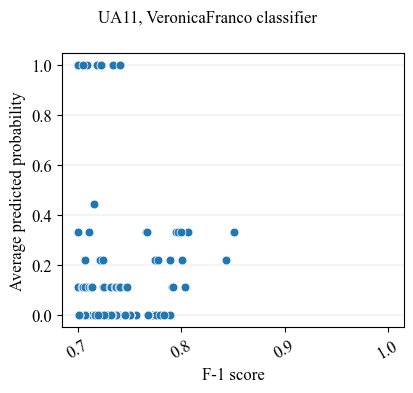

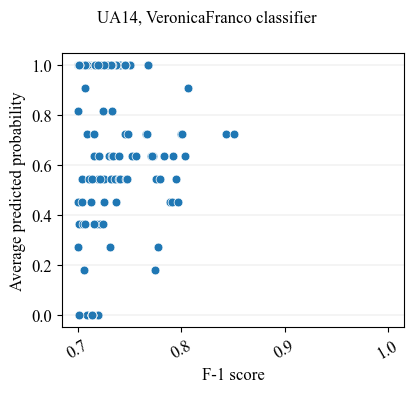

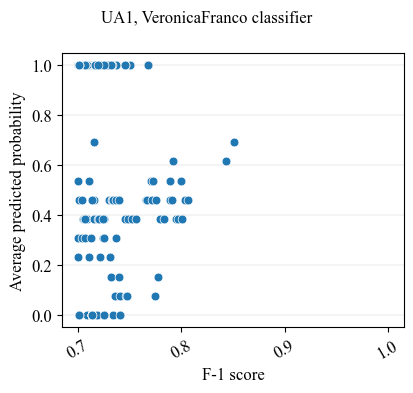

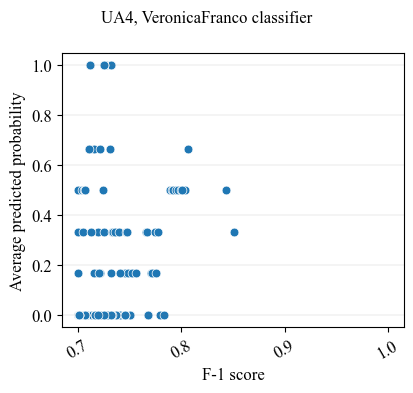

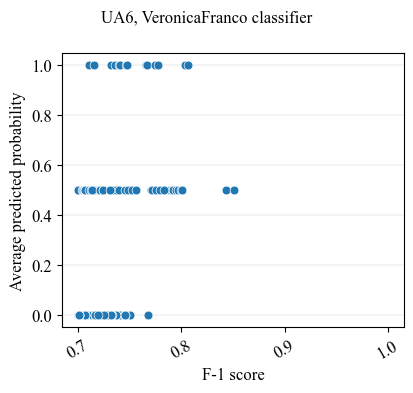

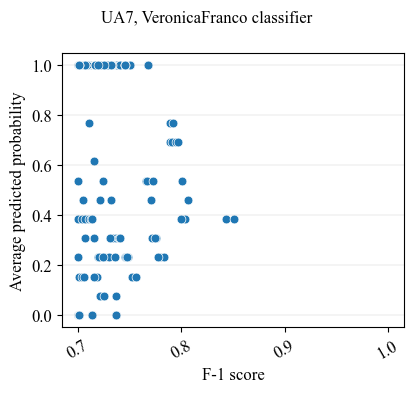

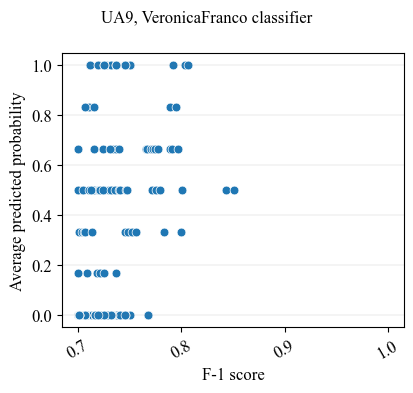

In [35]:
make_scatterplots_easy(all_pred, scatter_dir_easy)

## Scatterplots extended

In [36]:
clrs = ['tomato', 'orange', 'gold', 'olivedrab', 'mediumseagreen', 'darkturquoise', 'cornflowerblue', 'mediumpurple', 'plum']

In [37]:
pltt = sns.color_palette('colorblind')
hue_map = {'classifier_type': ({'Binary': 'orange', 'Multiclass': 'darkorchid'}, 'Classification\n       task'),
           'classifier' :
           ({'Logit': pltt[0], 'RandomForest': pltt[1],'SVM': pltt[9],  'kNN': pltt[3], 'BERToldo': pltt[4]}, 'Classifier'),
           'poem_type': ({'Split': 'cornflowerblue', 'Whole': 'tomato'}, 'Poem size')}

In [38]:
scatter_dir = os.path.join(figures_dir, 'predictions', 'scatterplots')
if not os.path.exists(scatter_dir):
  os.makedirs(scatter_dir)

In [39]:
def make_scatterplots(_pred_df, _hue_map, _scatter_dir):

  for label in _pred_df.label.unique():

    for author in _pred_df.author.unique():

      _figure = plt.figure(figsize = (16,4), tight_layout=0.5)
      plt.suptitle(f'{label}, {author} classifier', size=15)
      pos = 1

      for _hue, _tuple in _hue_map.items():

        _figure.add_subplot(1,3,pos)
        cond = (_pred_df['label'] == label) & (_pred_df['author'] == author)
        df = _pred_df.loc[cond].copy()

        ax = sns.scatterplot(data=df, x='cv_f1-score', y='prediction', hue=_hue, palette=_tuple[0], s=40)
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.05,1.025),
                  fontsize='medium', fancybox=True, title=_tuple[1])

        ax.set_xlim(0.685,1.015)
        ax.set_ylim(-0.05,1.05)
        ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
        ax.tick_params(axis='x', labelrotation=30)
        ax.set_ylabel(f'Average predicted probability')
        ax.set_xlabel(f'F-1 score')
        pos += 1

      _figure.savefig(os.path.join(_scatter_dir, f'{label}_{author}.png'), dpi = 300, bbox_inches = "tight")


/var/folders/6r/l85qcy_s4pb2p4w5r1tfc0t00000gn/T/ipykernel_17943/2117262786.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _figure = plt.figure(figsize = (16,4), tight_layout=0.5)


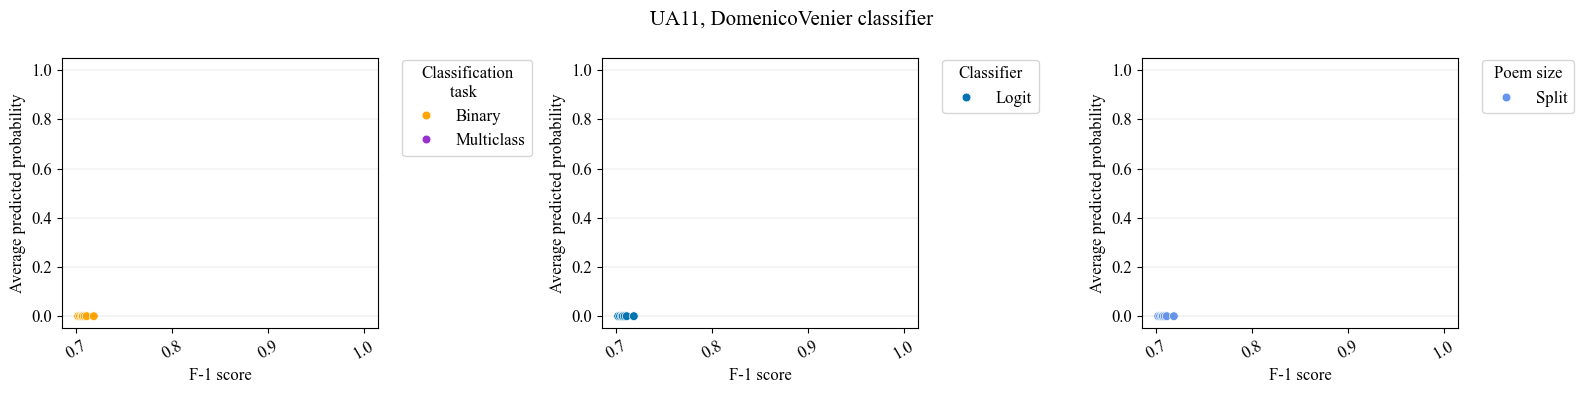

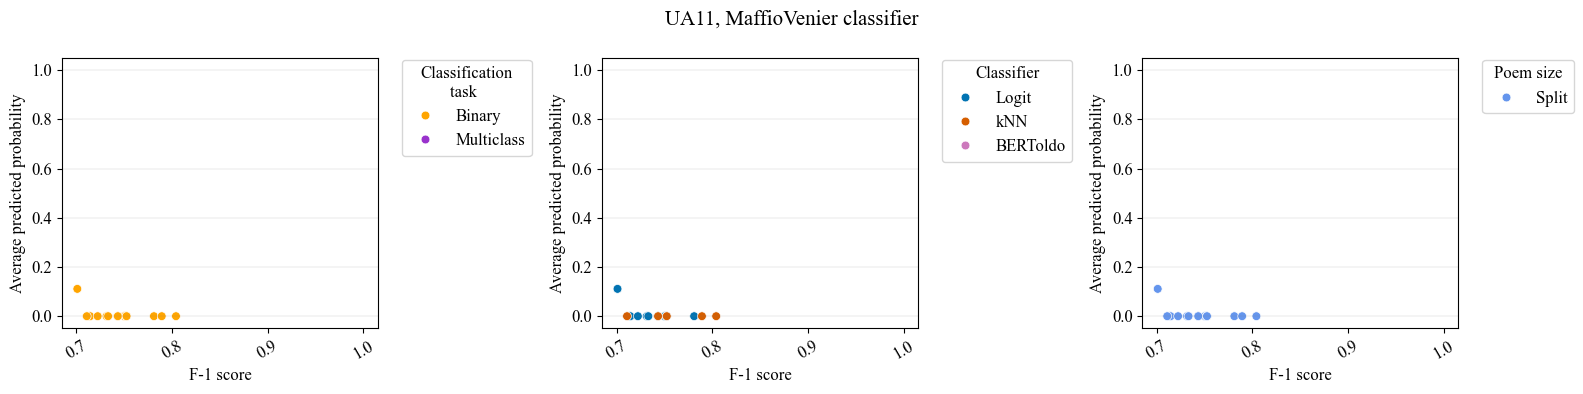

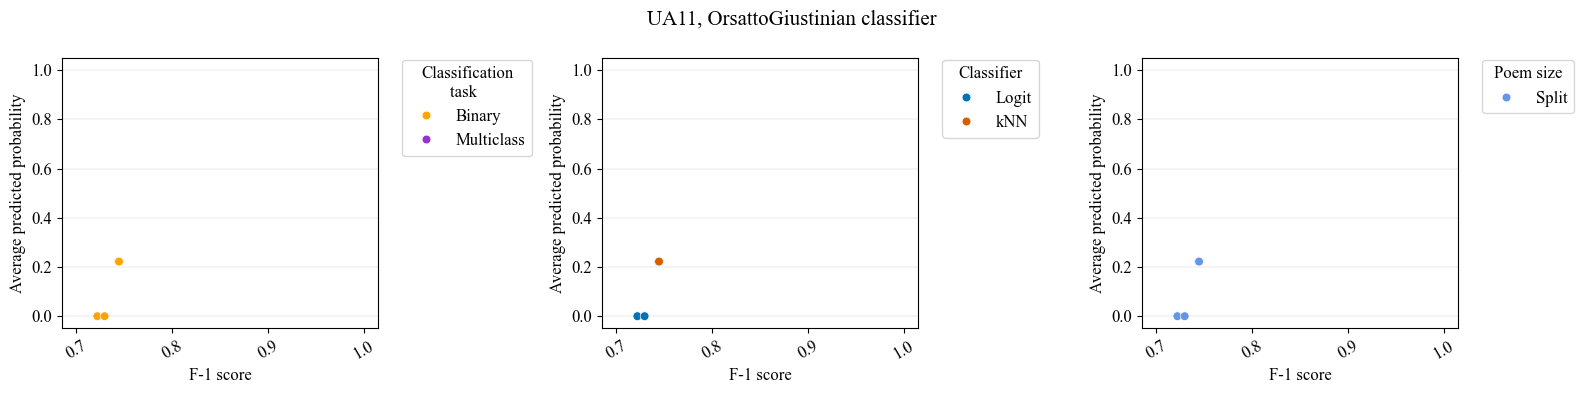

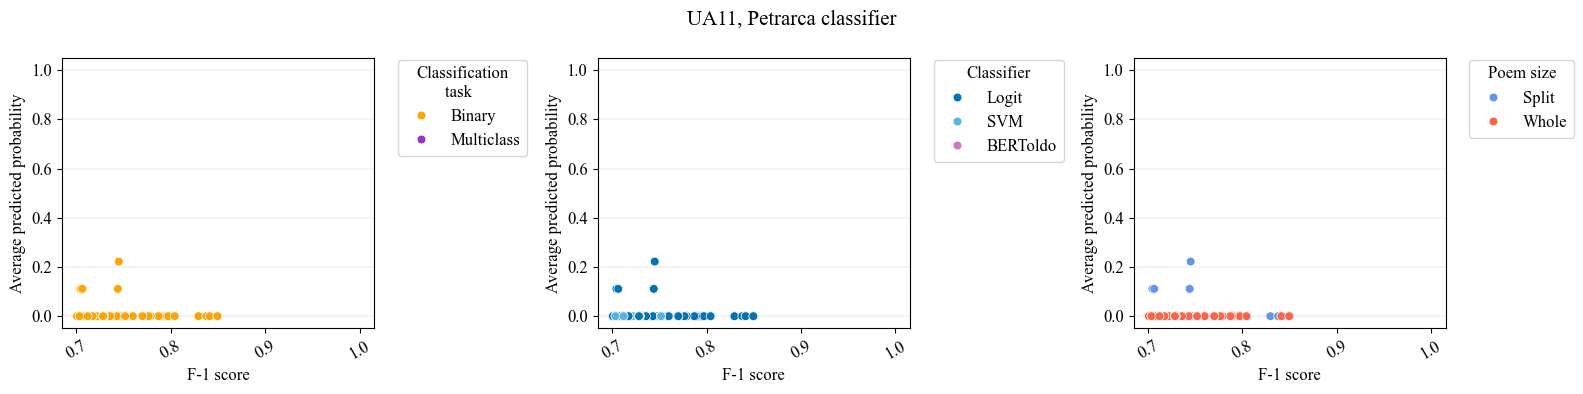

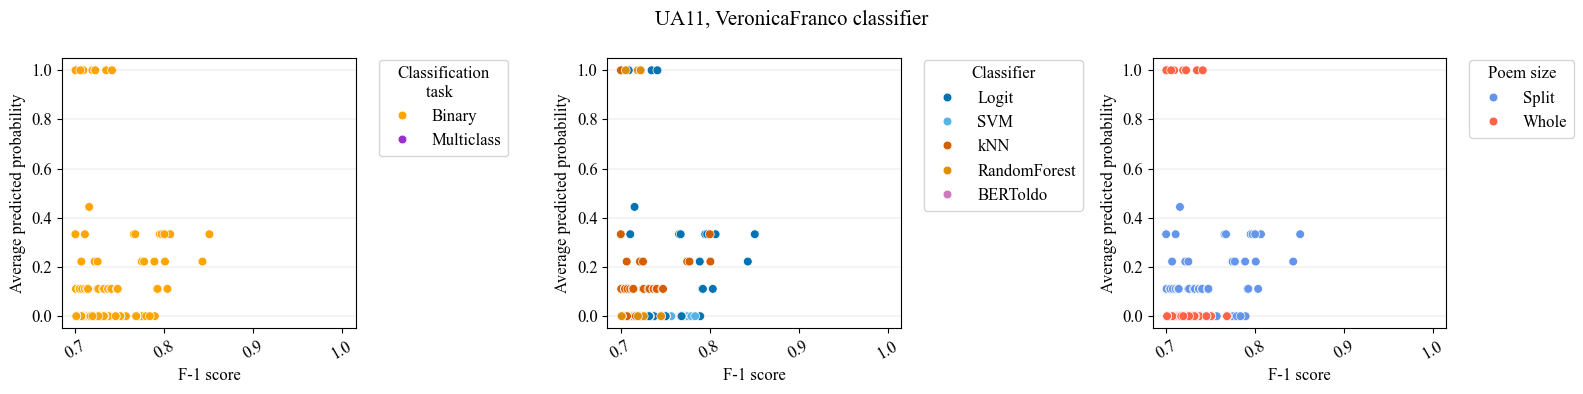

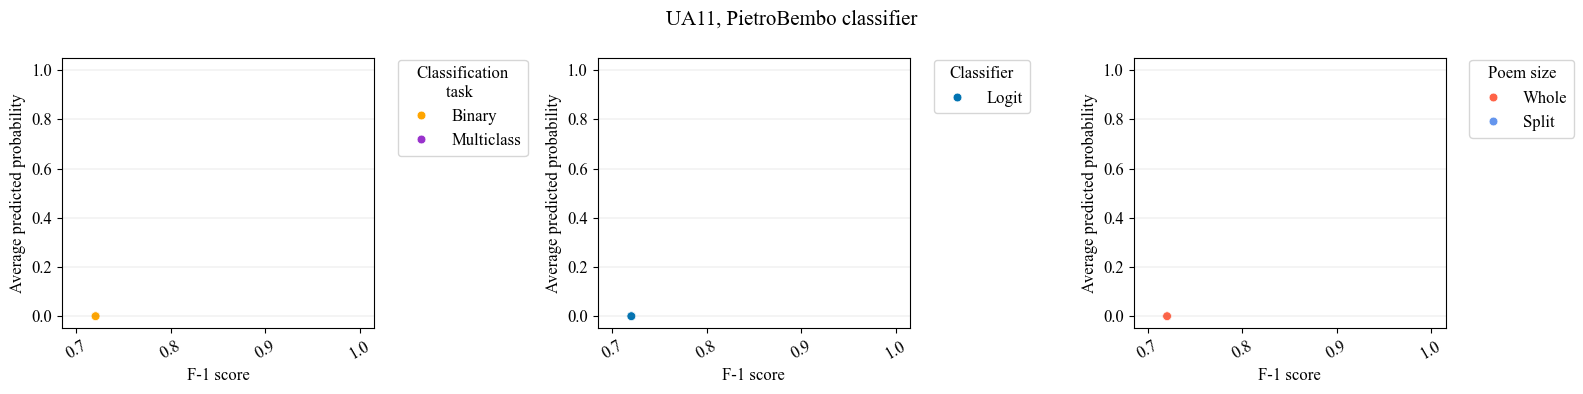

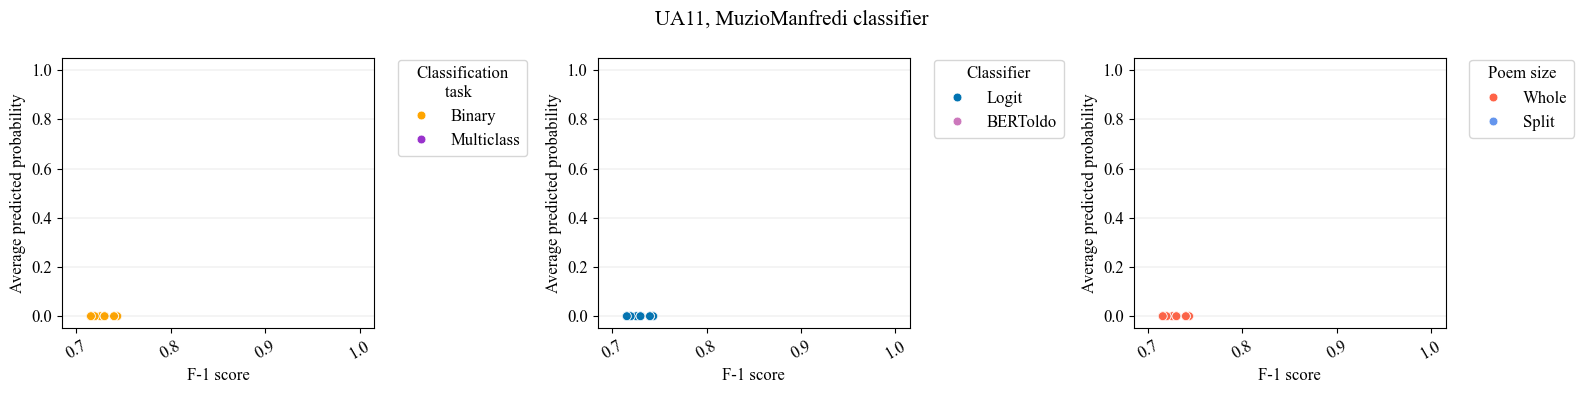

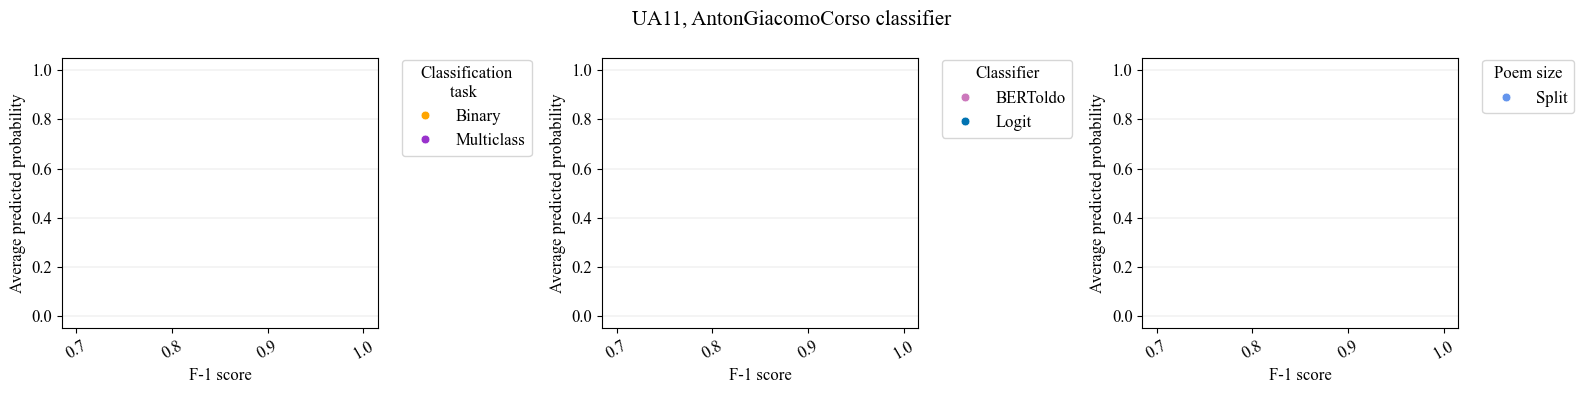

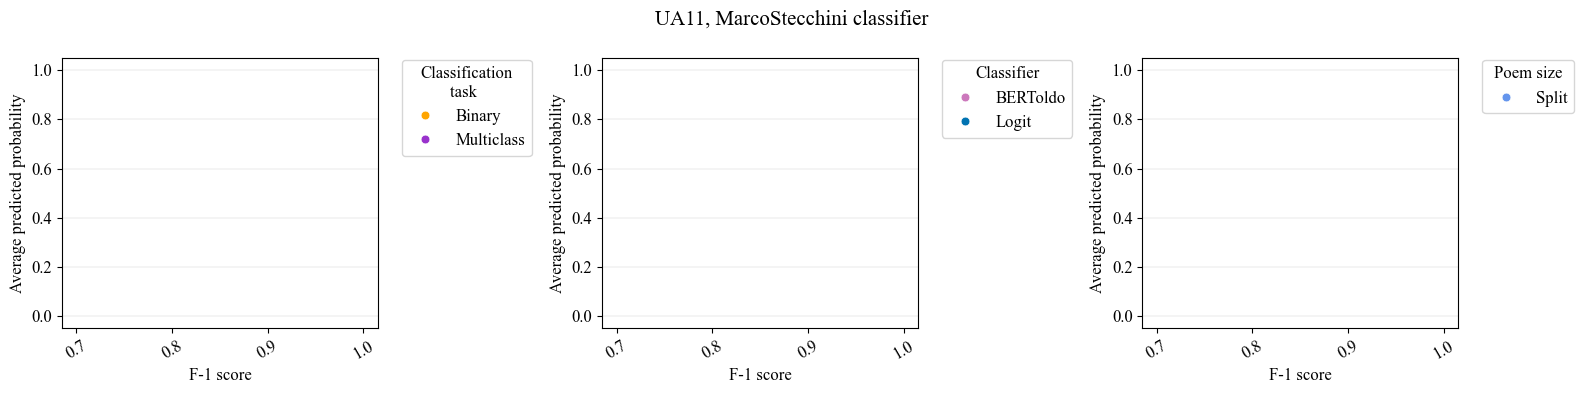

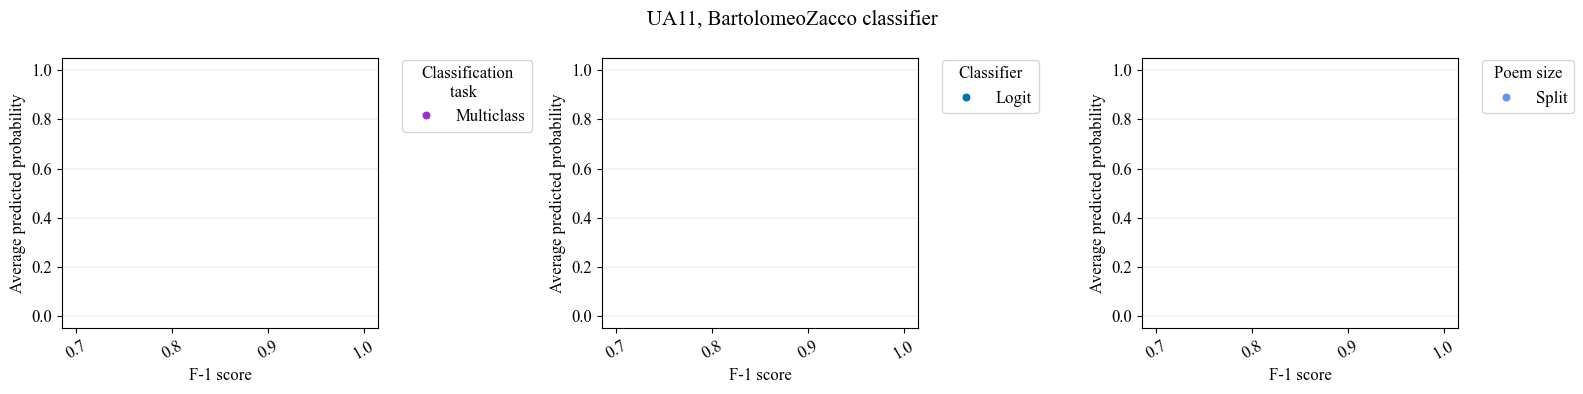

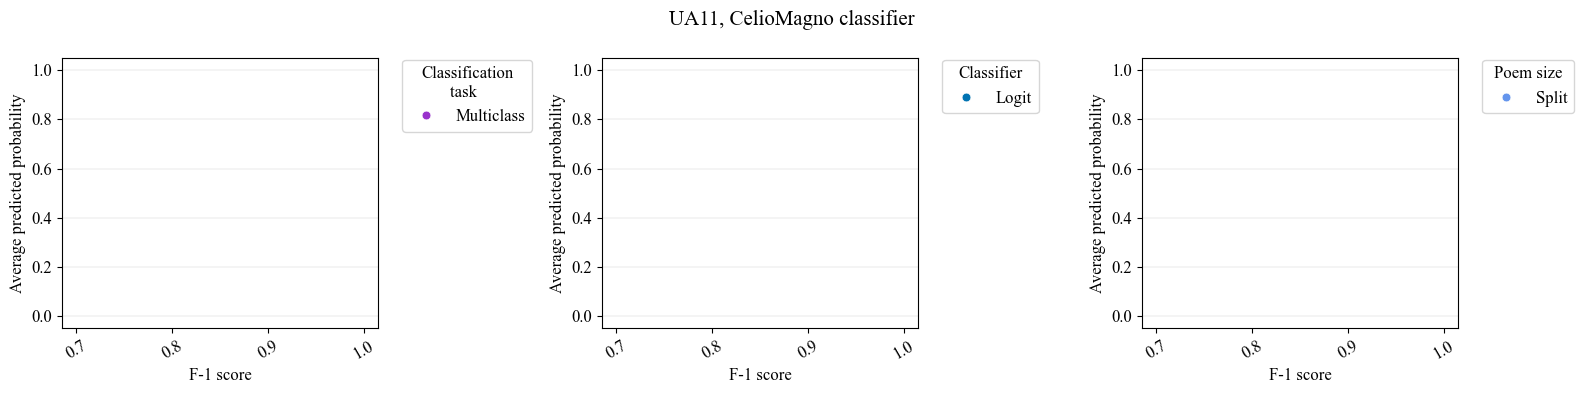

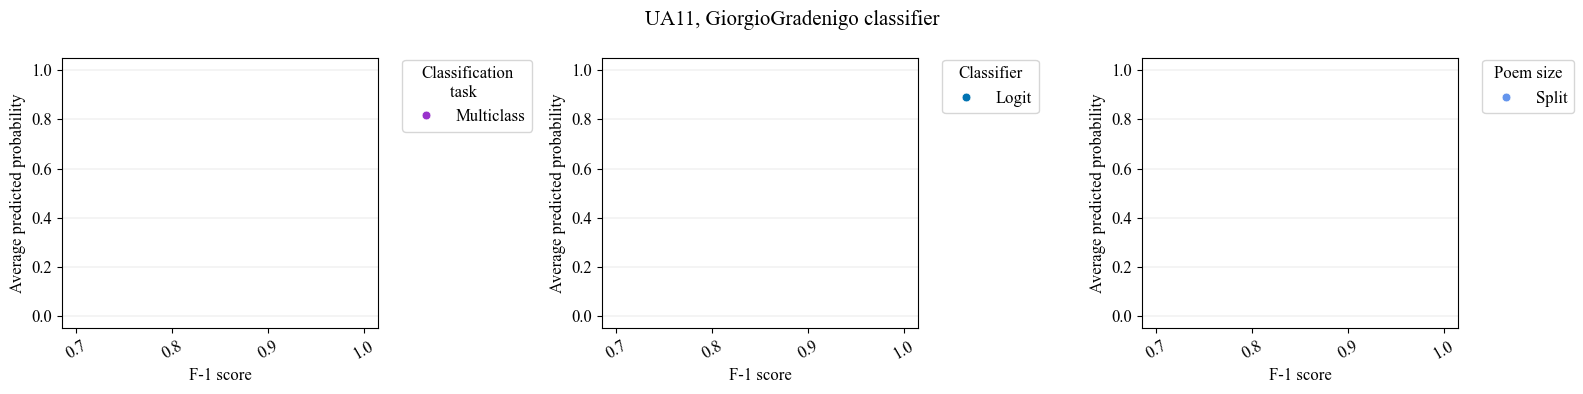

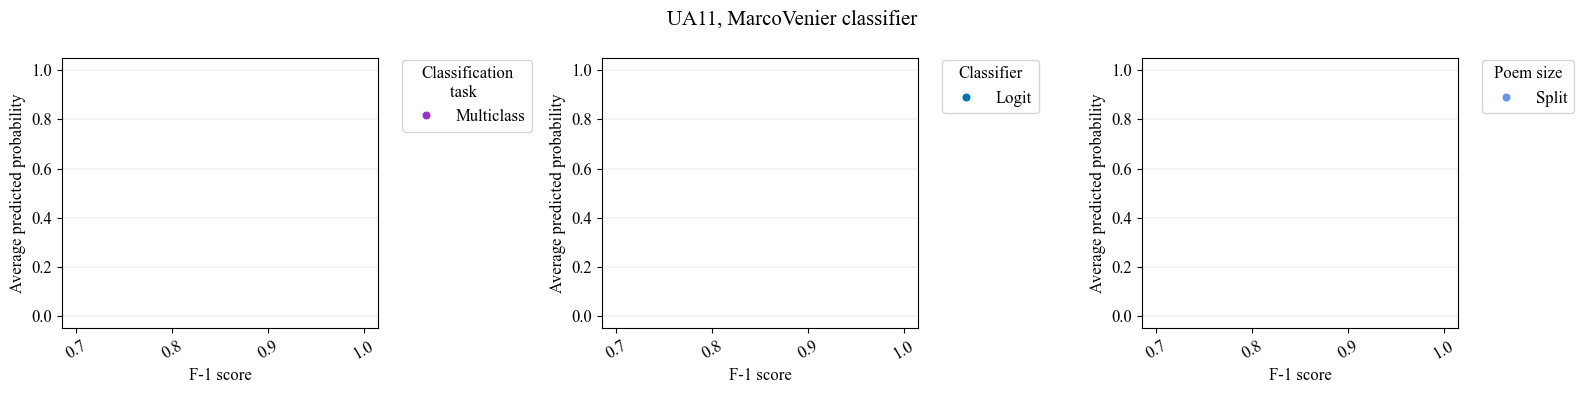

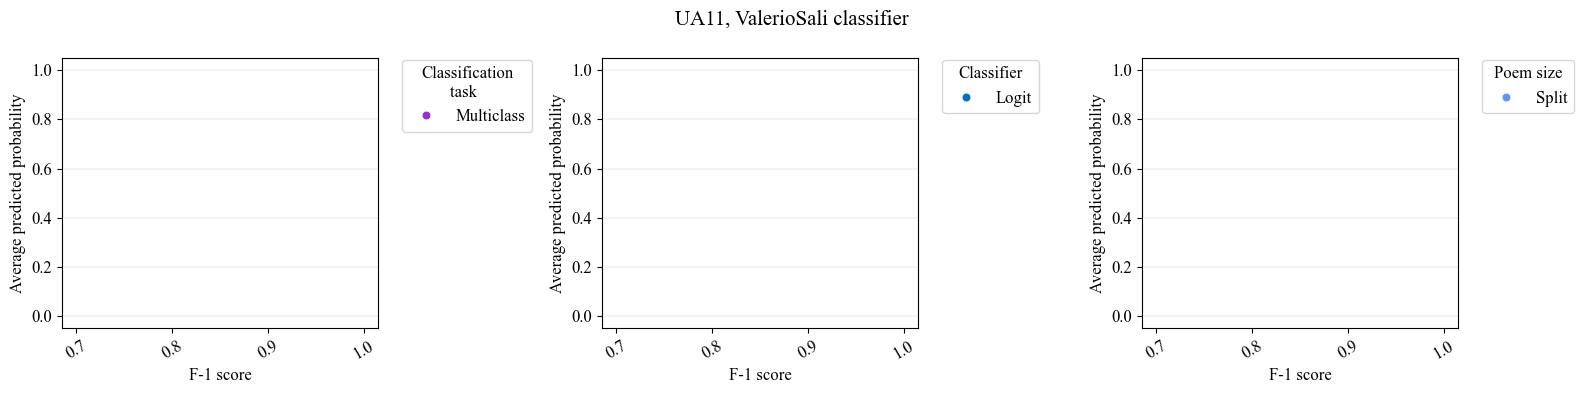

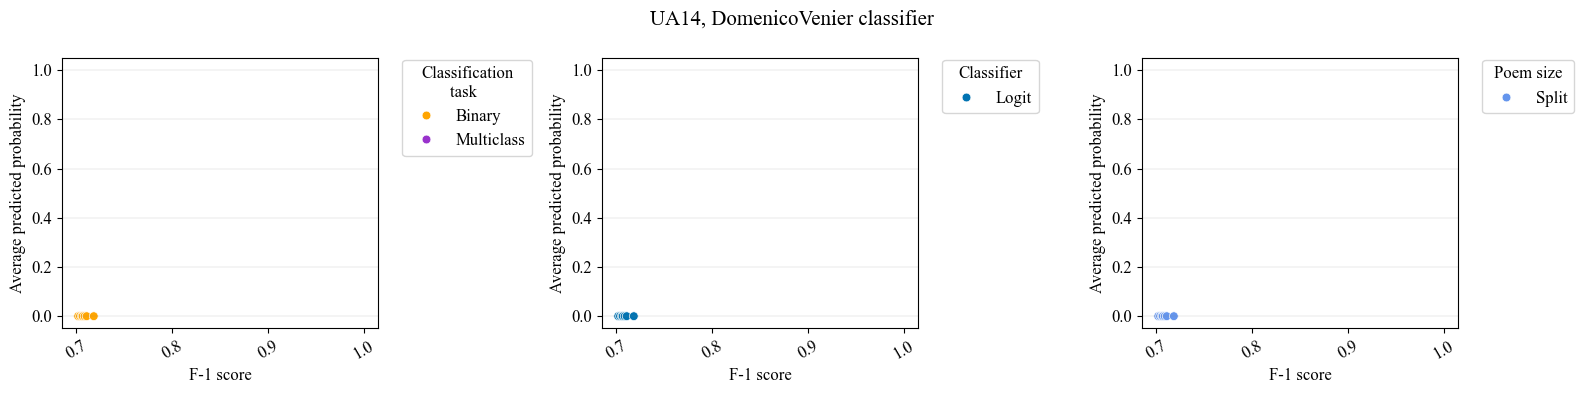

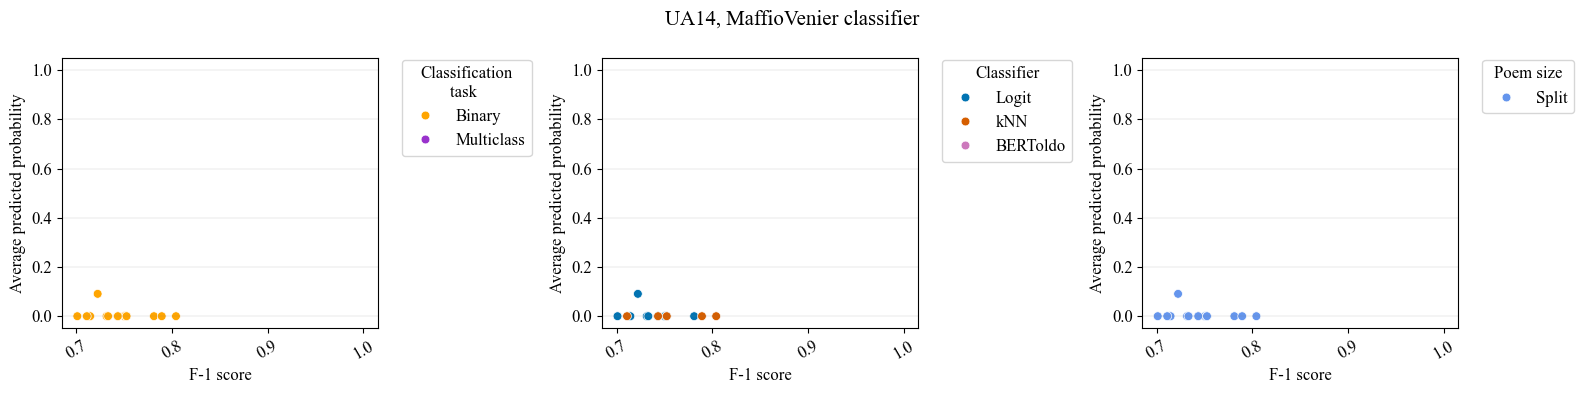

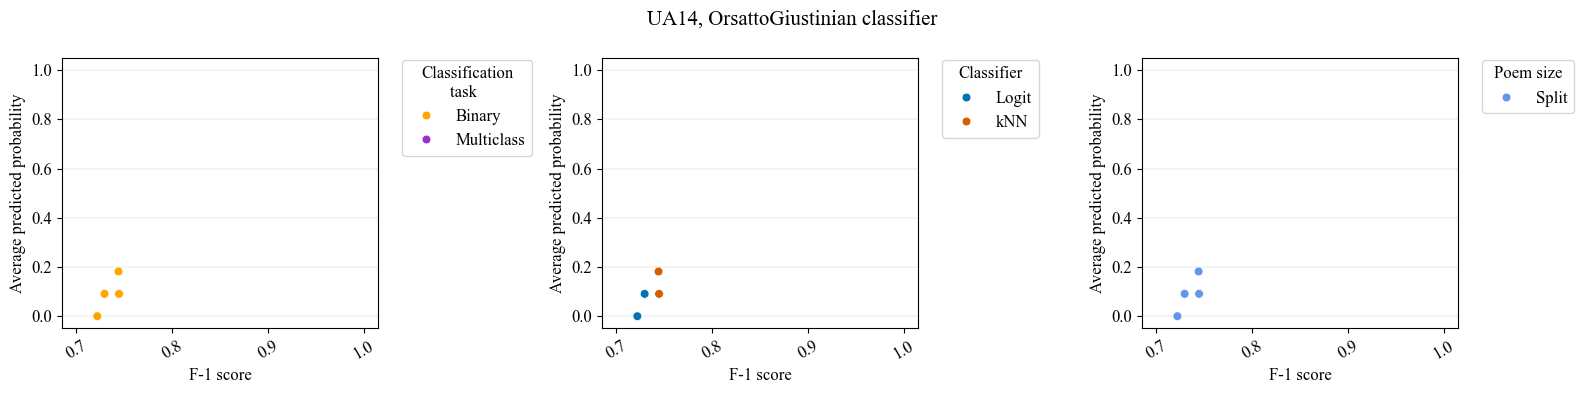

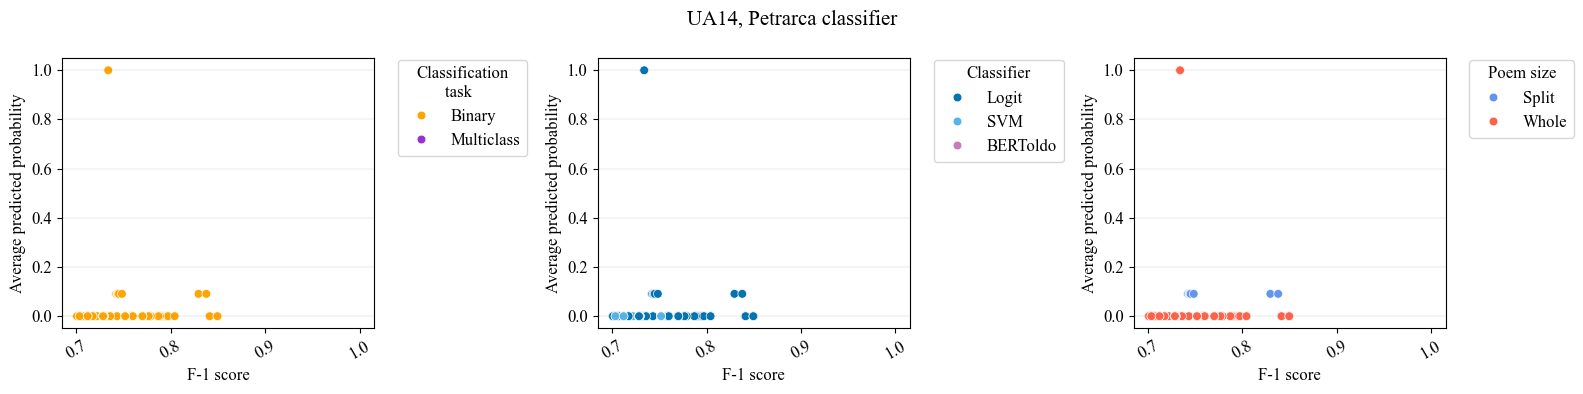

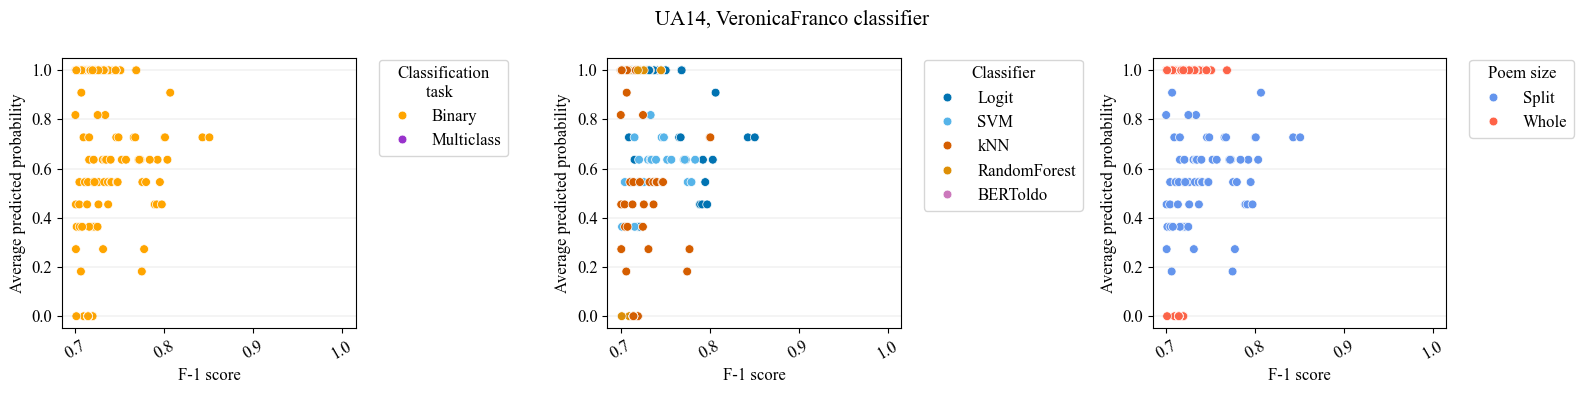

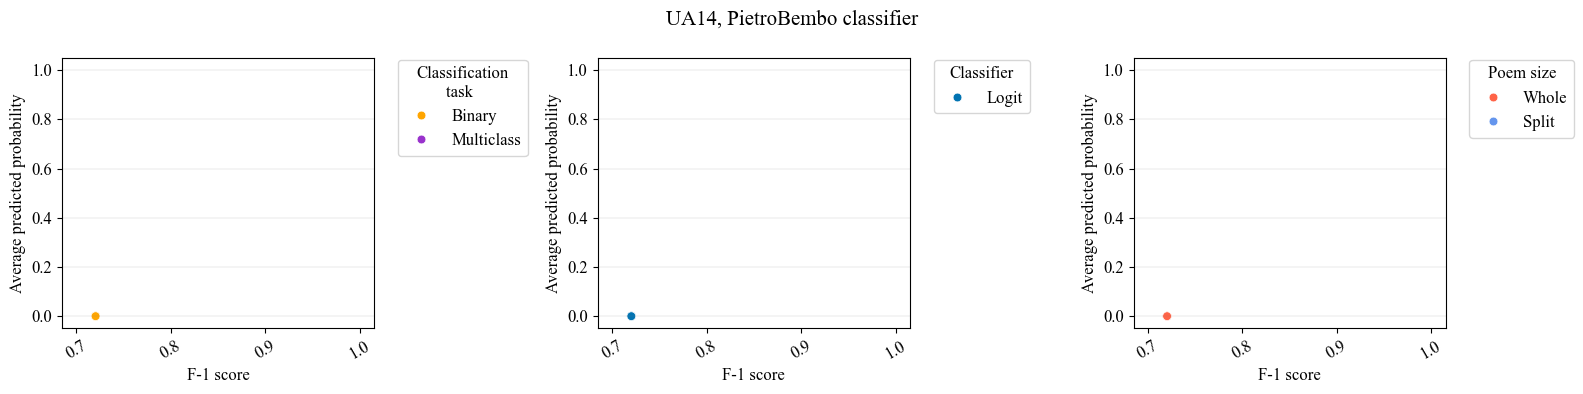

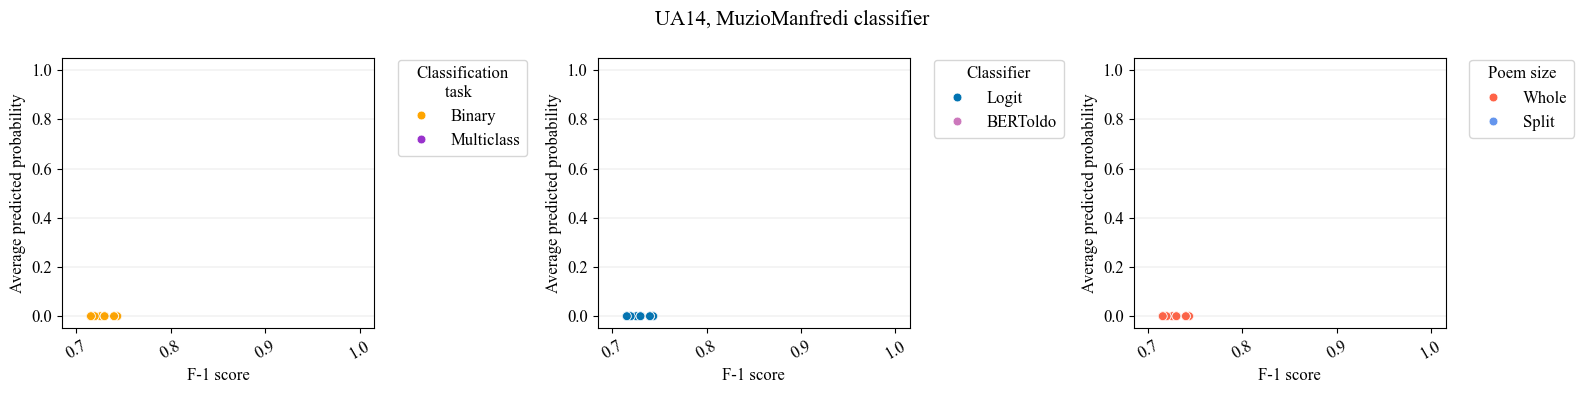

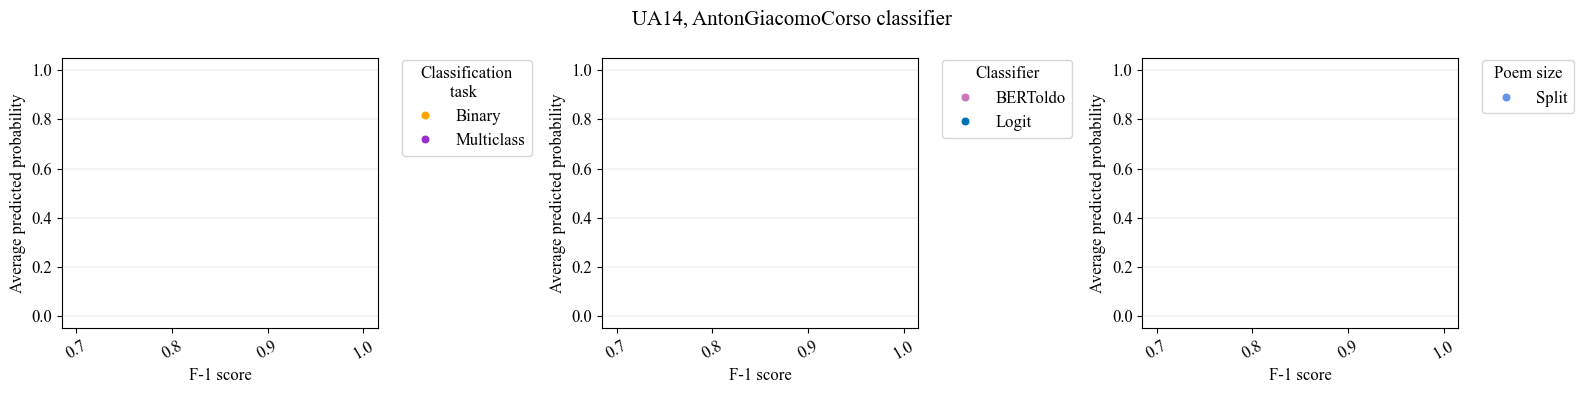

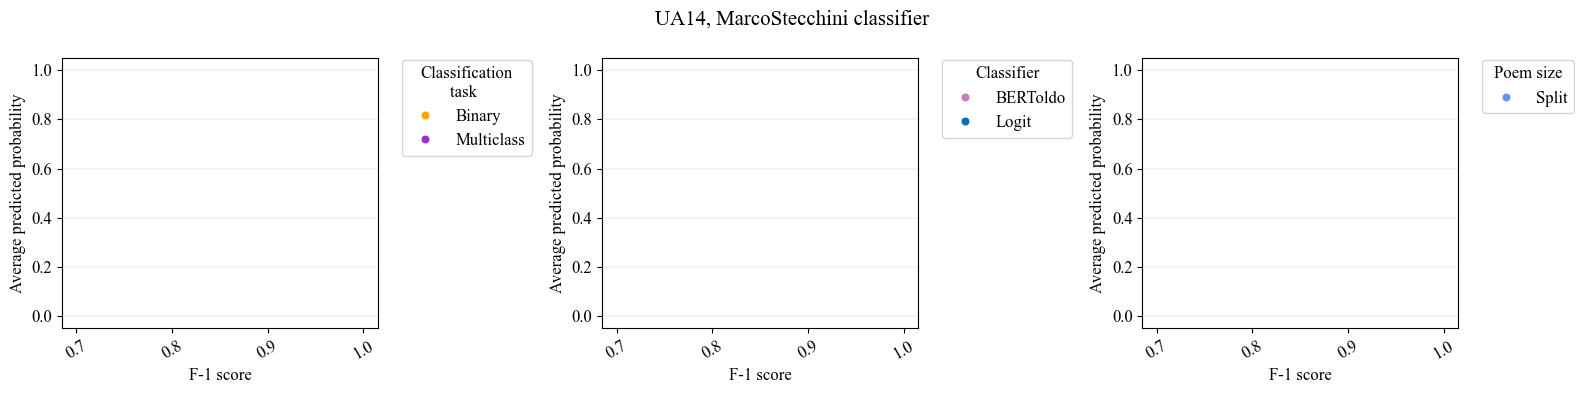

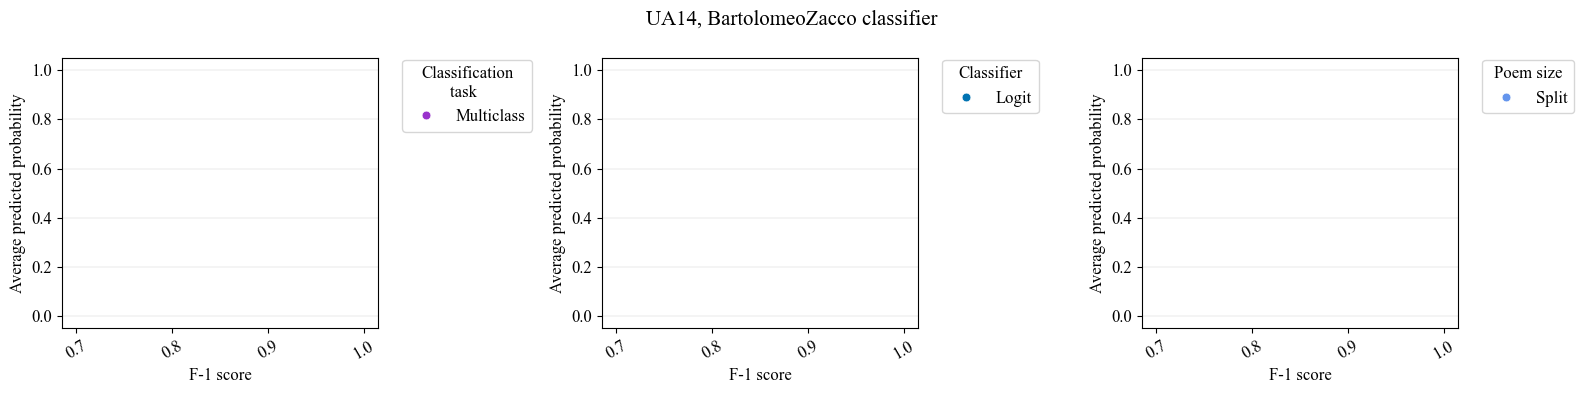

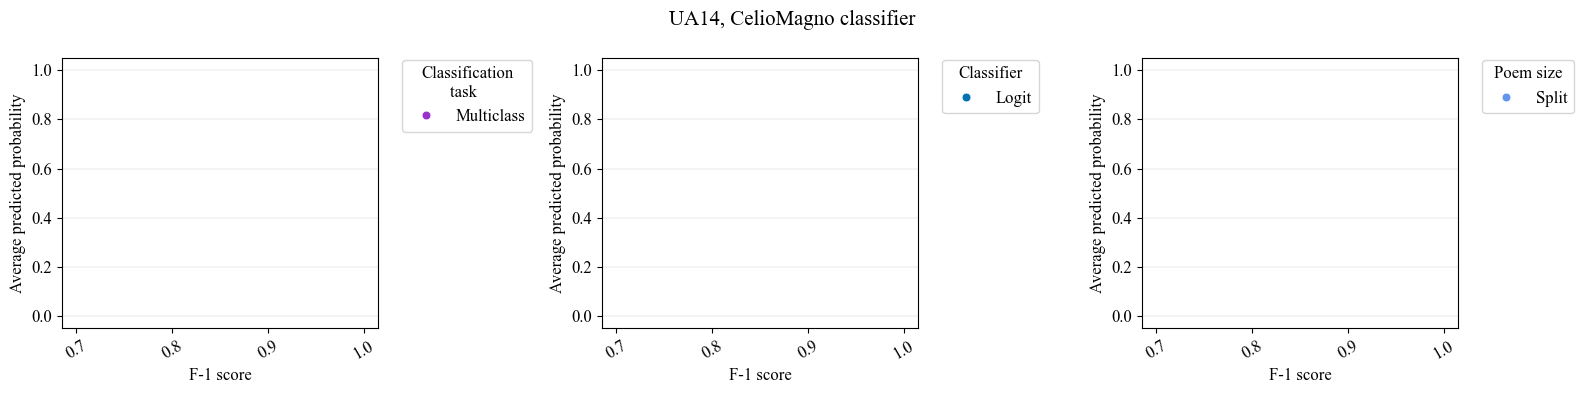

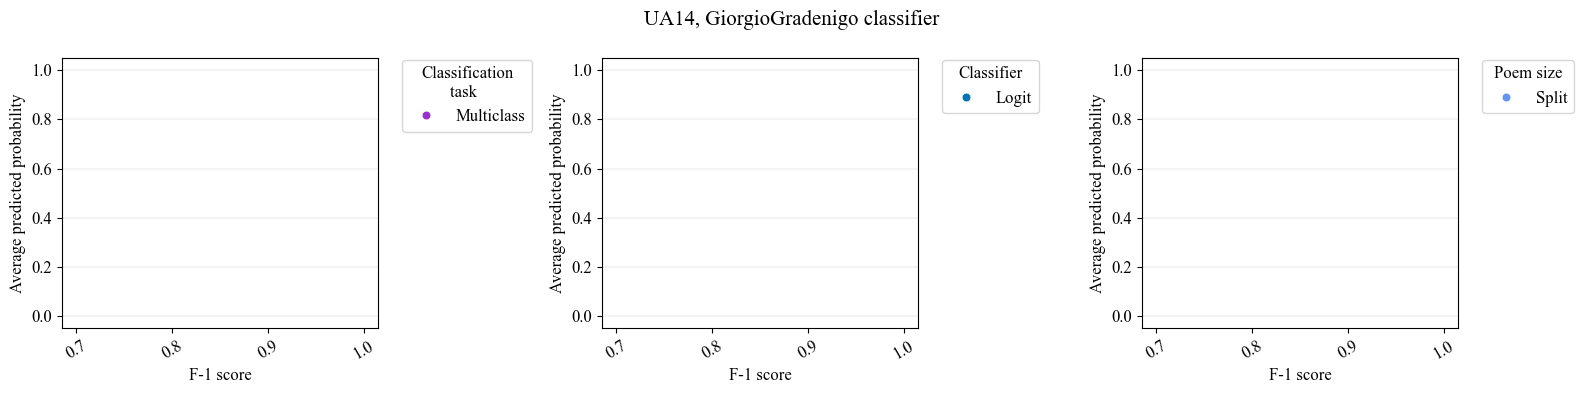

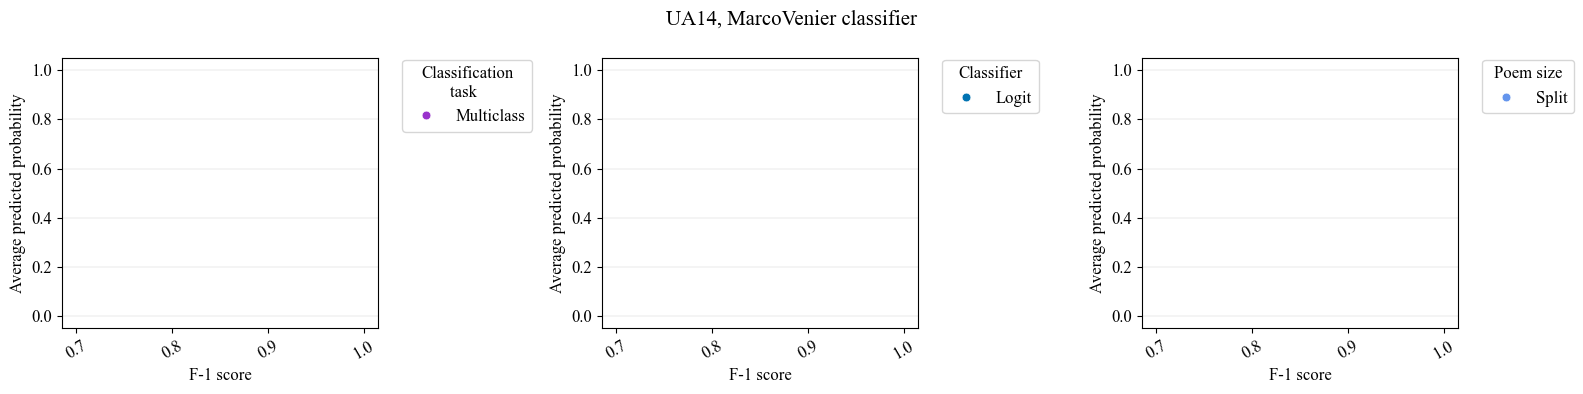

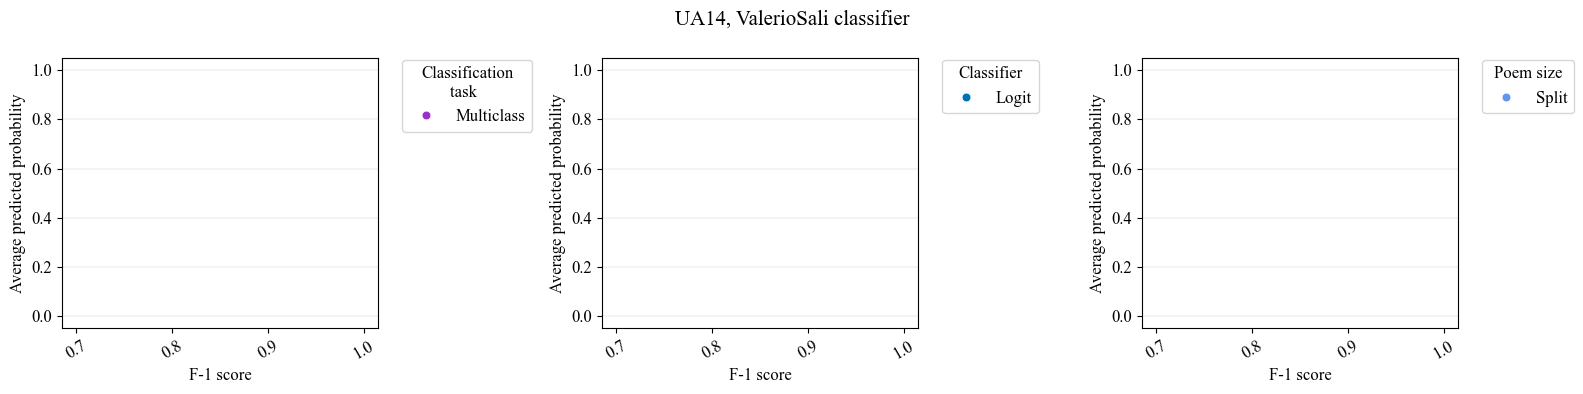

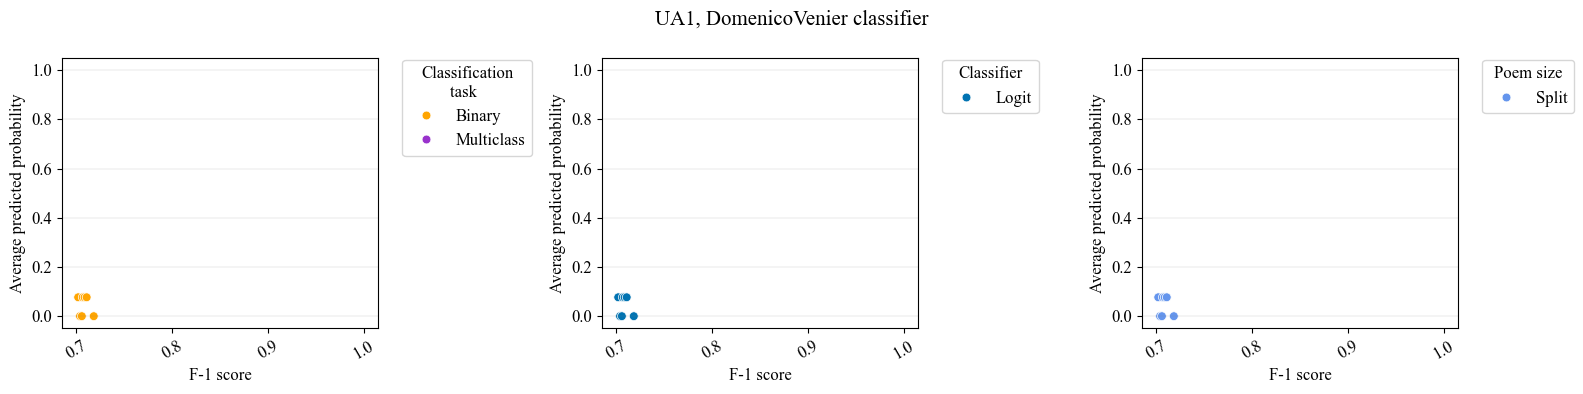

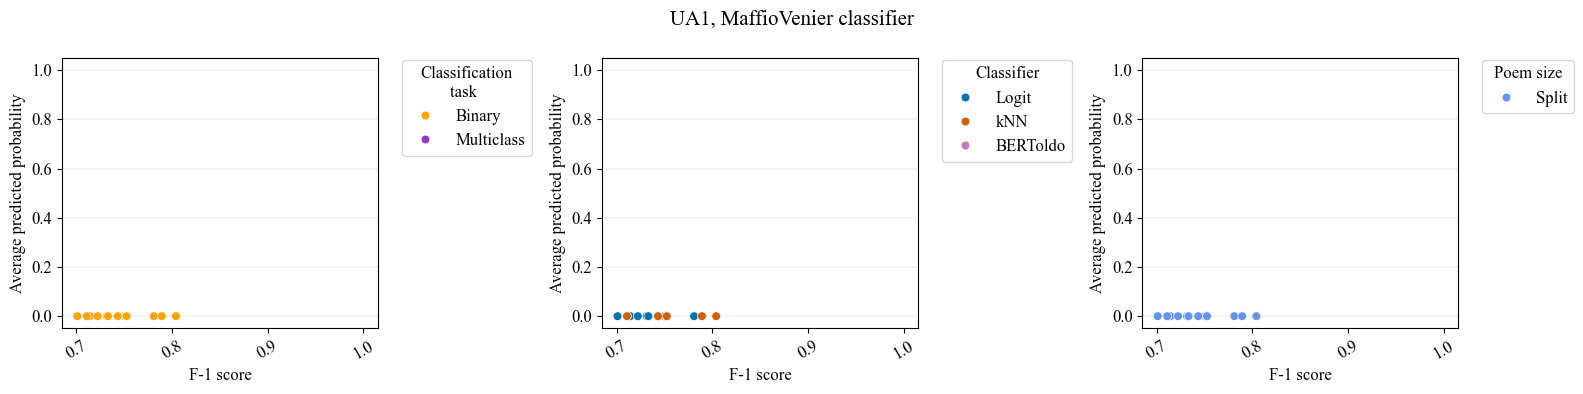

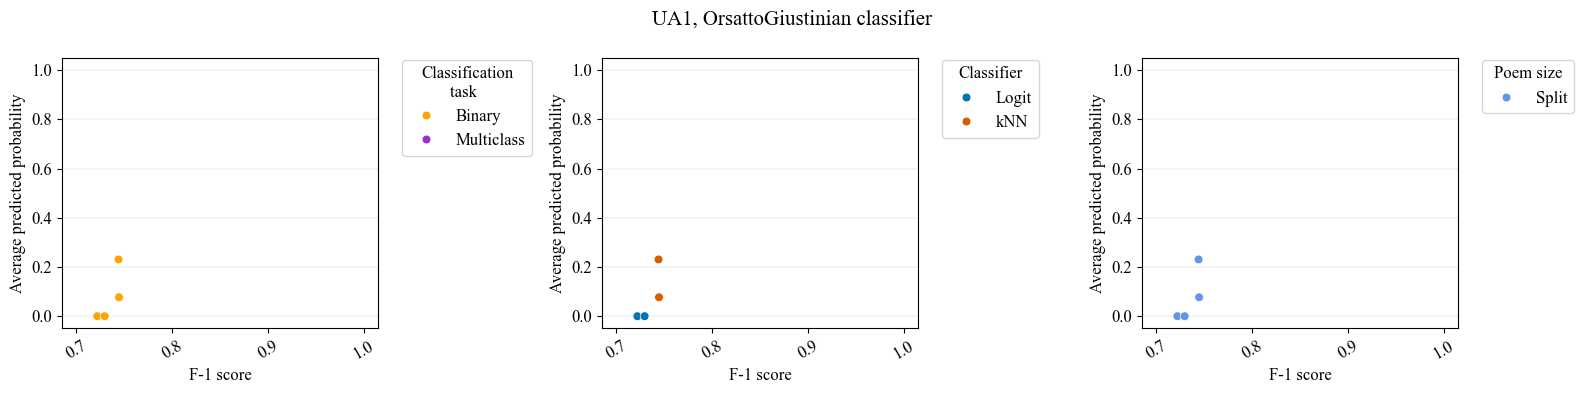

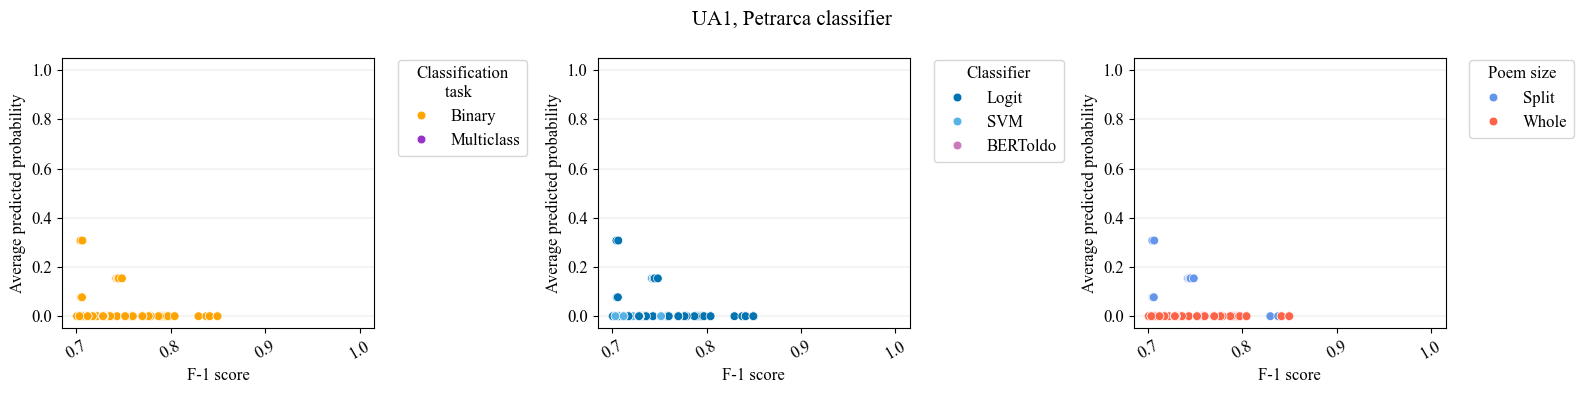

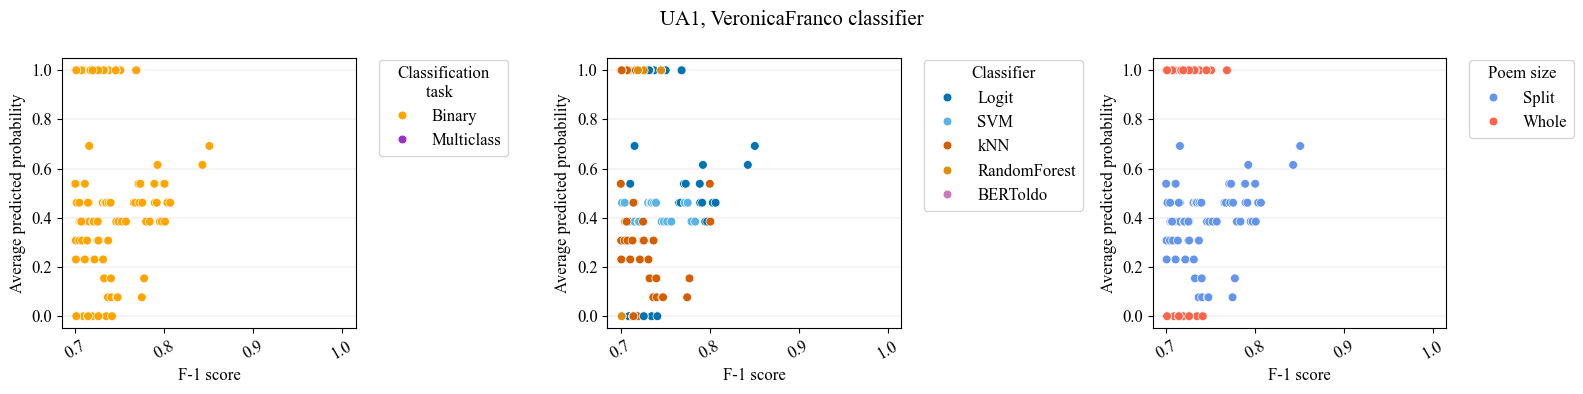

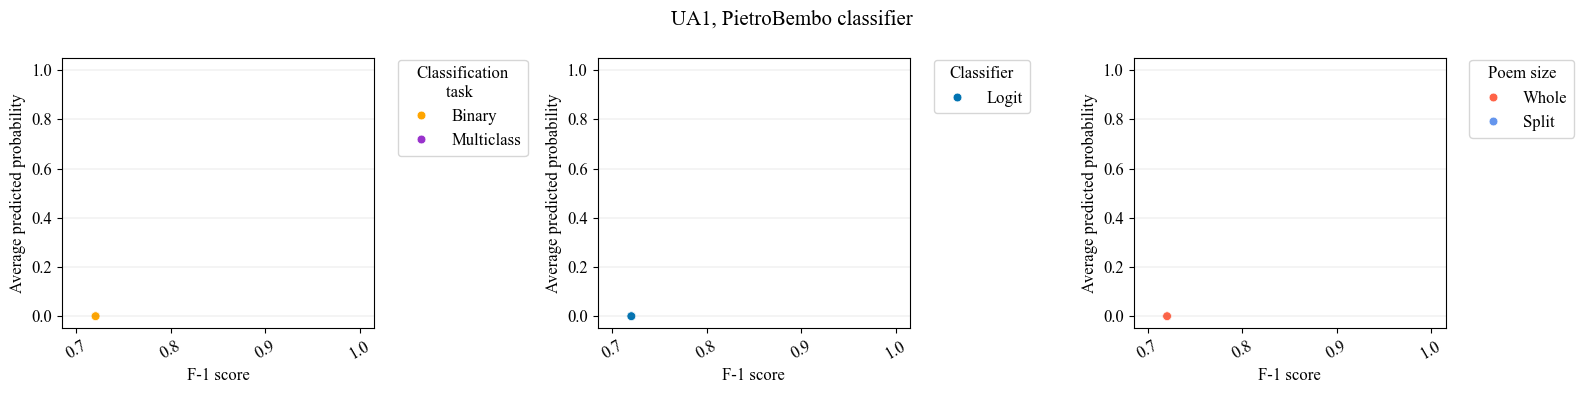

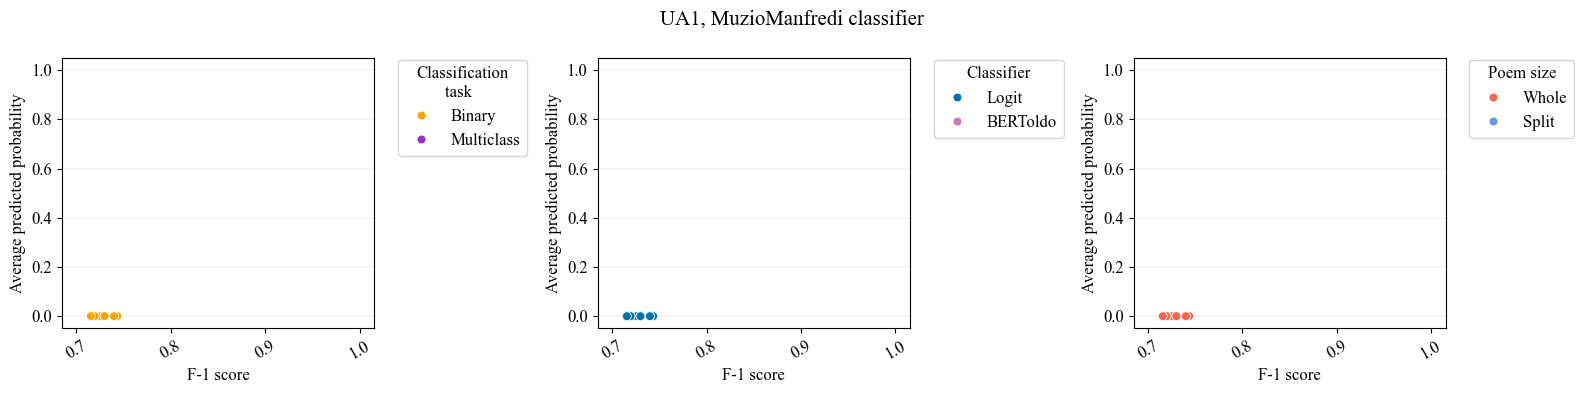

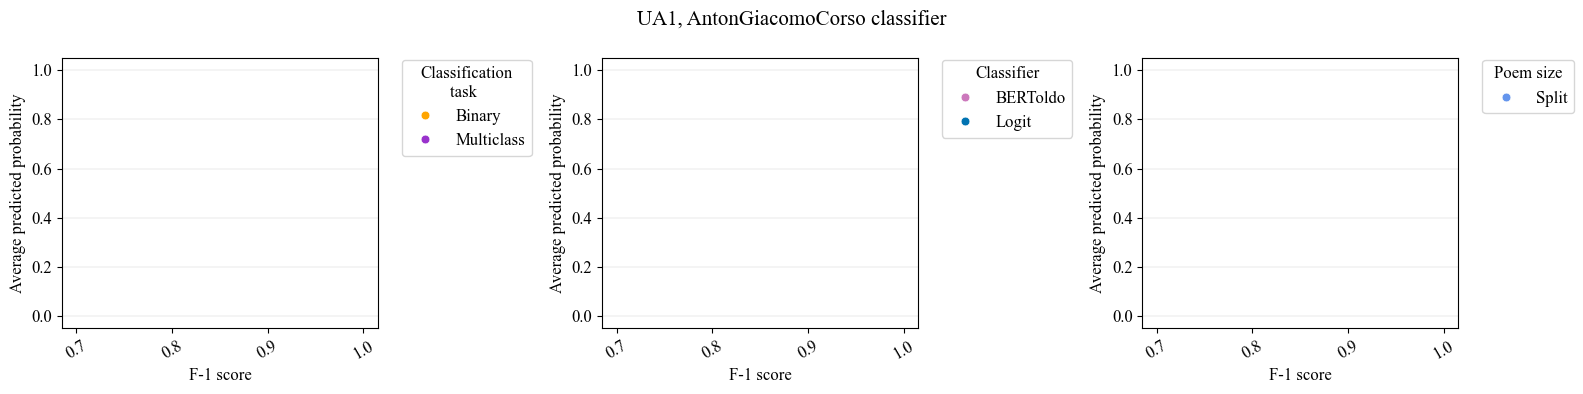

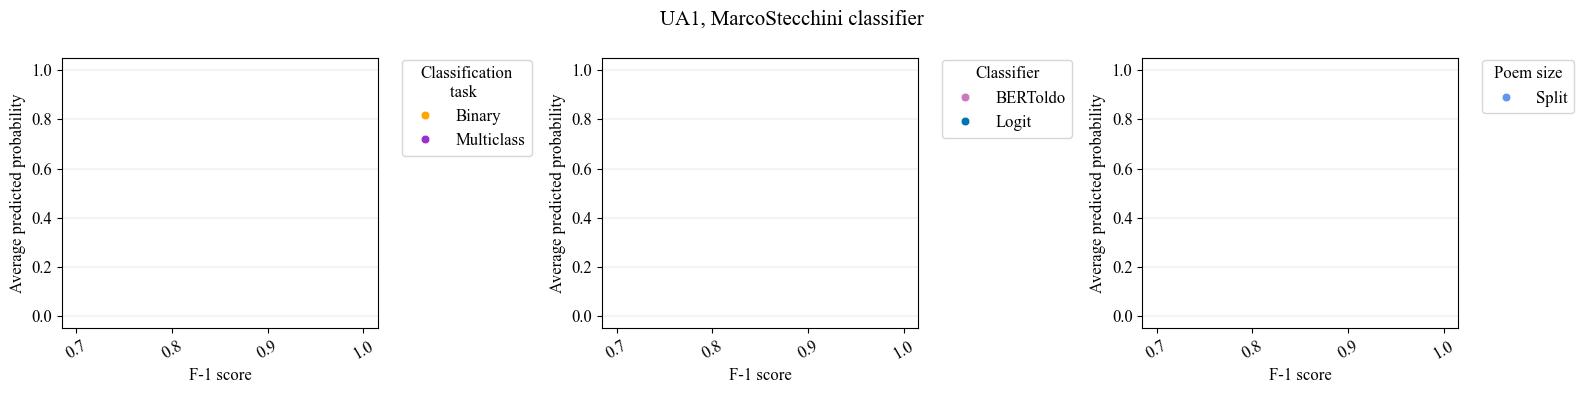

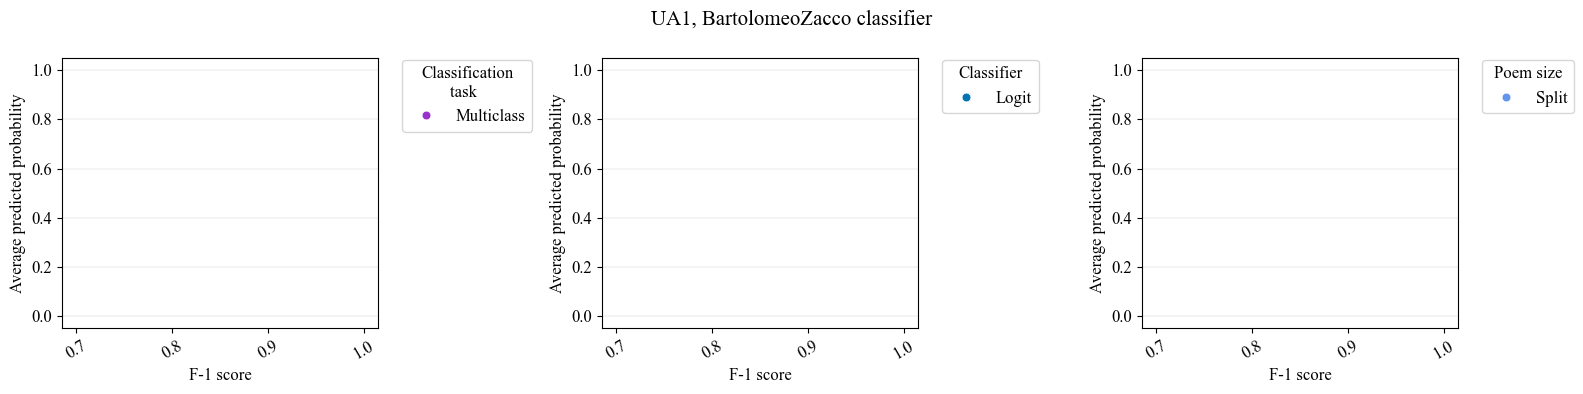

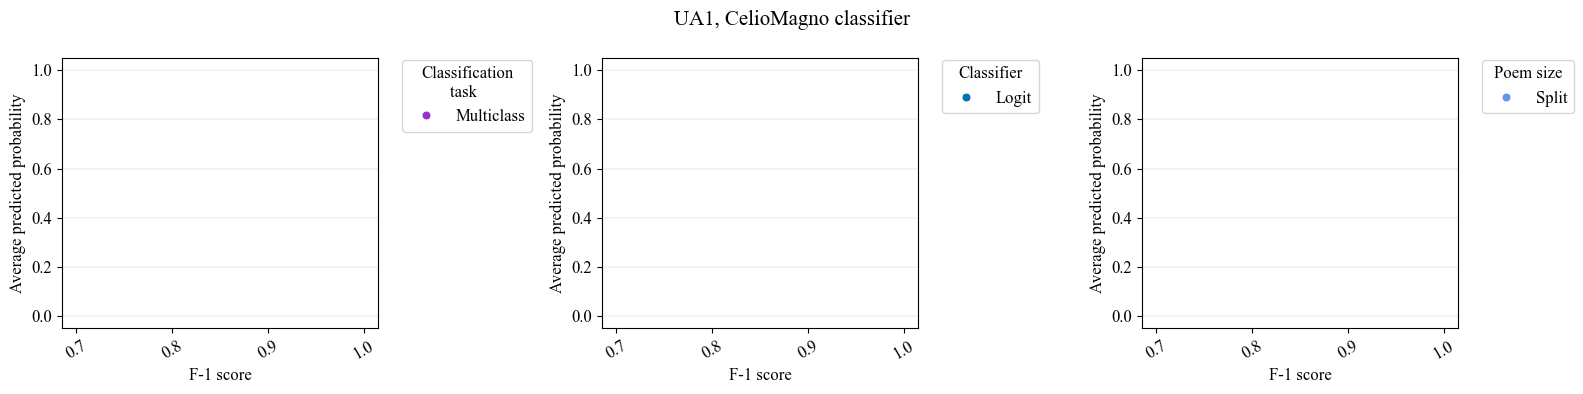

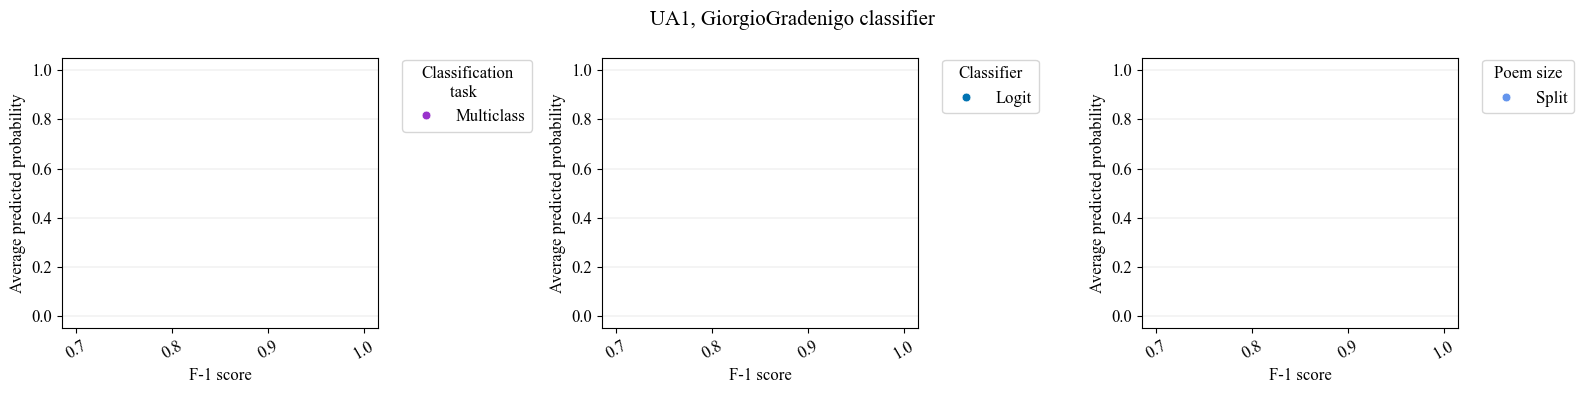

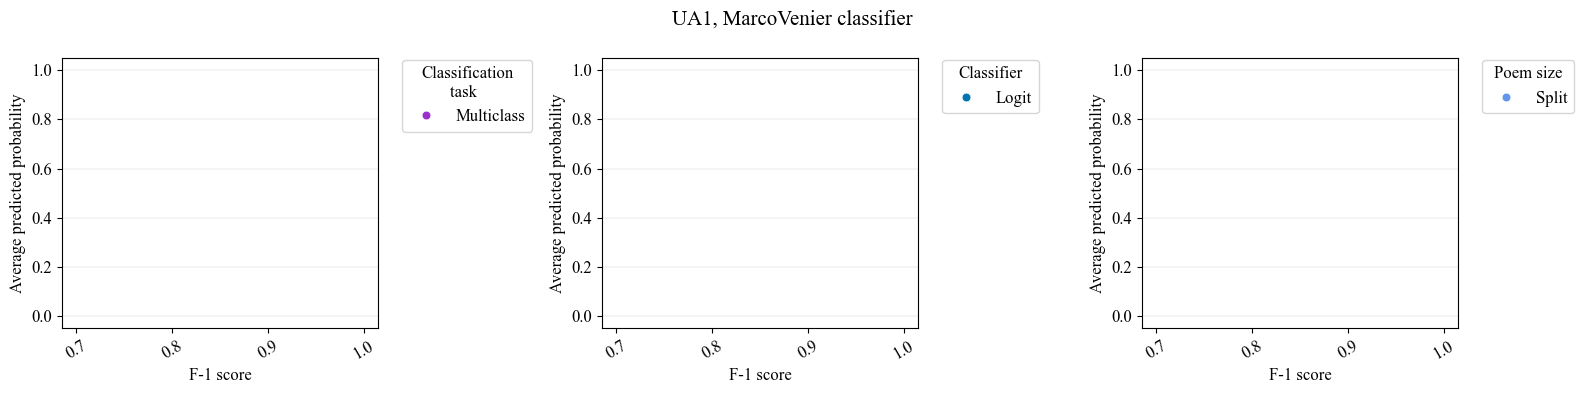

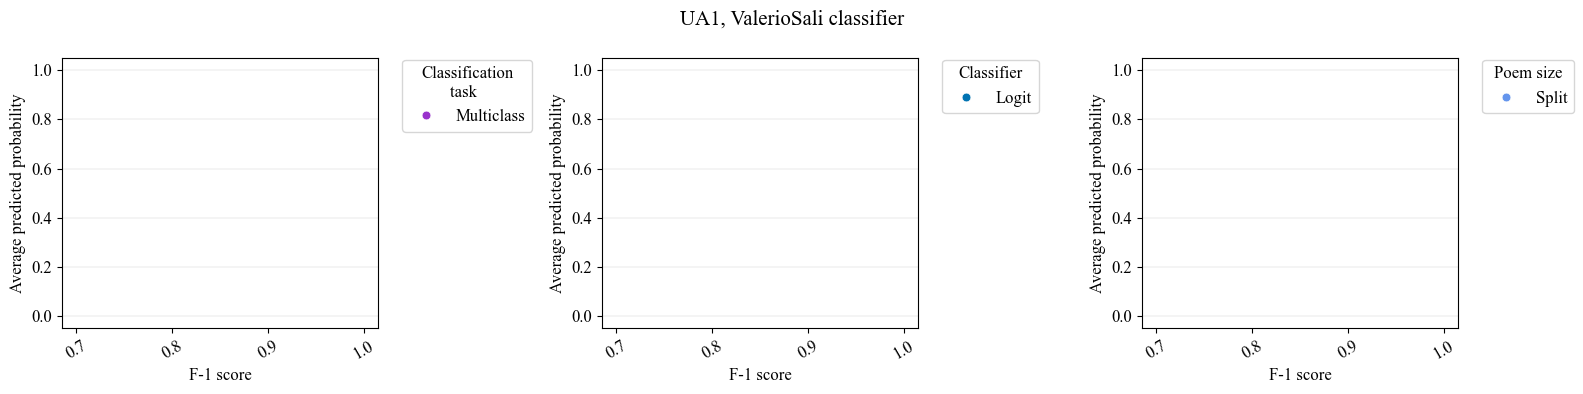

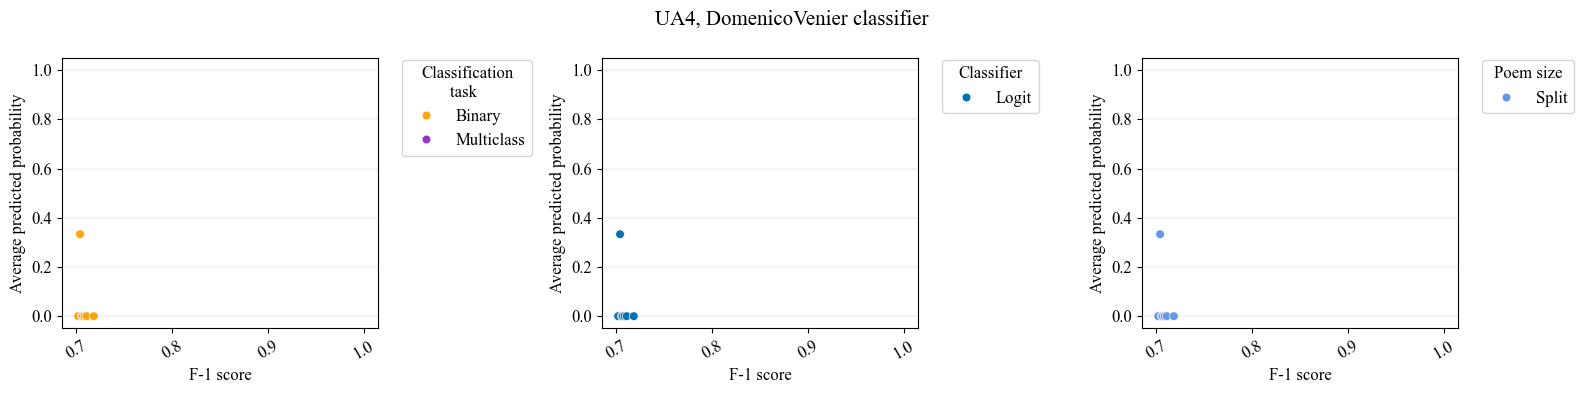

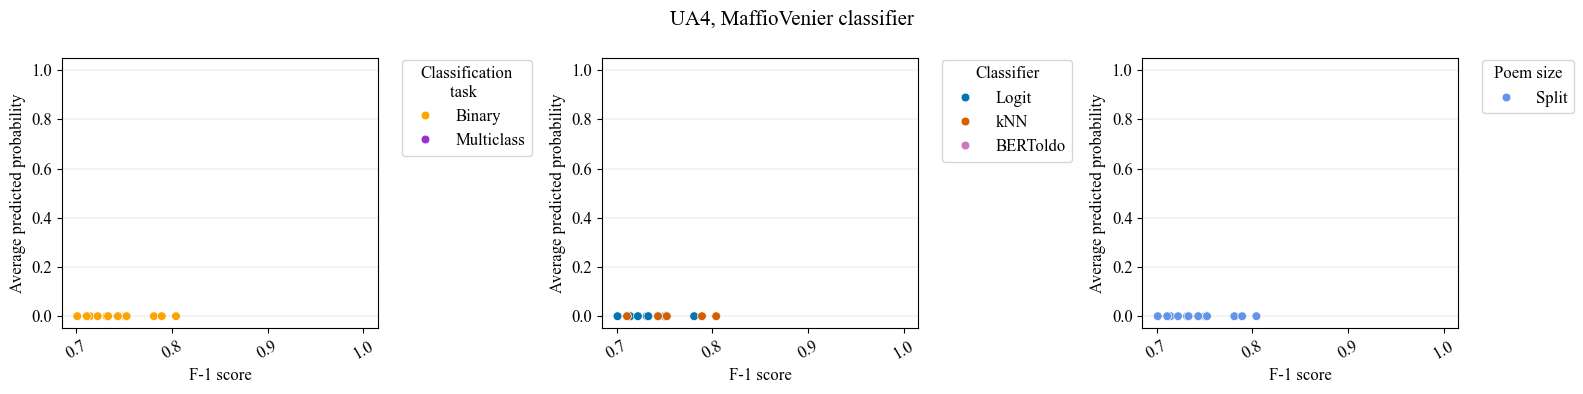

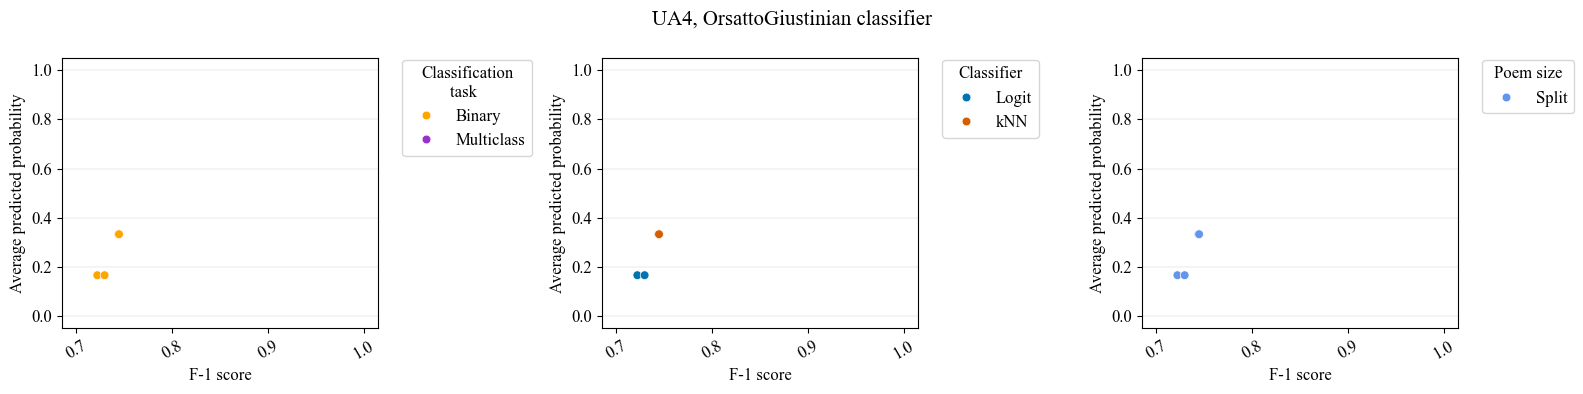

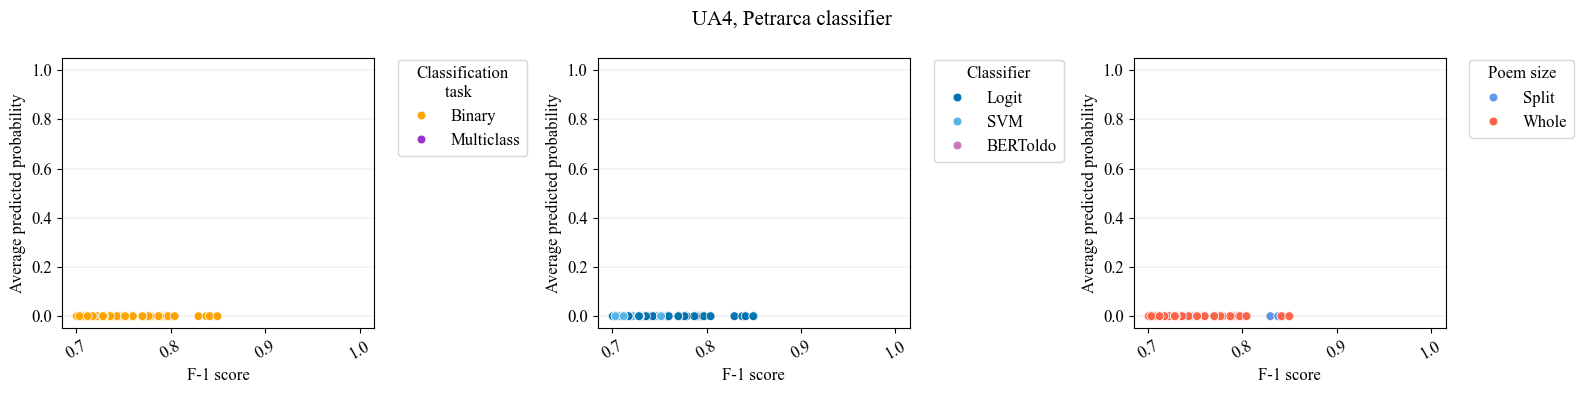

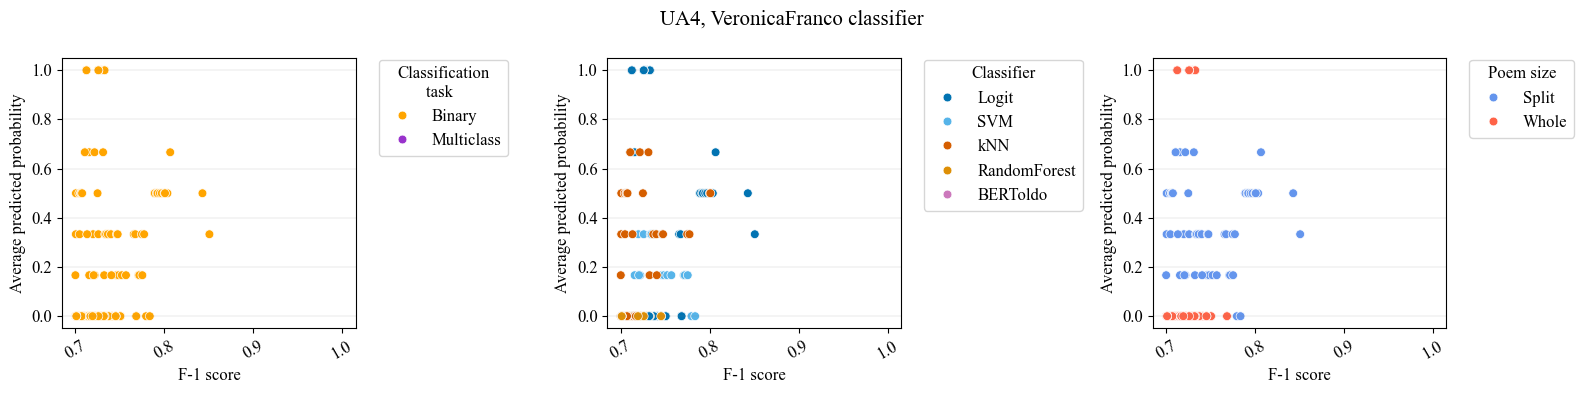

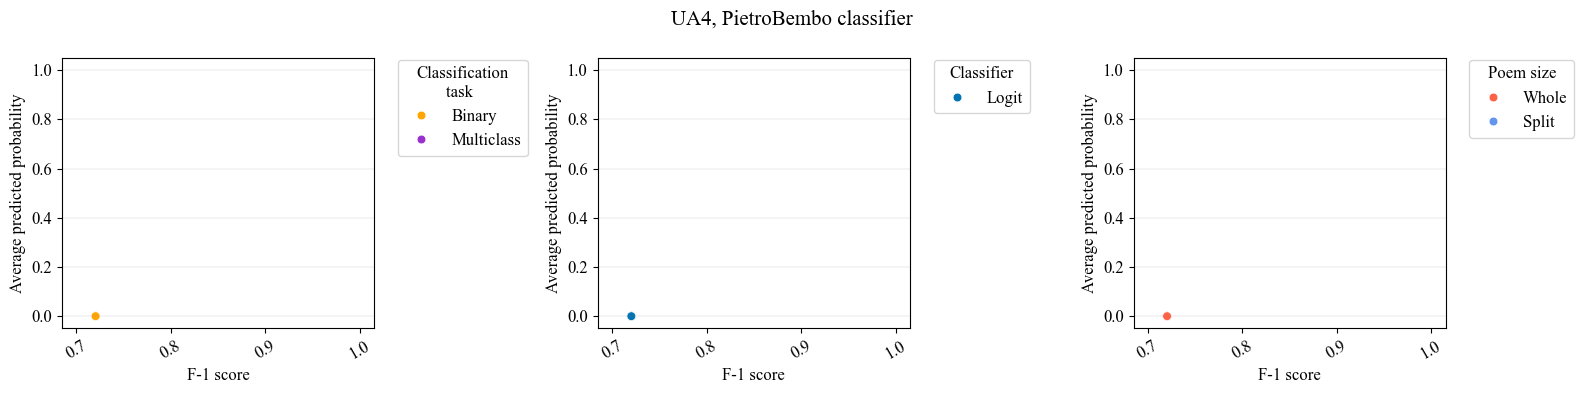

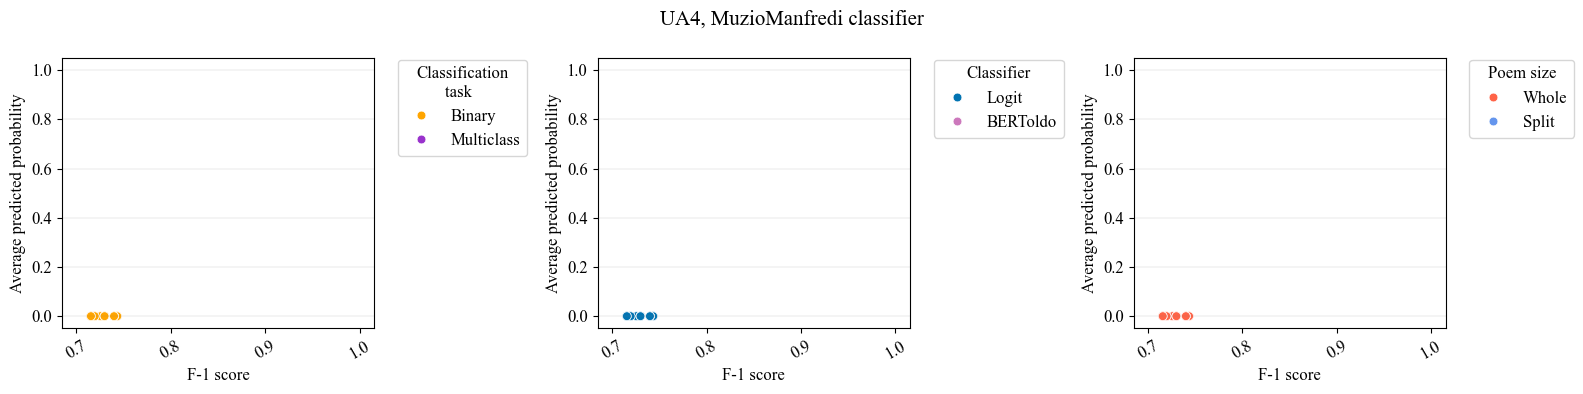

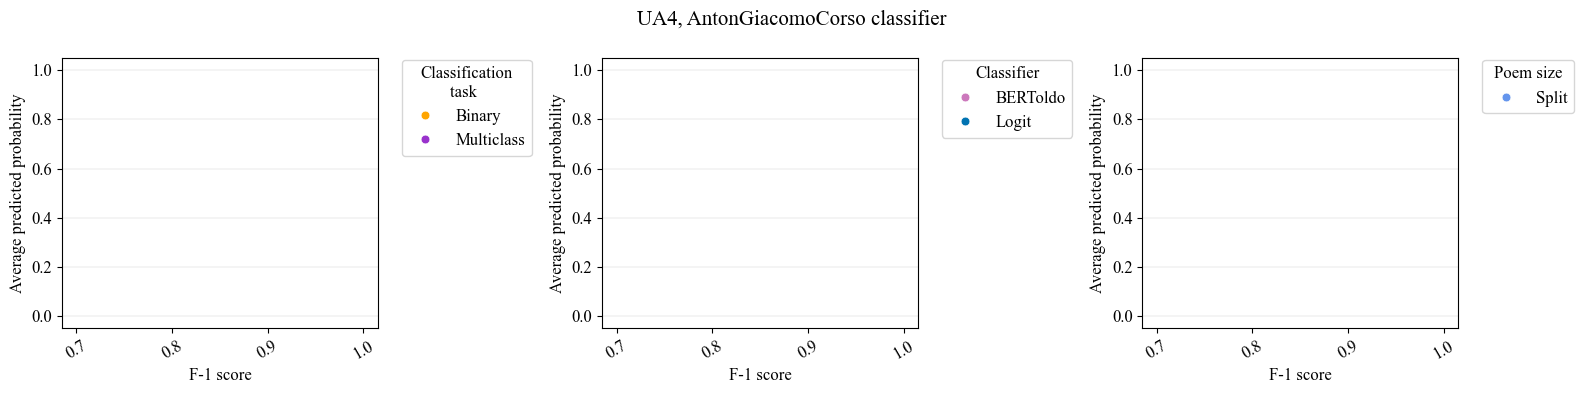

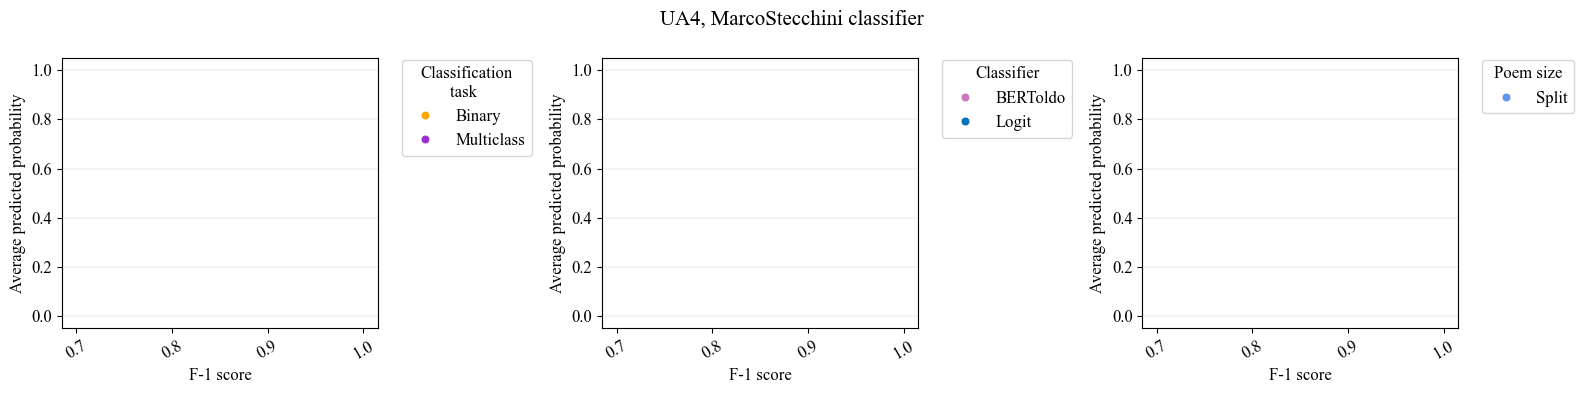

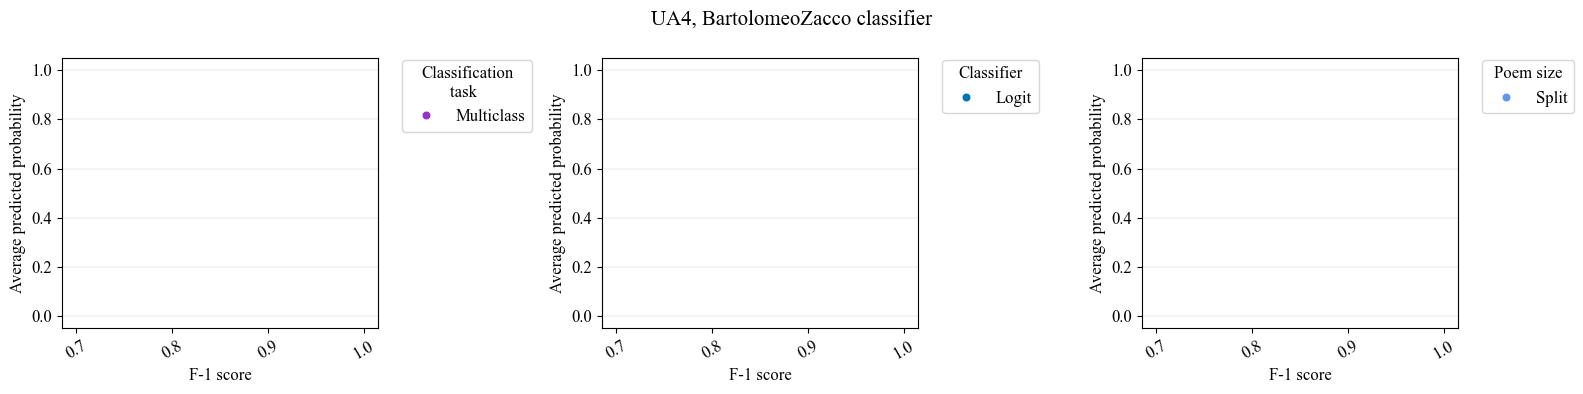

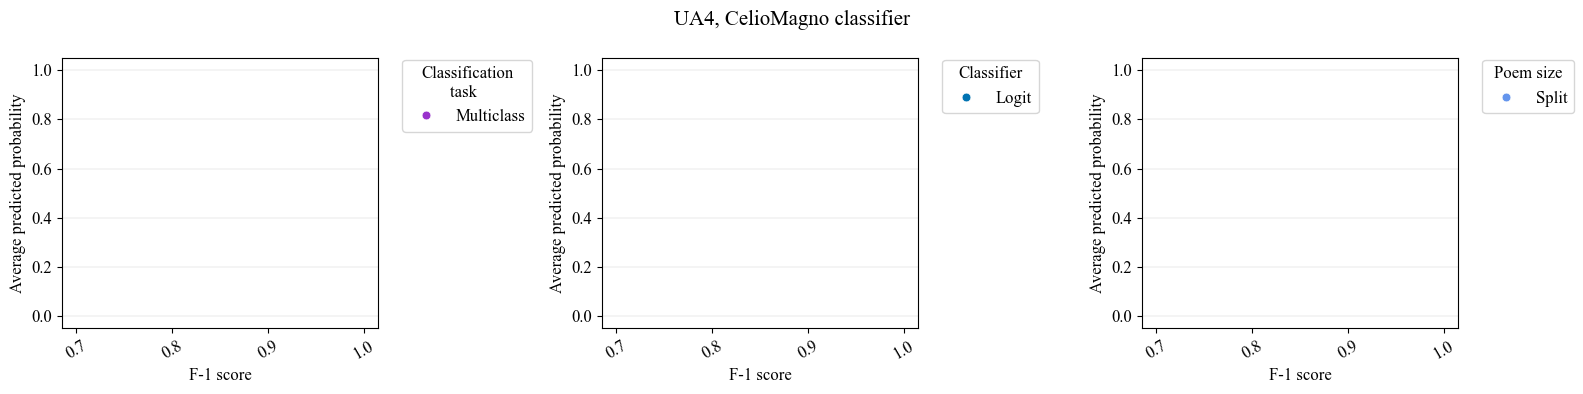

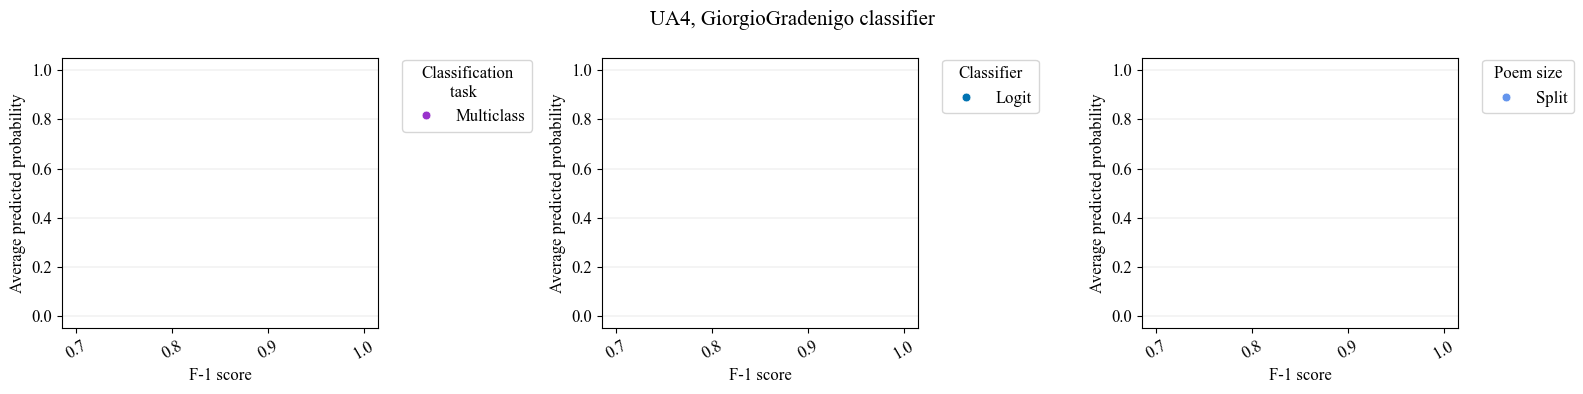

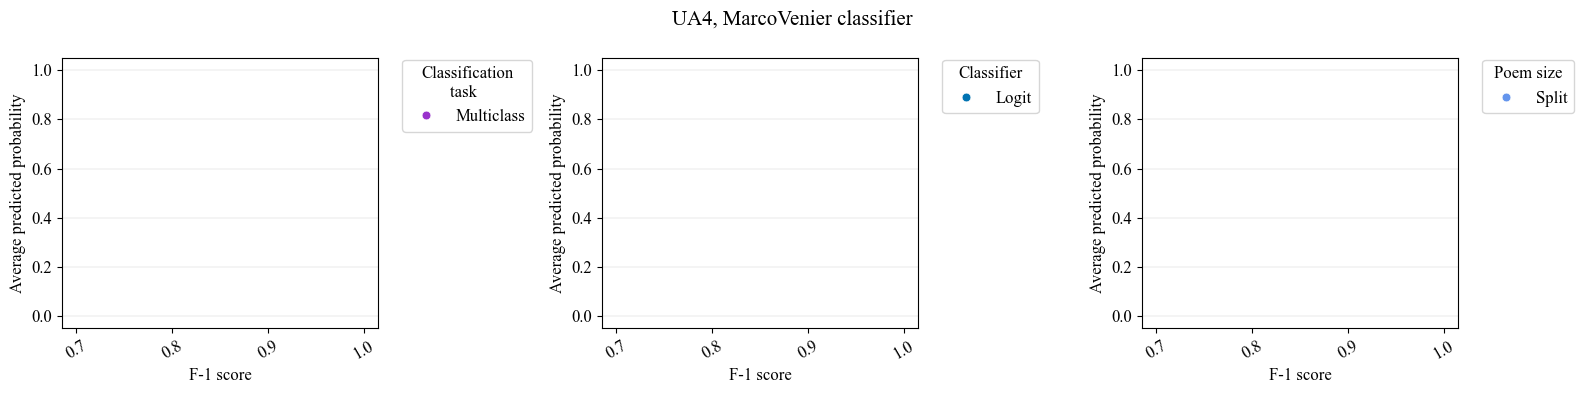

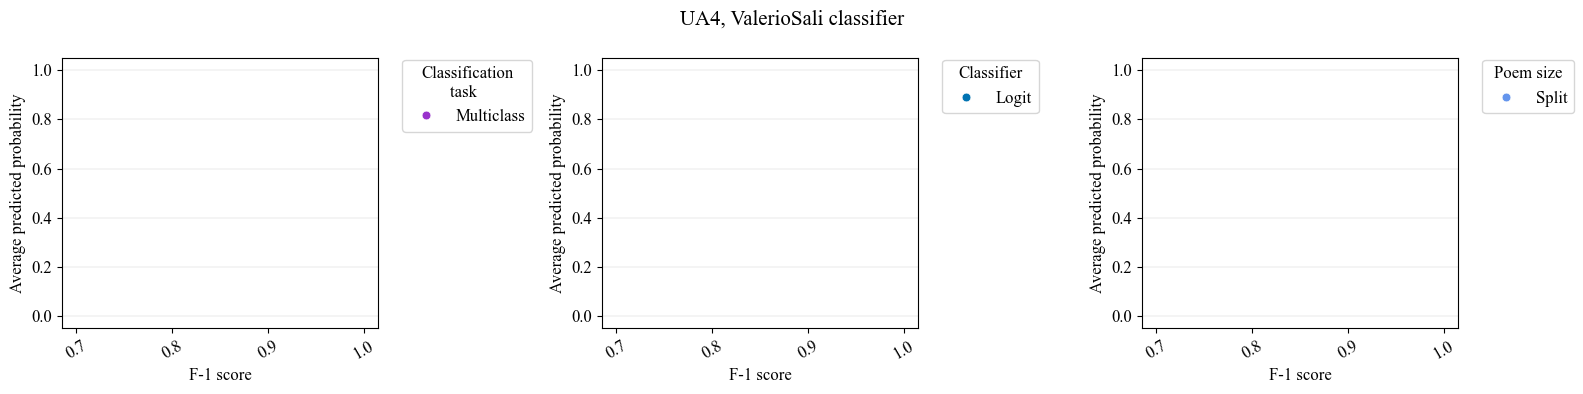

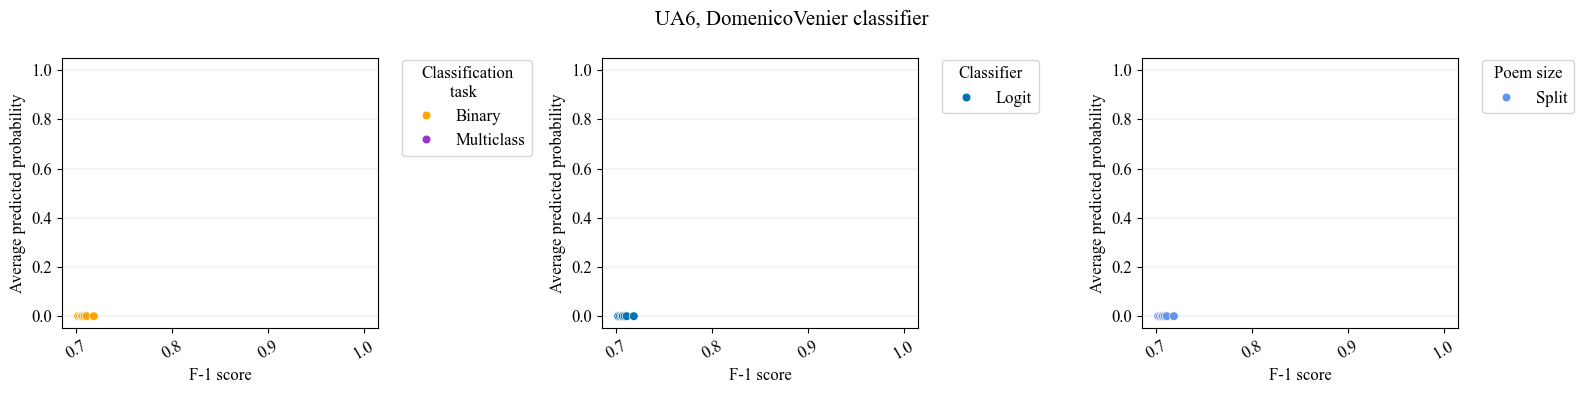

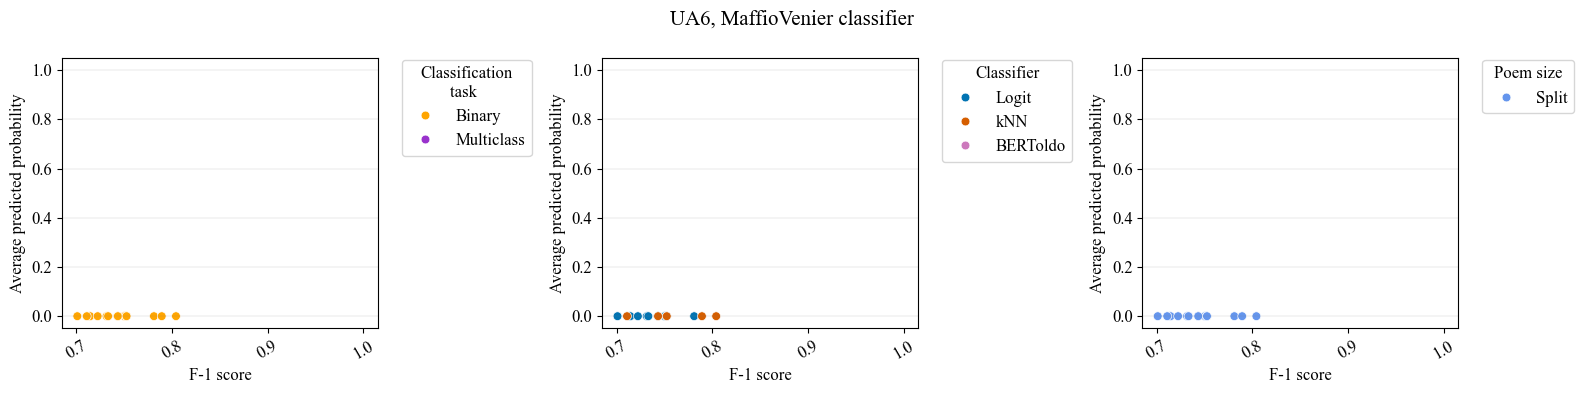

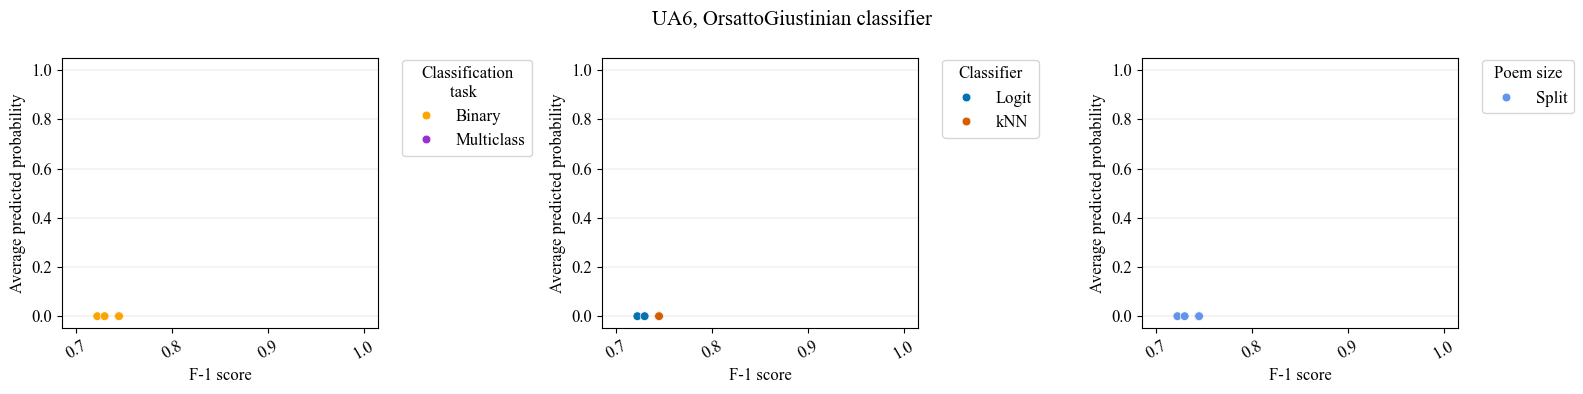

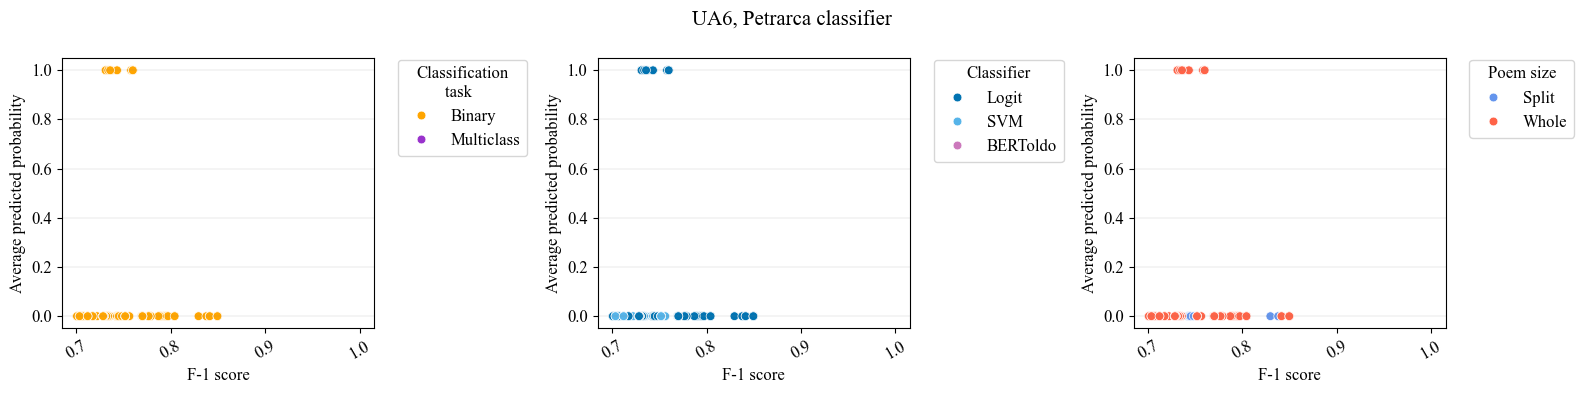

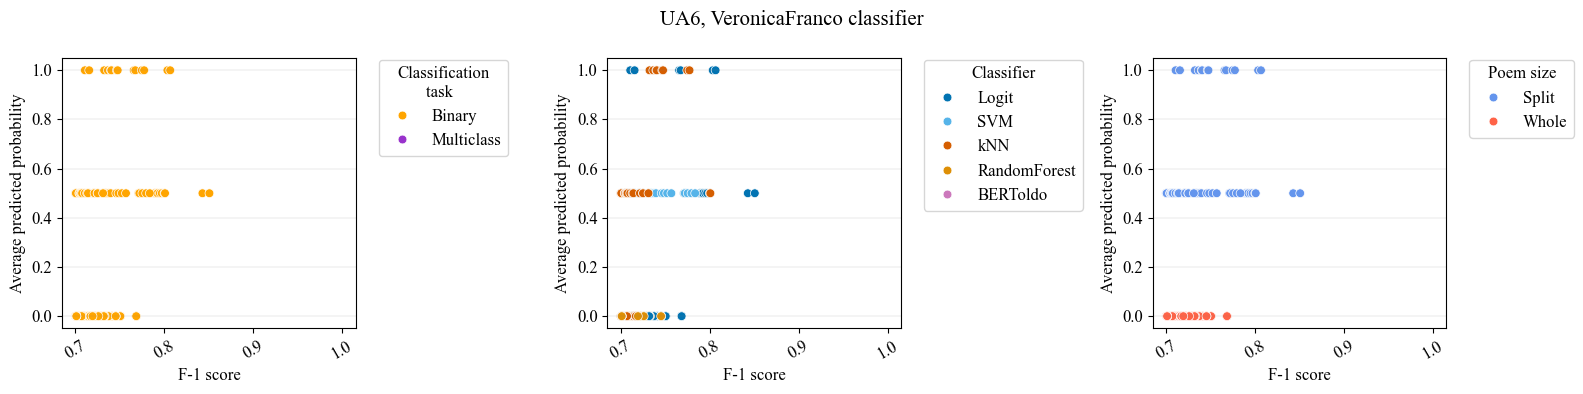

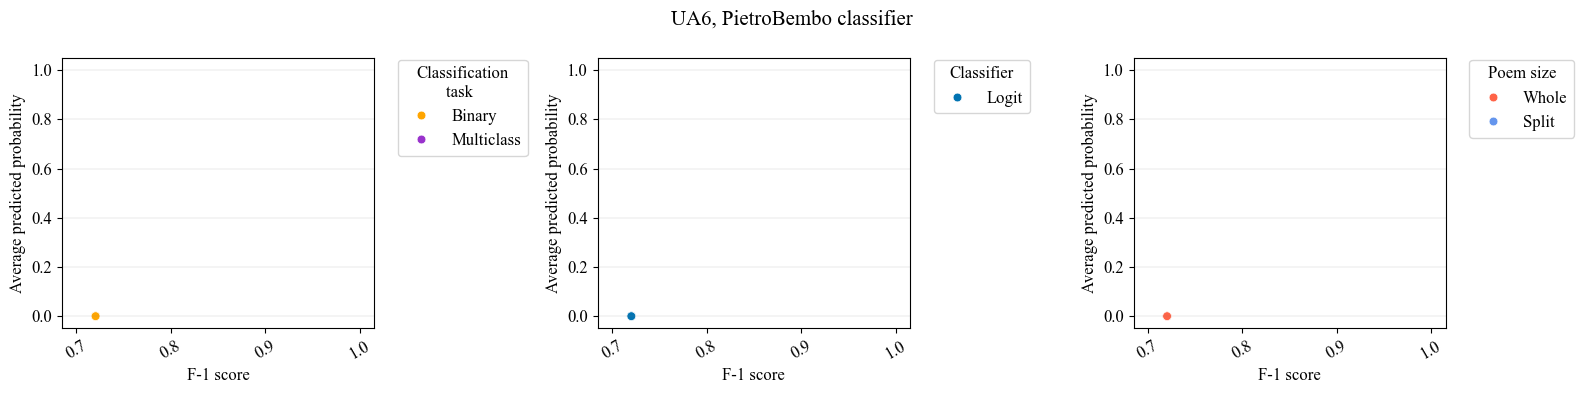

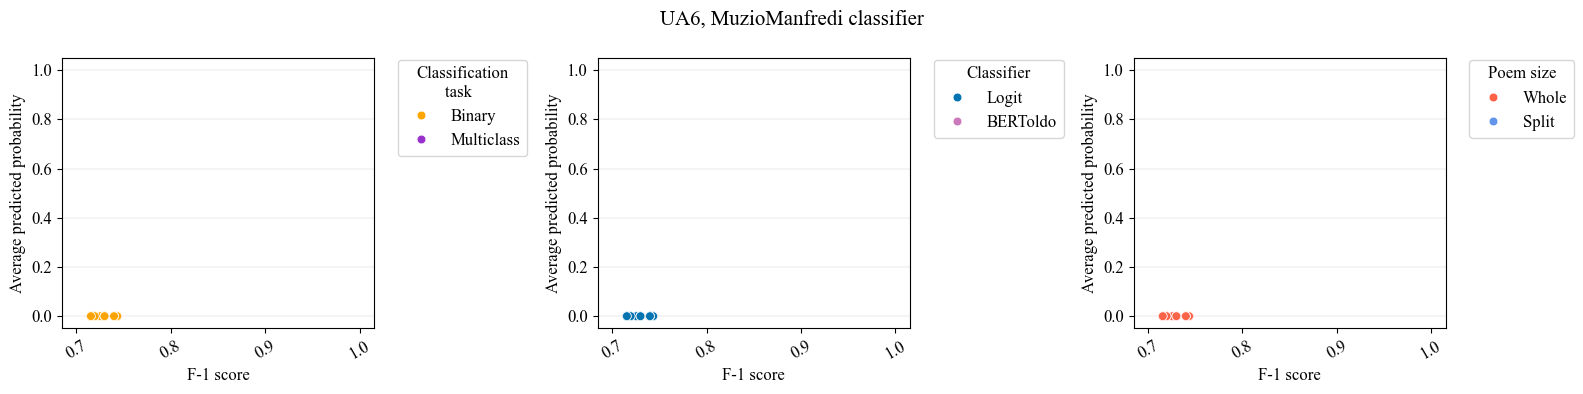

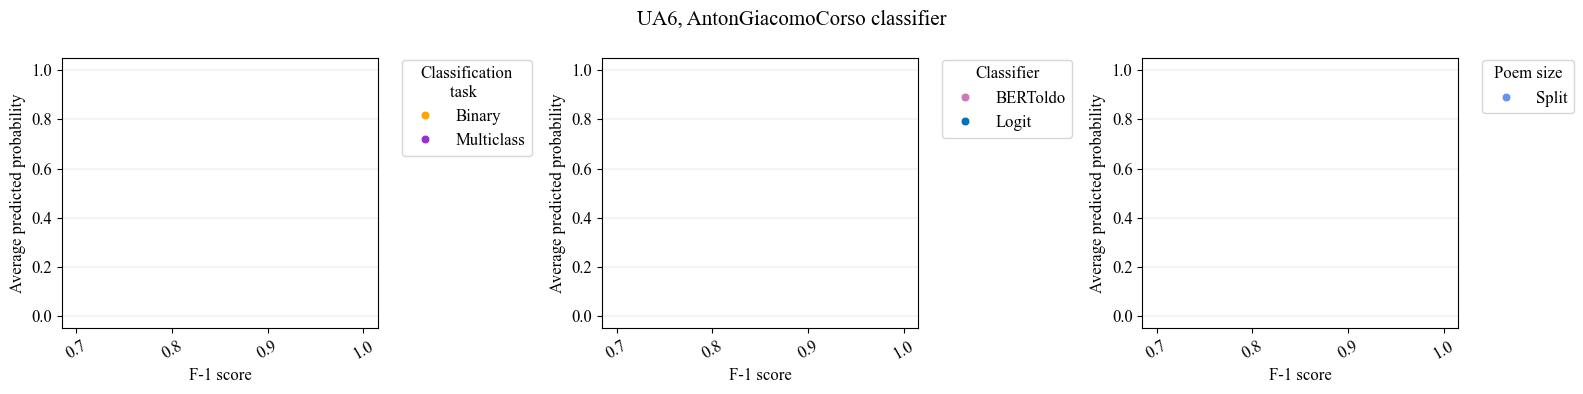

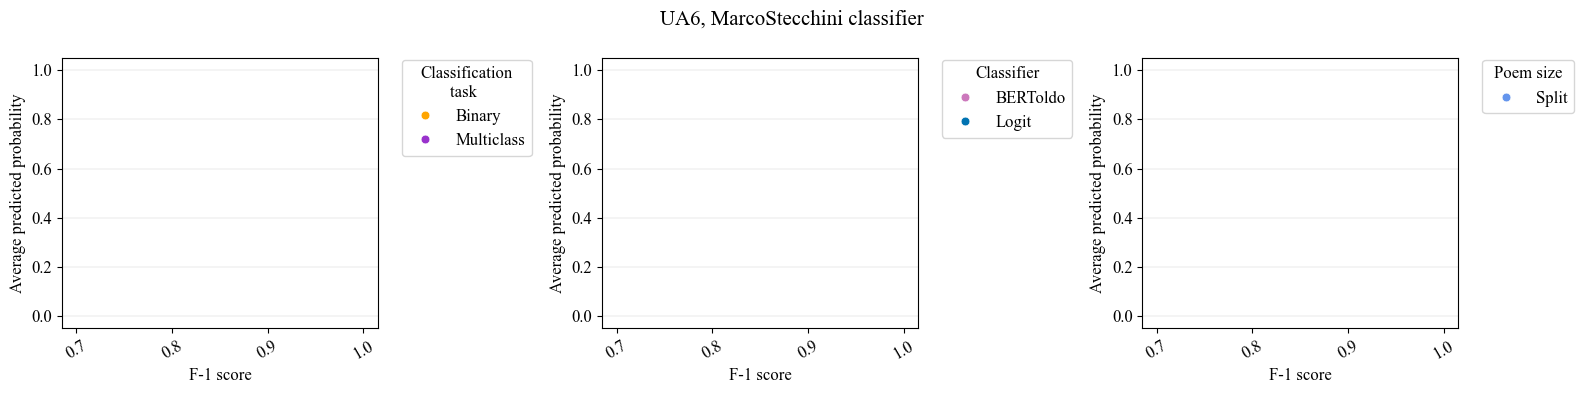

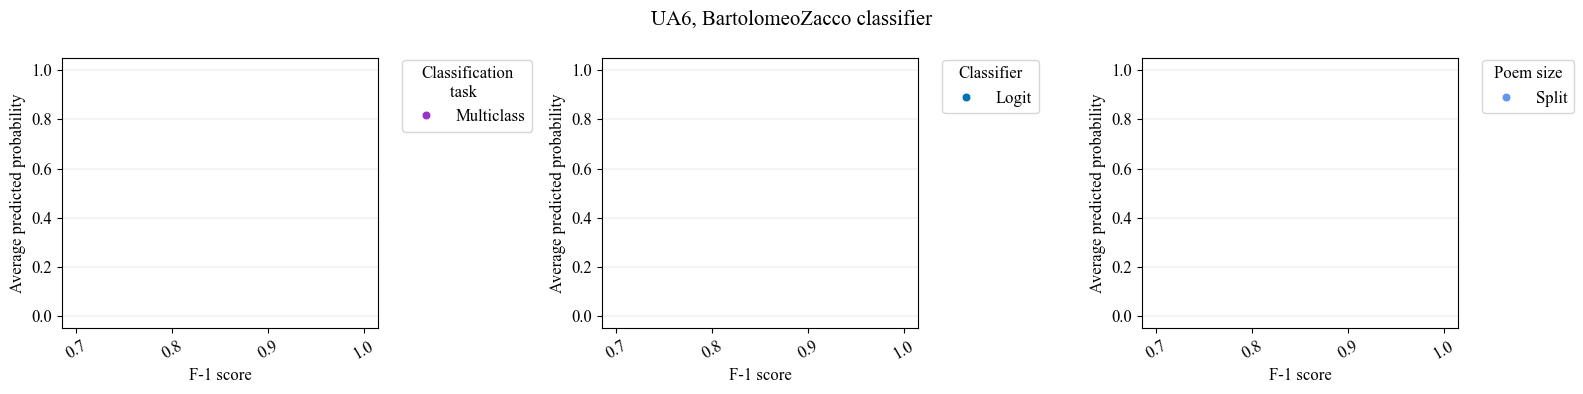

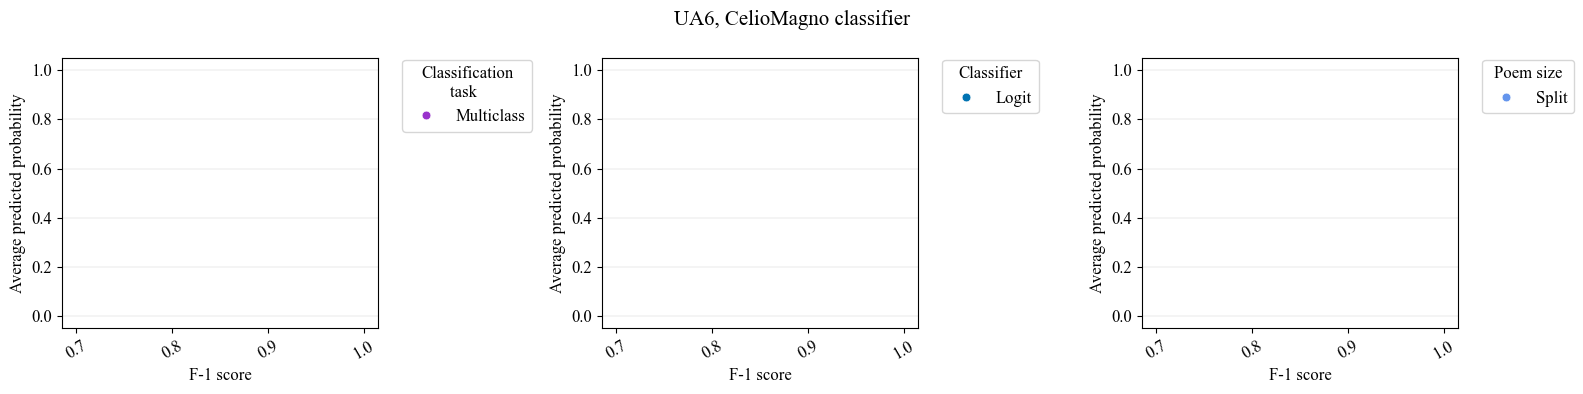

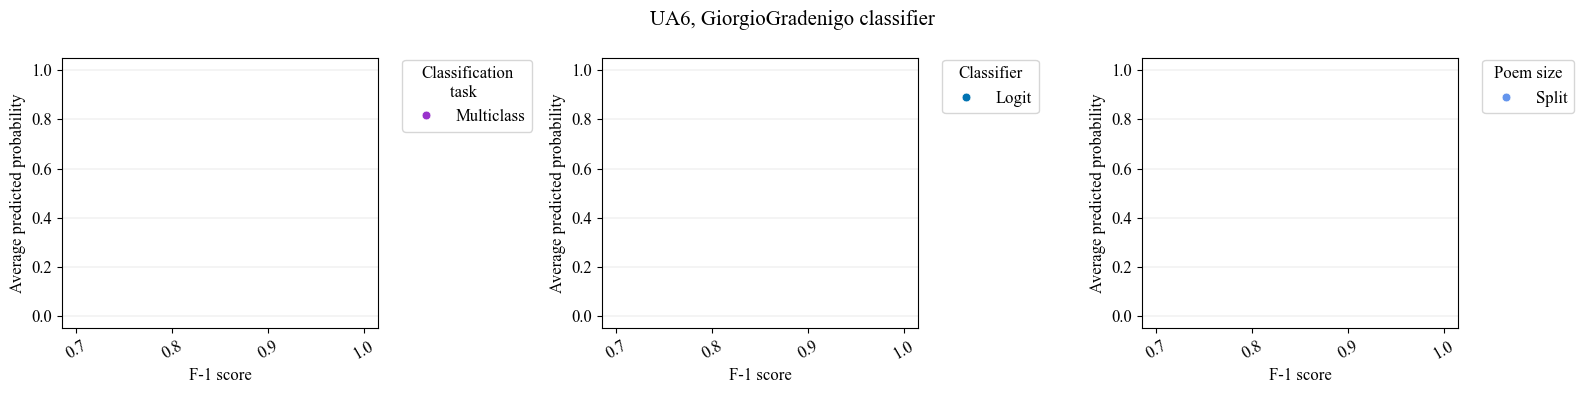

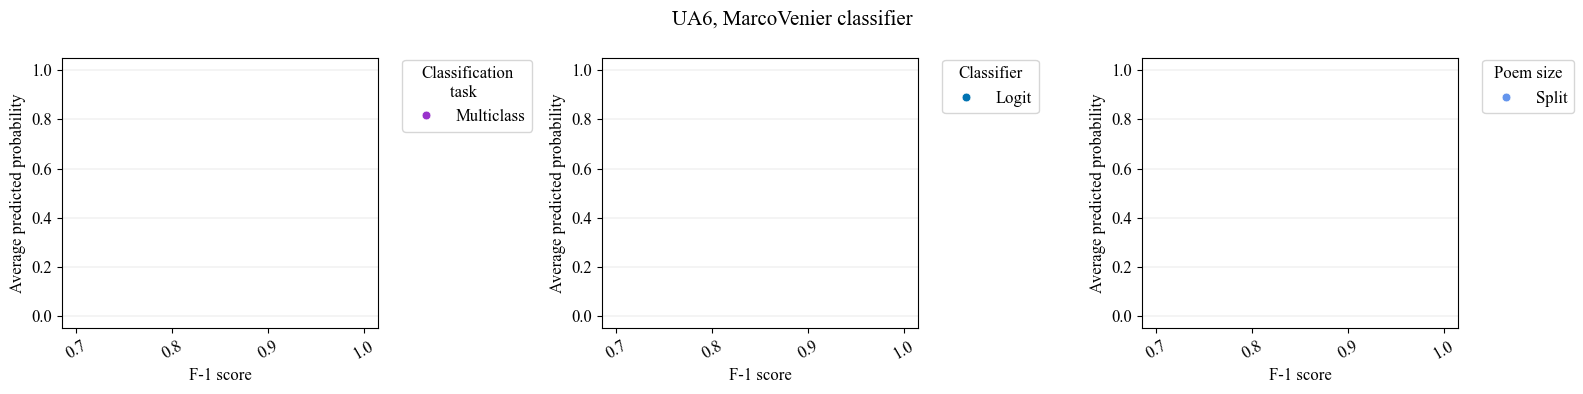

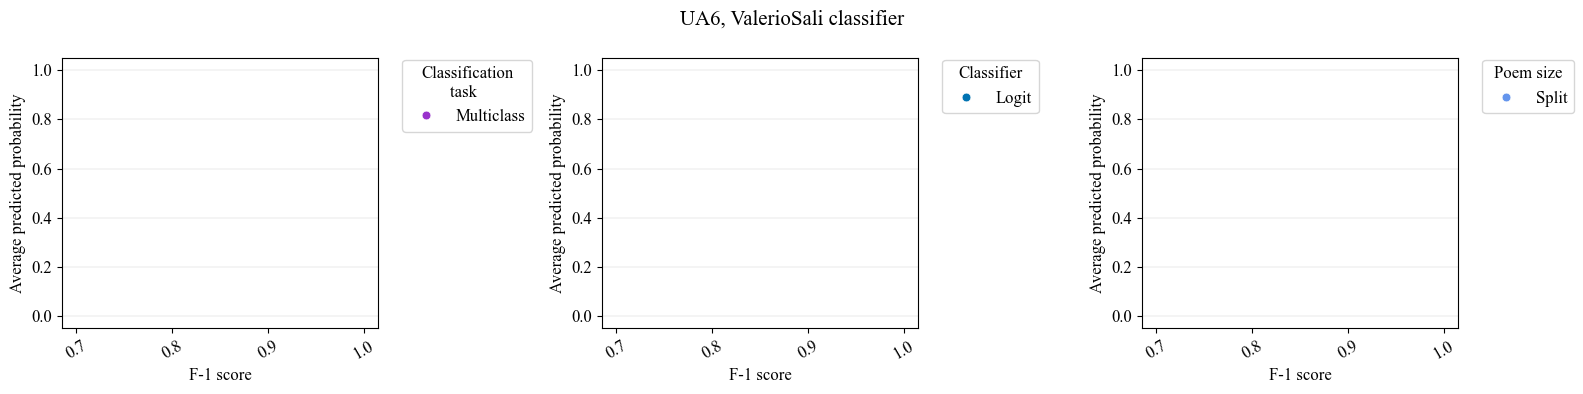

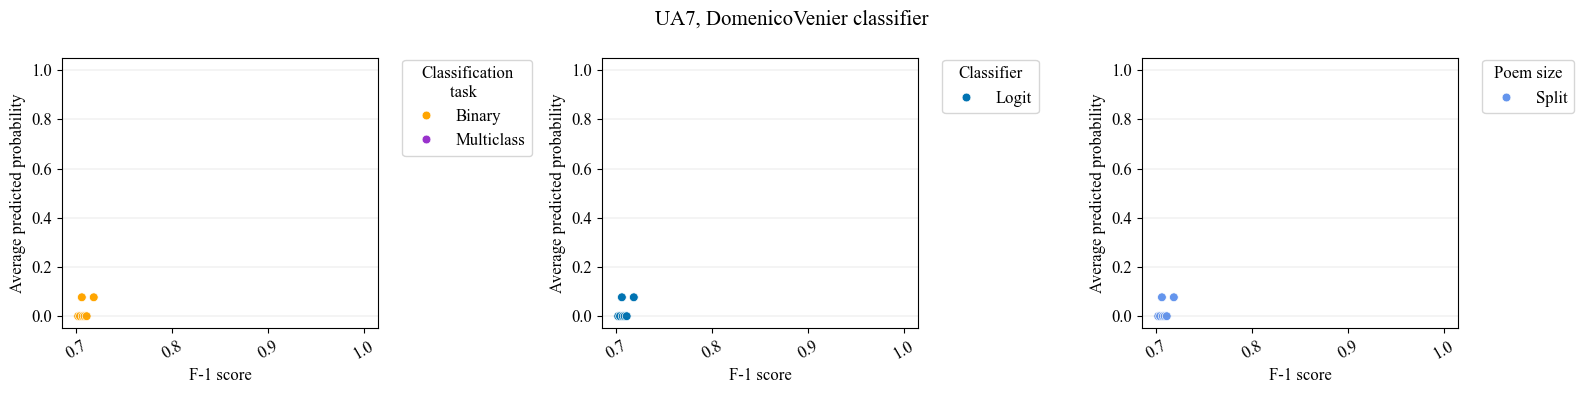

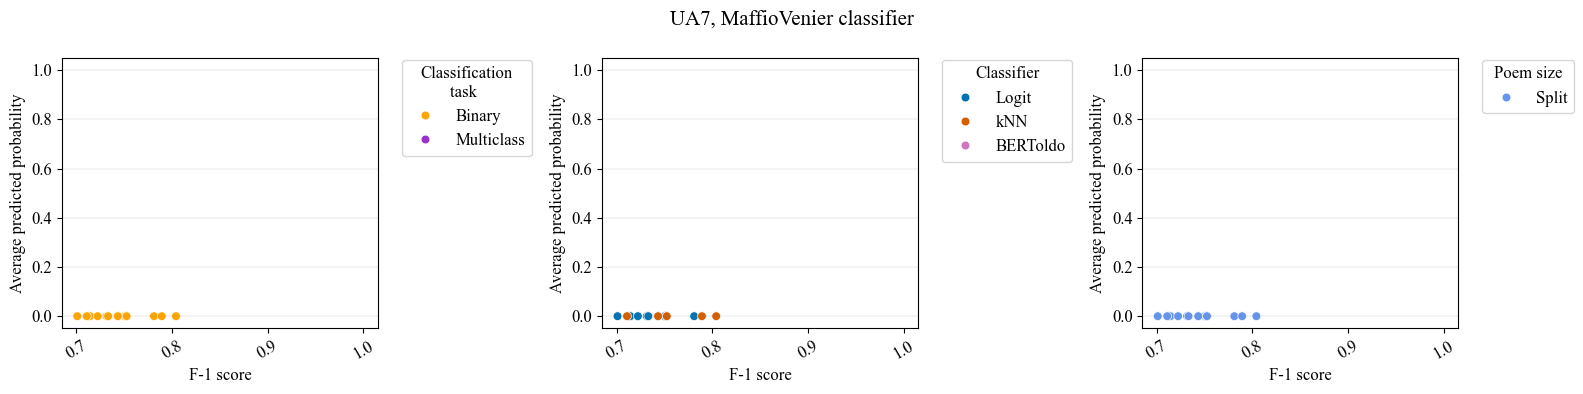

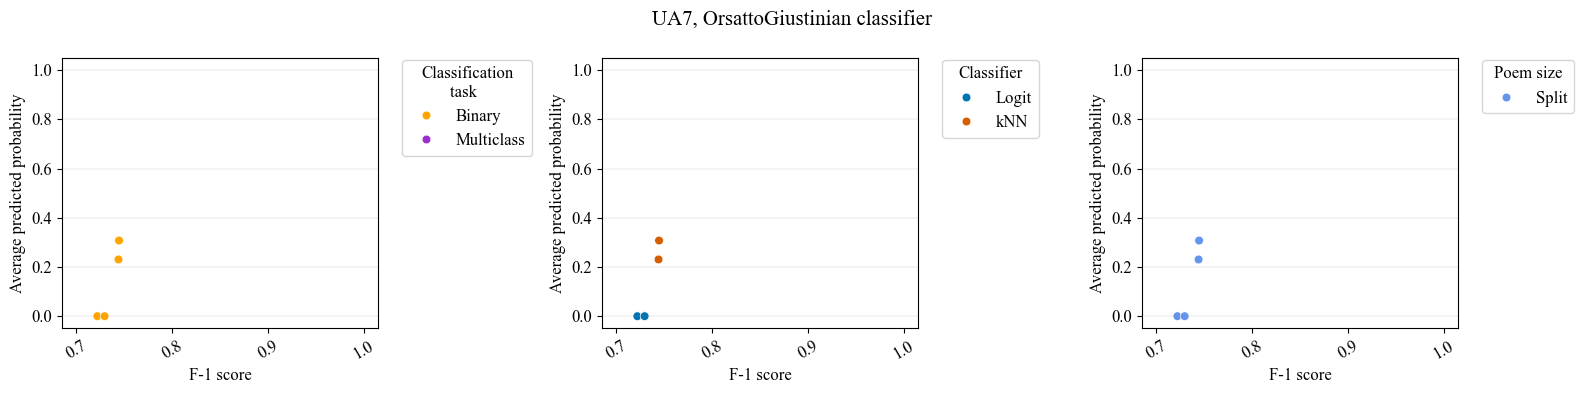

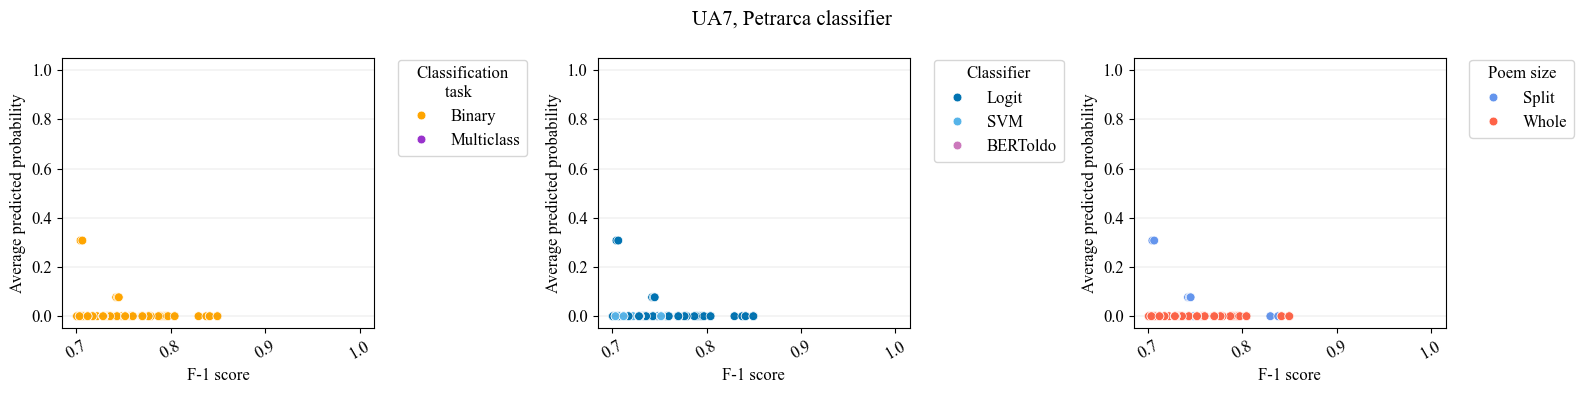

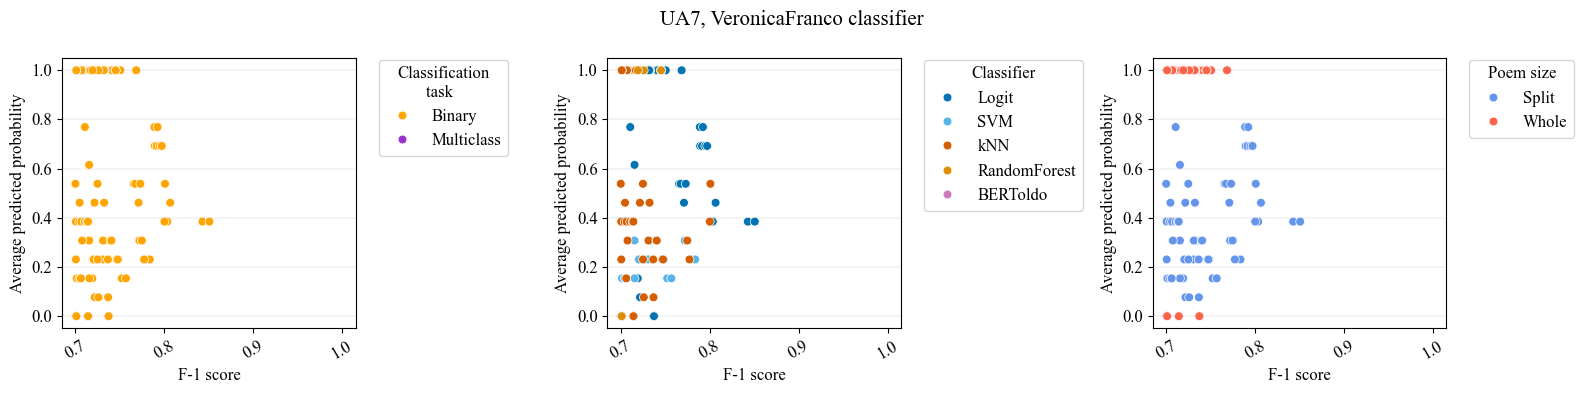

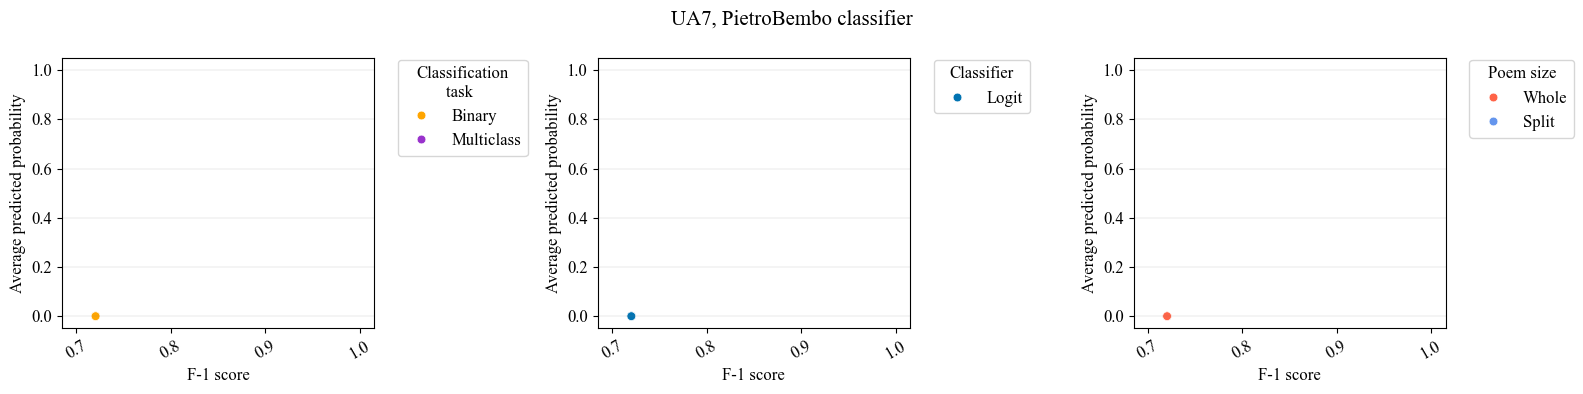

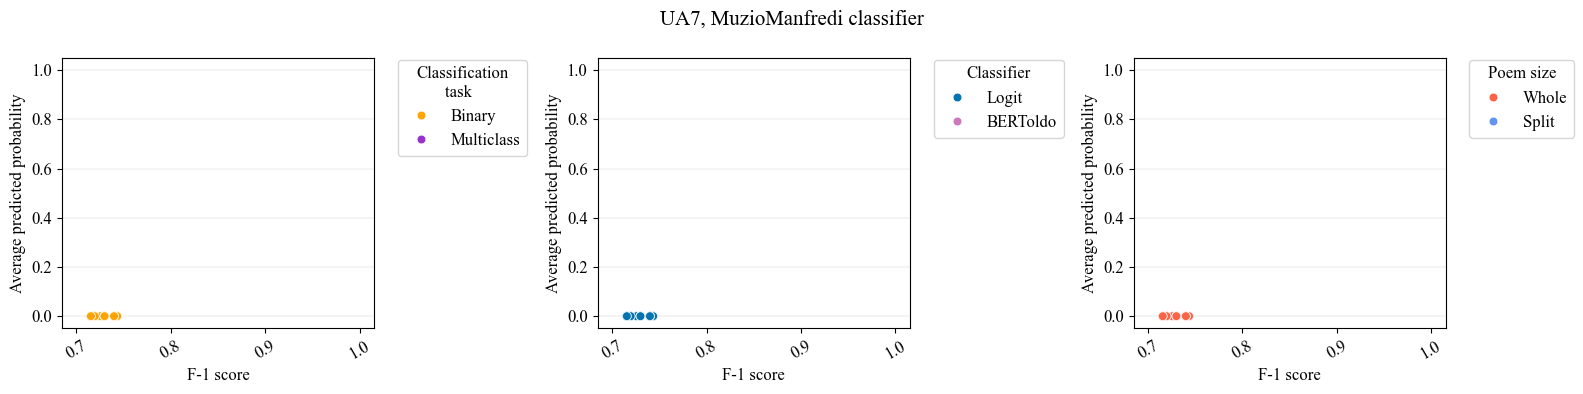

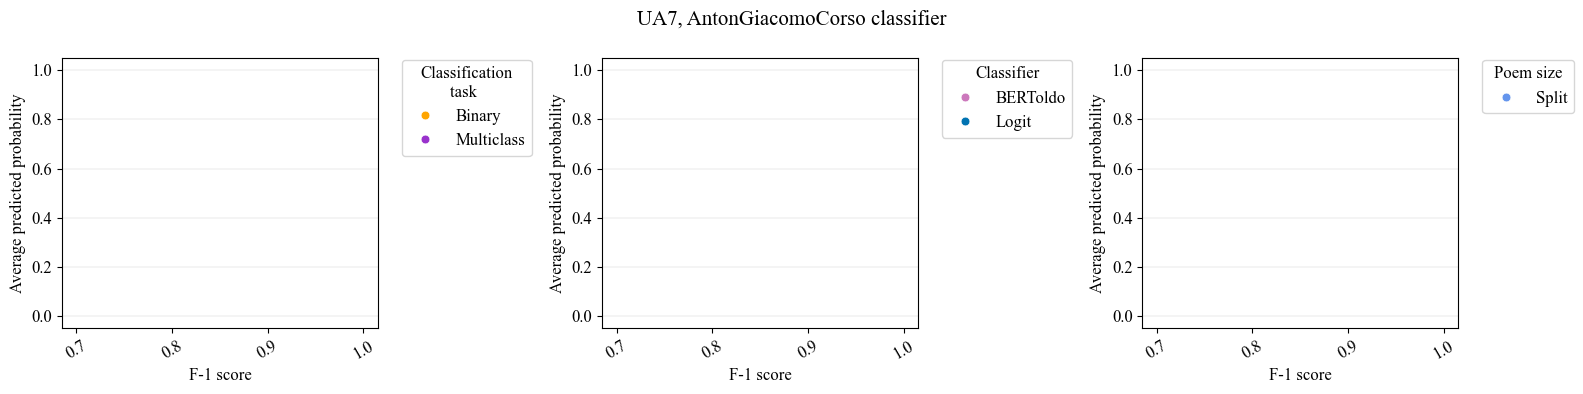

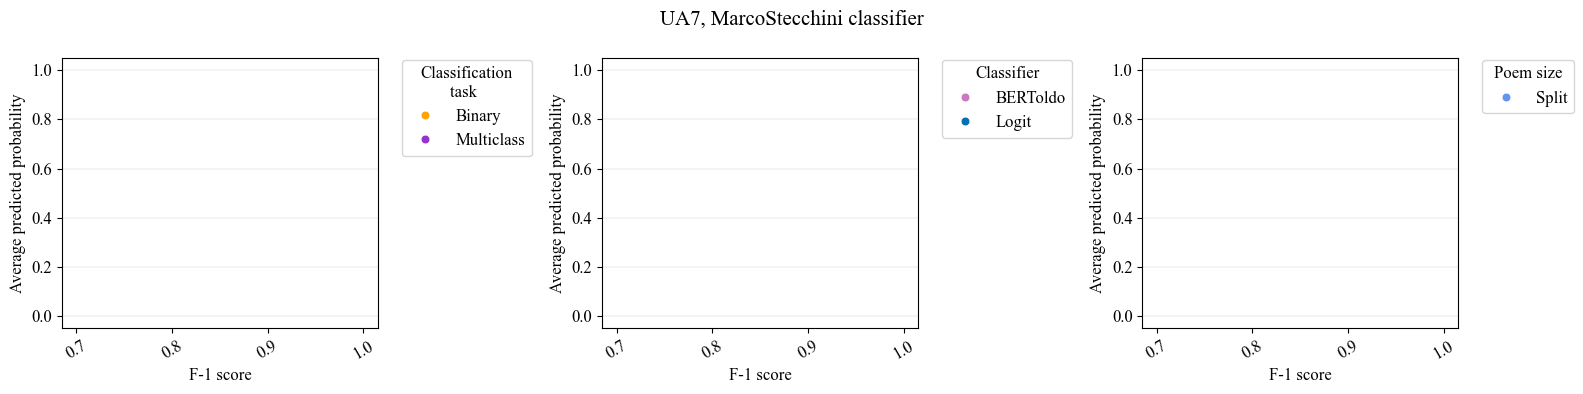

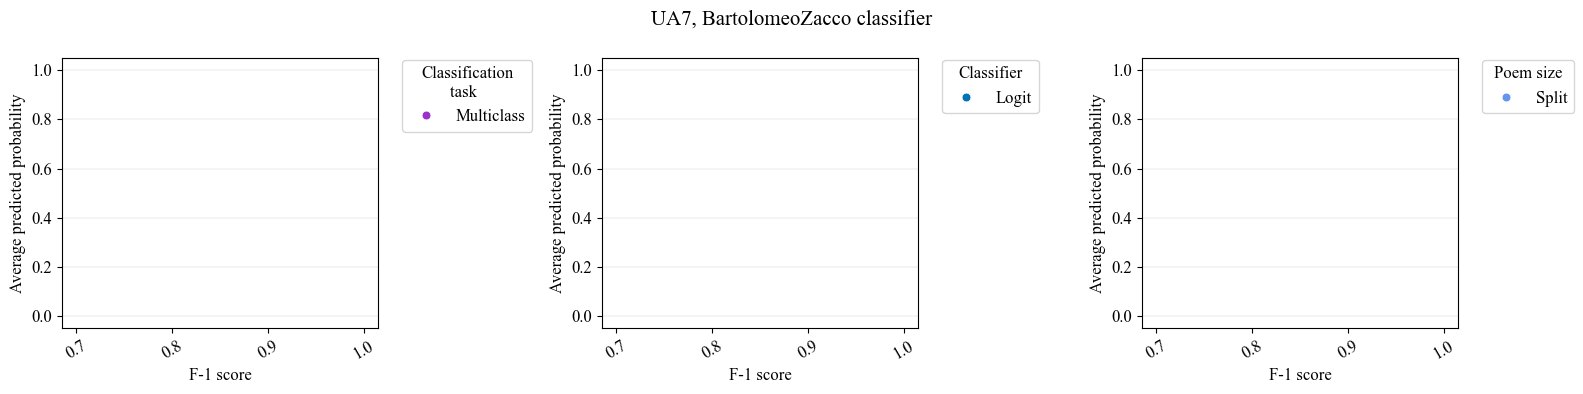

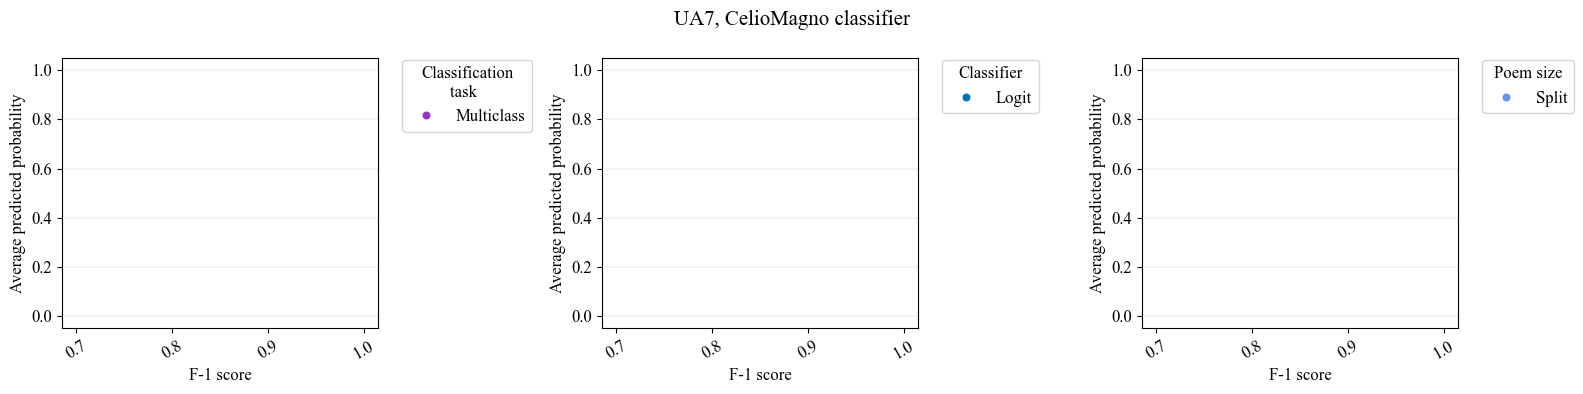

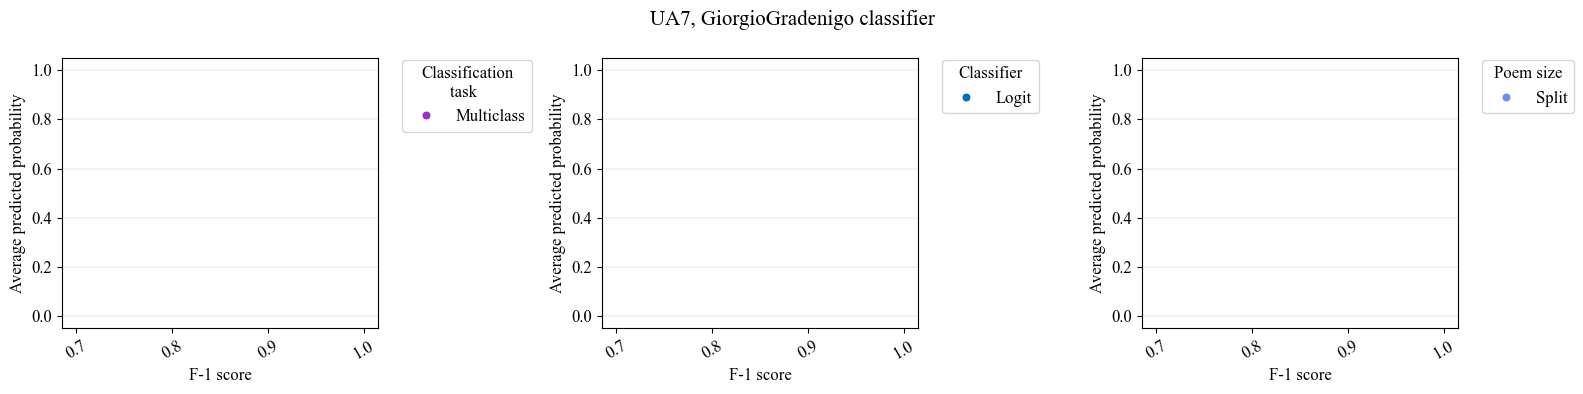

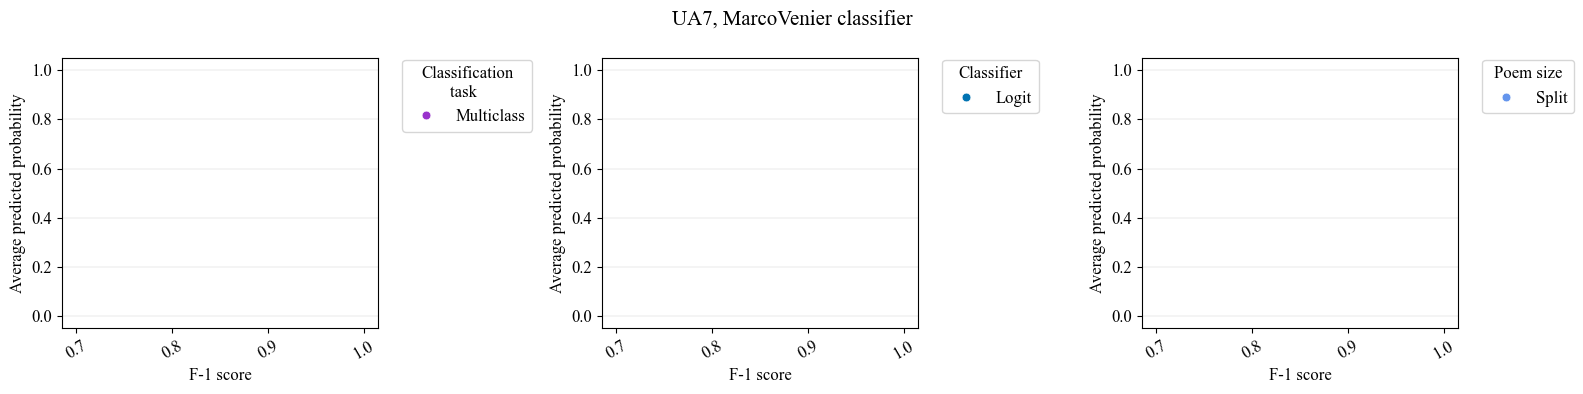

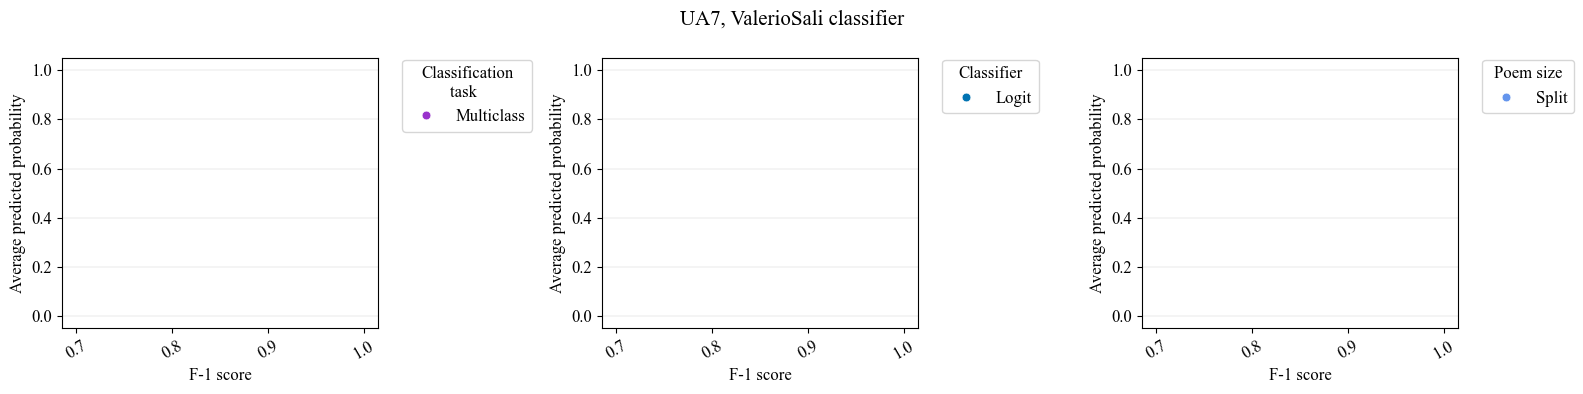

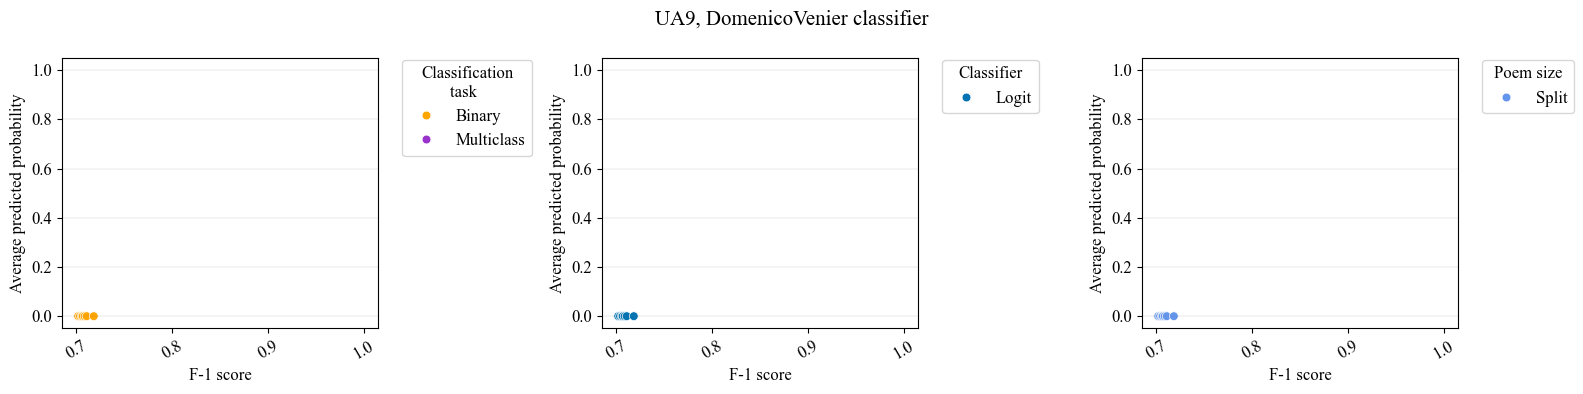

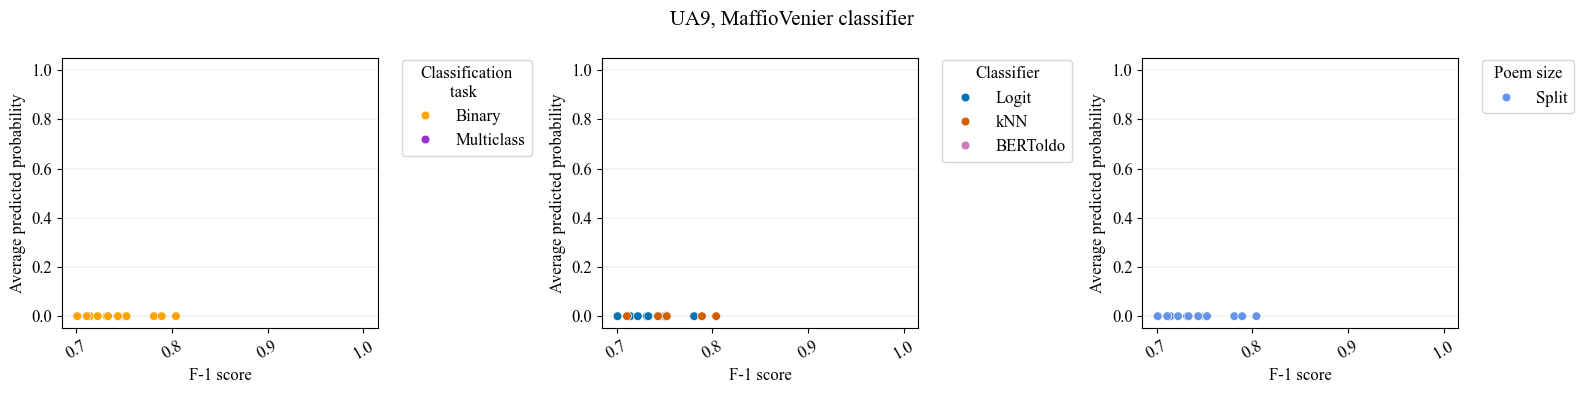

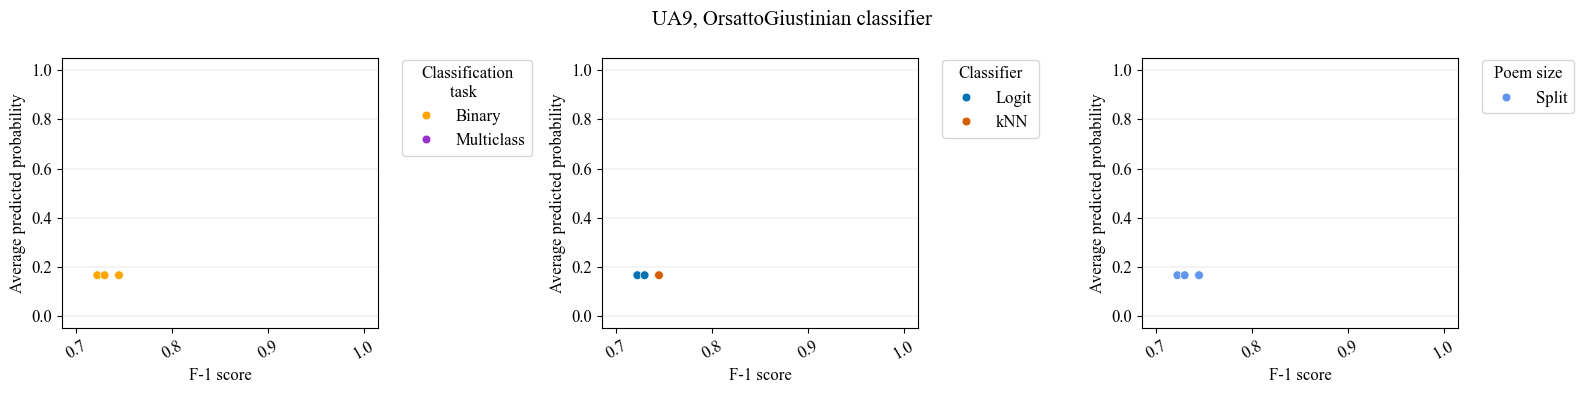

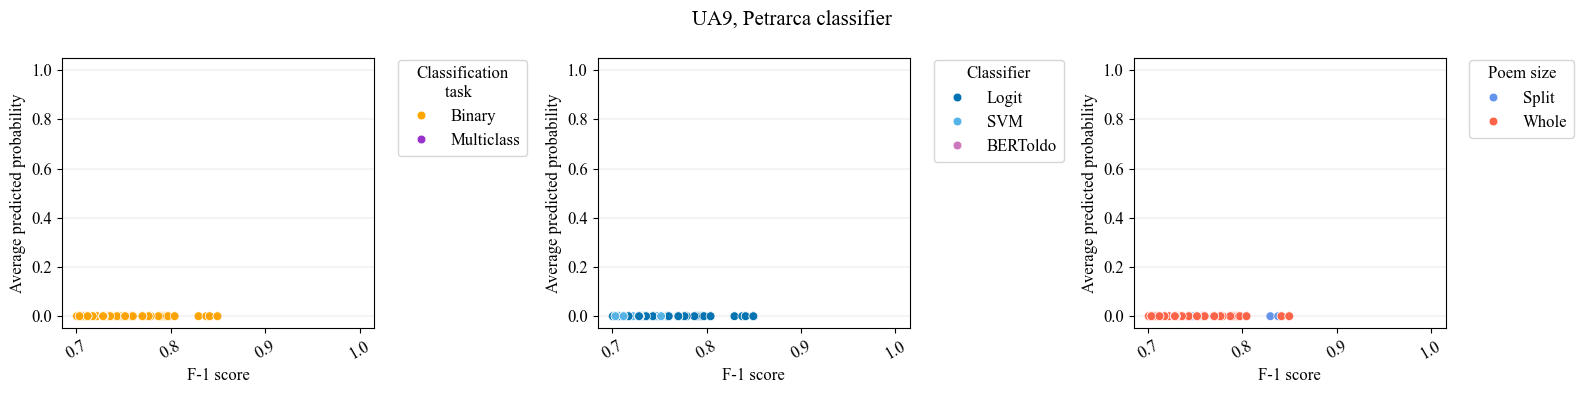

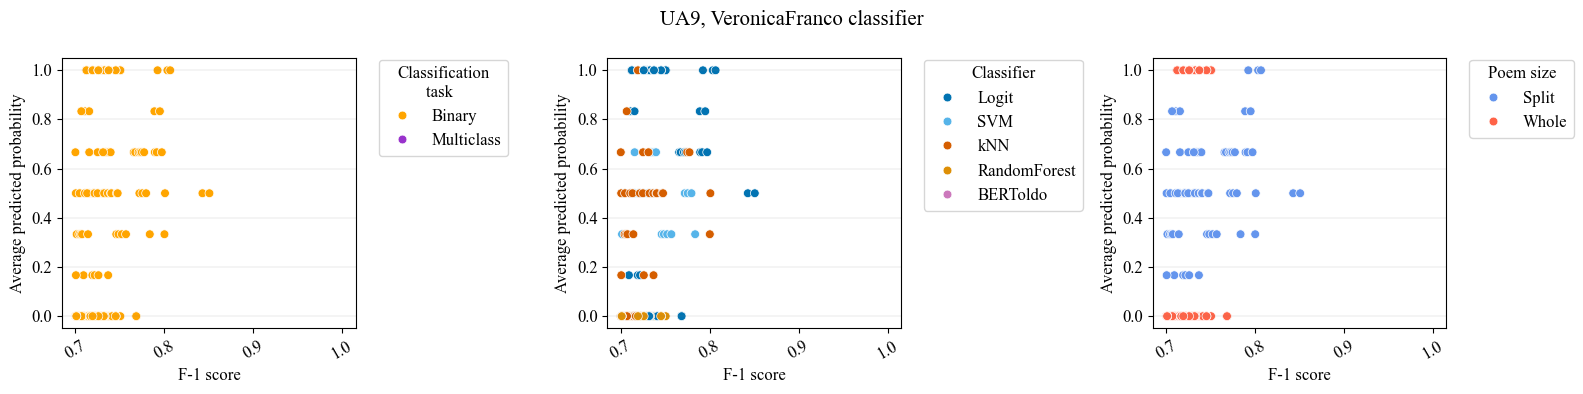

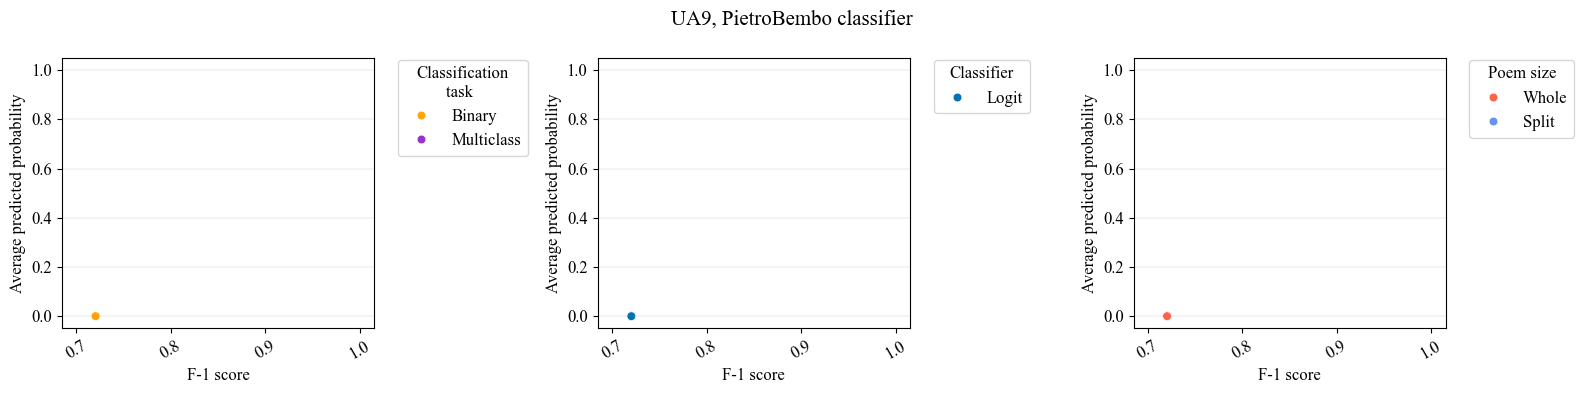

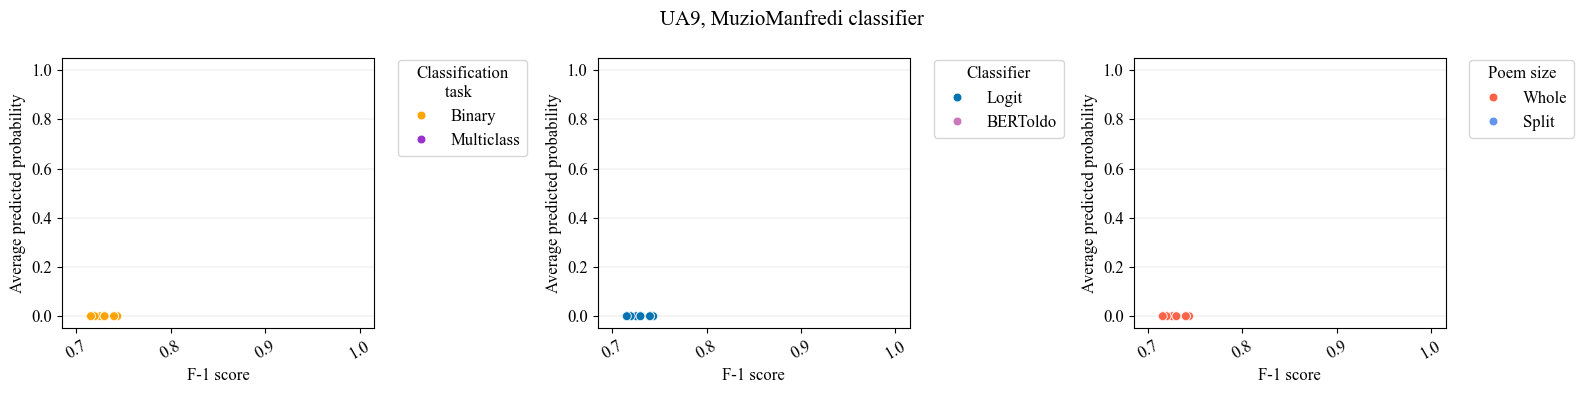

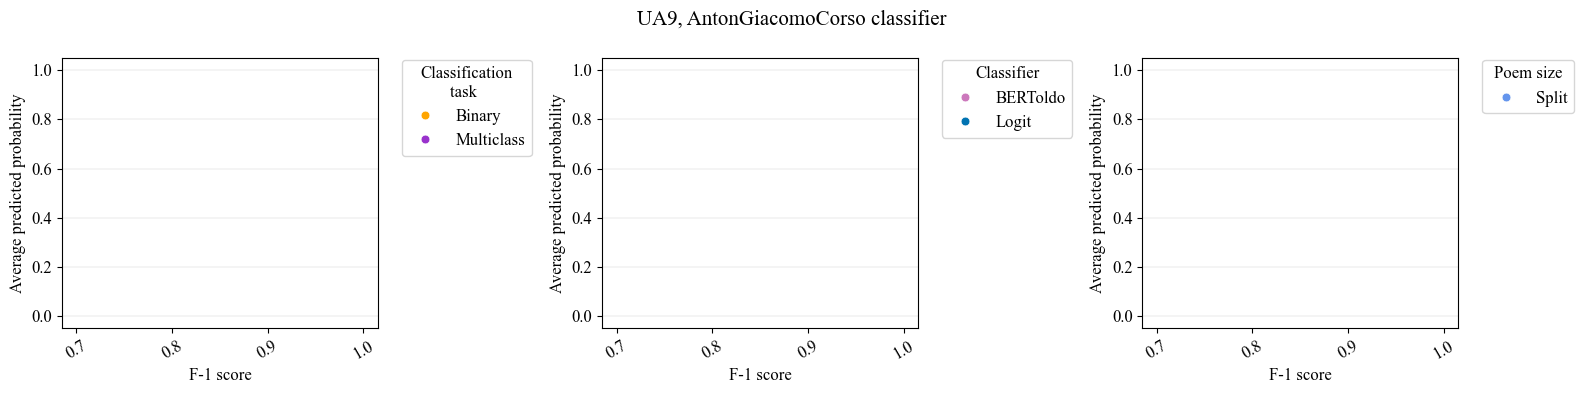

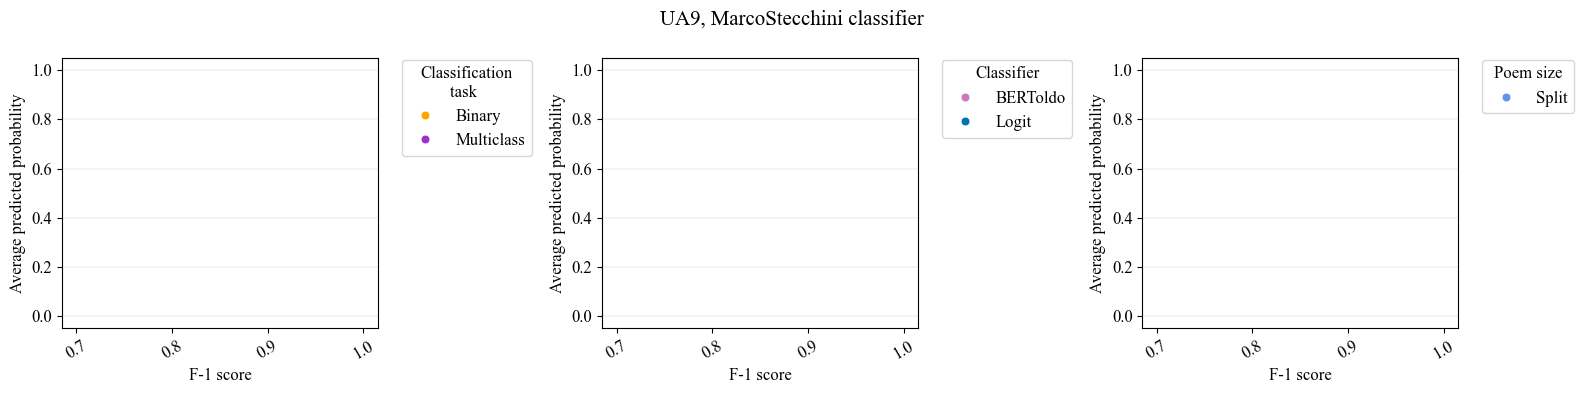

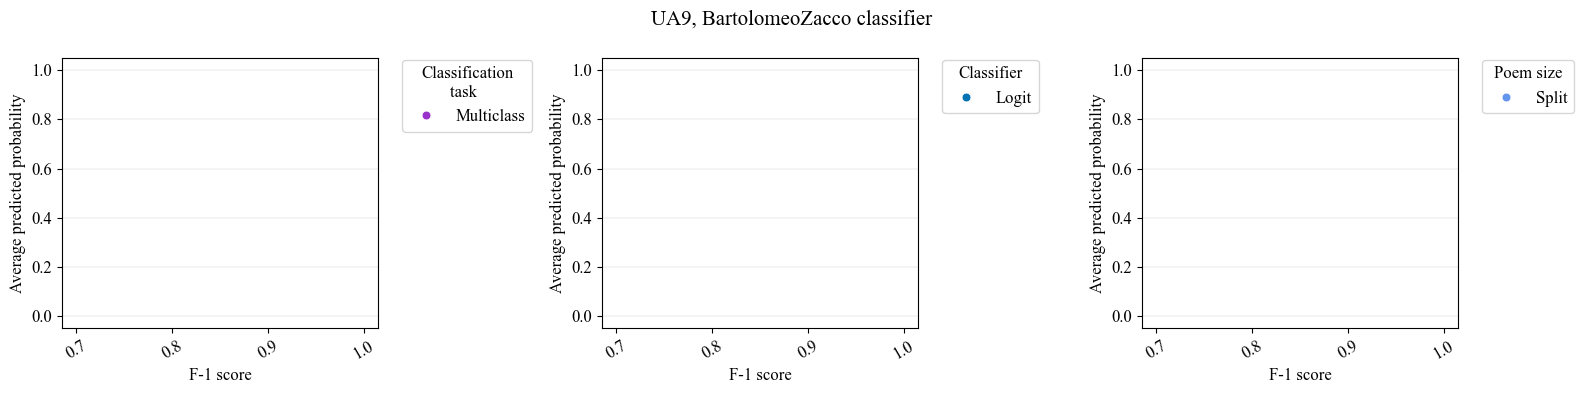

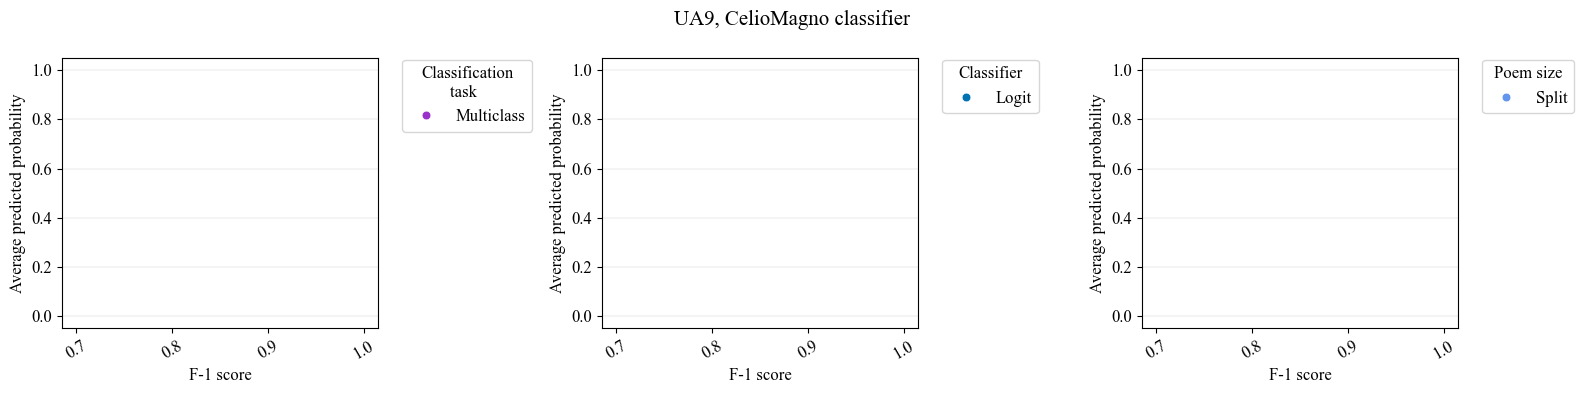

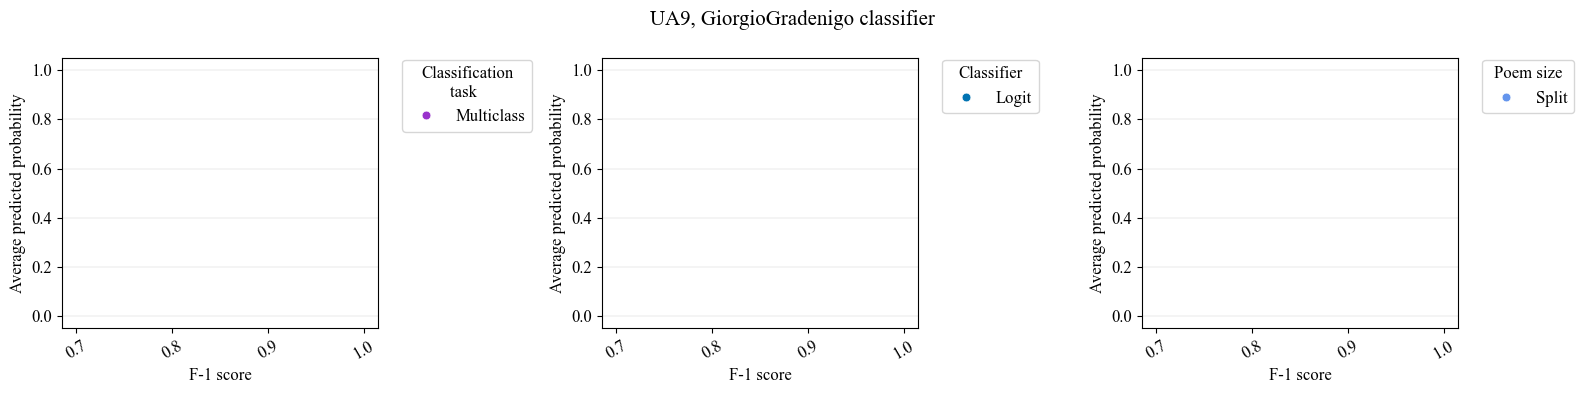

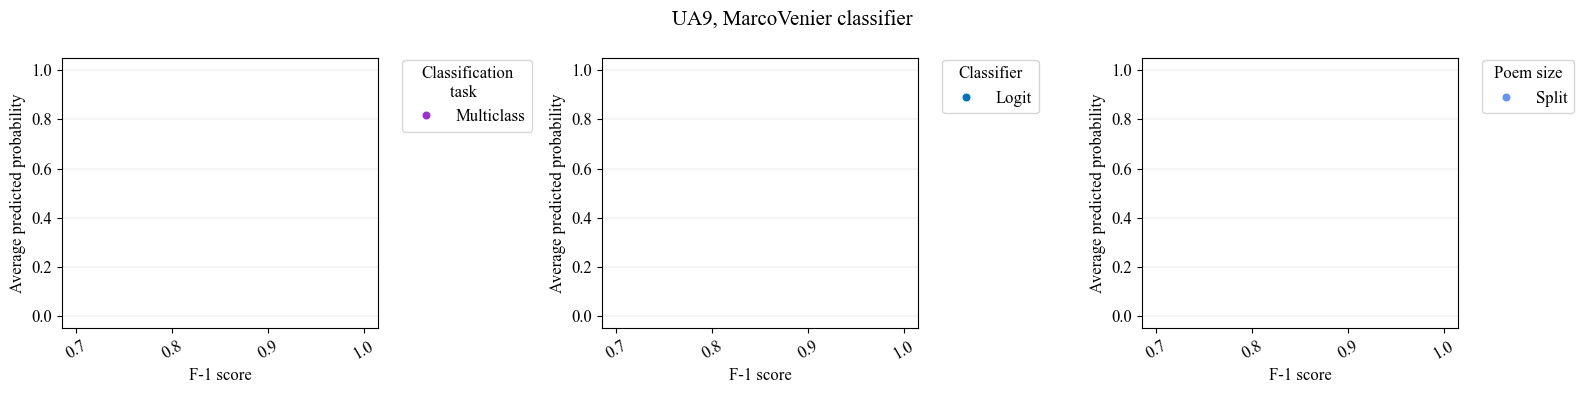

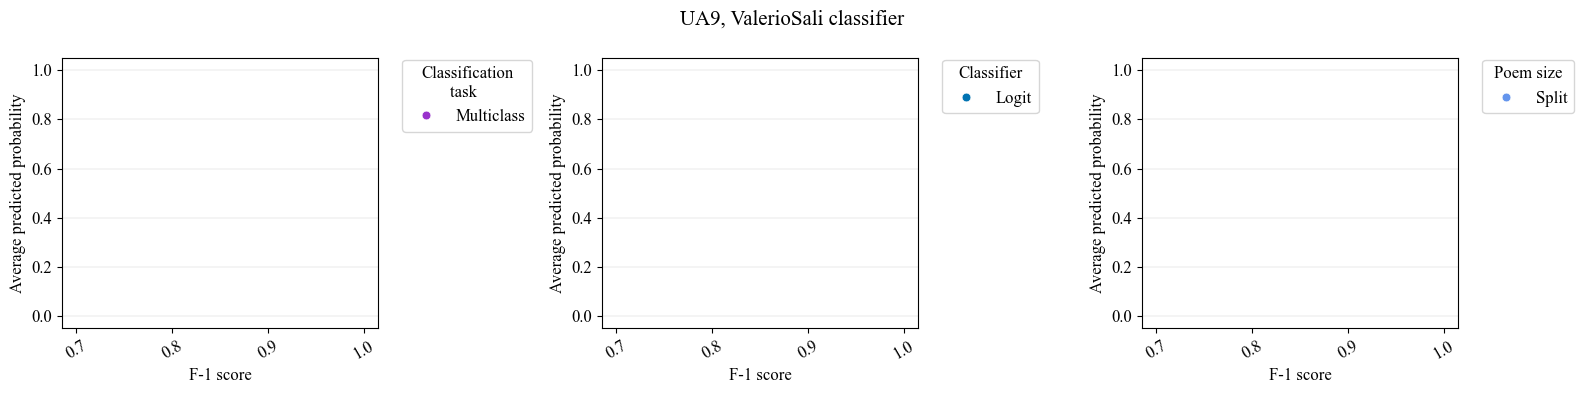

In [40]:
make_scatterplots(all_pred, hue_map, scatter_dir)

## Box plots

In [ ]:
box_dir = os.path.join(figures_dir, 'predictions', 'boxplots')
if not os.path.exists(box_dir):
  os.makedirs(box_dir)

In [ ]:
x_map = {'f1-score': ({0.7: pltt[0], 0.8: pltt[1], 0.9: pltt[9], 1: pltt[3]}, 'F-1 score'),
           'classifier_type': ({'Binary': 'orange', 'Multiclass': 'darkorchid'}, 'Classification\n       task'),
          #  'classifier' :
          #  ({'Logit': pltt[0], 'RandomForest': pltt[1], 'SVM': pltt[9],  'kNN': pltt[3], 'BERToldo': pltt[4]}, 'Classifier'),
           'poem_type': ({'Split': 'cornflowerblue', 'Whole': 'tomato'}, 'Poem size')}

In [ ]:
def make_boxplots(_pred_df, _hue_map, _box_dir):

  for poem_label in _pred_df.label.unique():

    for author in ['Franco', 'Petrarca']:

      _figure = plt.figure(figsize = (10,4), tight_layout=0.5)
      plt.suptitle(f'{poem_label}, {author} classifier', size=15)
      plot_pos = 1

      cond = (_pred_df['label'] == poem_label) & (_pred_df['author'] == author)
      df = _pred_df.loc[cond].copy()
      df['f1-score'] = df['f1-score'].round(1)

      for _x, _tuple in _hue_map.items():

        _figure.add_subplot(1,3,plot_pos)
        ax = sns.boxplot(data=df, x=_x, y='prediction', palette=_tuple[0])
        ax.set_ylim(-0.05,1.05)

        # Calculate number of obs per group & median to position labels
        medians = df.groupby([_x])['prediction'].median().values
        nobs = df[_x].value_counts().values
        nobs = [str(x) for x in nobs.tolist()]

        # Add it to the plot
        _pos = range(len(nobs))
        for tick,label in zip(_pos,ax.get_xticklabels()):
          ax.text(_pos[tick],
            medians[tick] + 0.01,
            nobs[tick],
            horizontalalignment='center',
            size='small',
            color='black',
            weight='semibold')

        ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
        ax.tick_params(axis='x', labelrotation=30)
        ax.set_ylabel(f'Predicted probability')
        ax.set_xlabel(f'{_tuple[1]}')

        plot_pos += 1

      _figure.savefig(os.path.join(_box_dir, f'{poem_label}_{author}.png'), dpi = 300, bbox_inches = "tight")

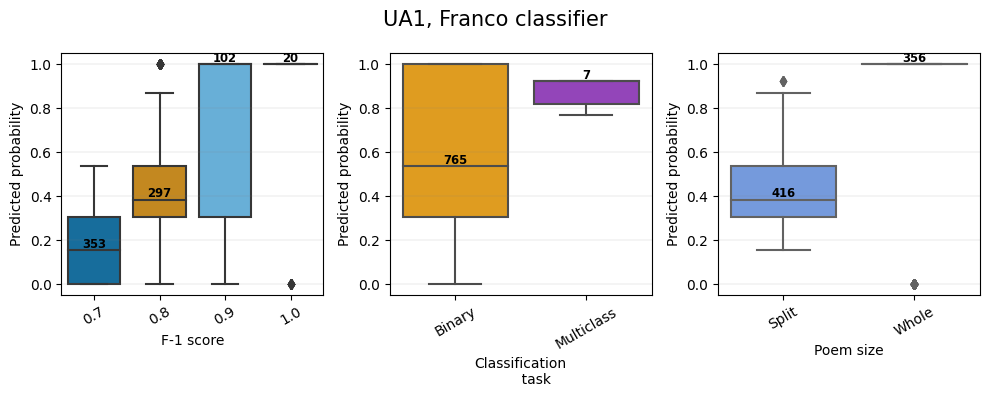

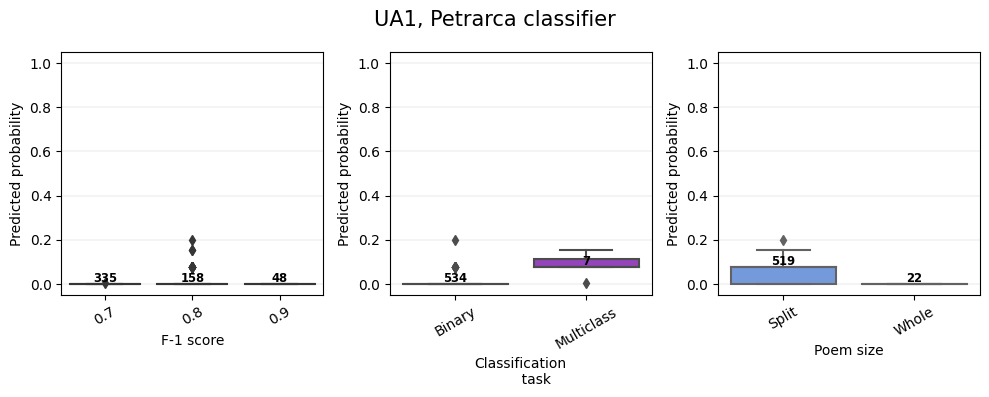

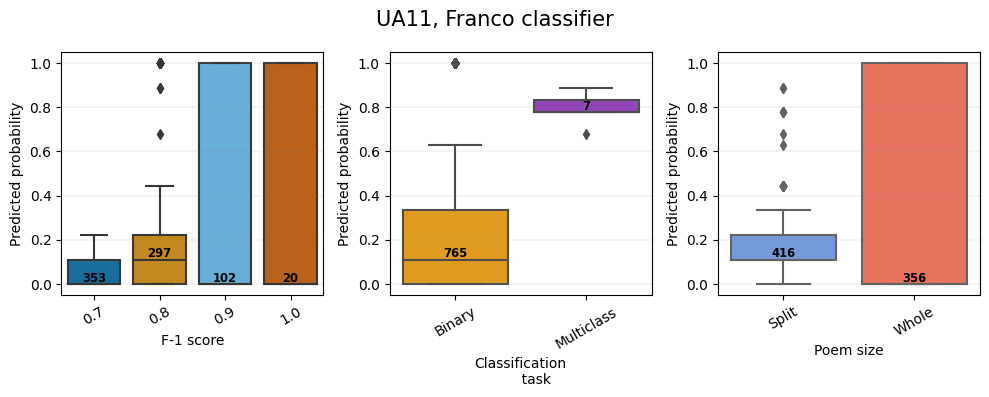

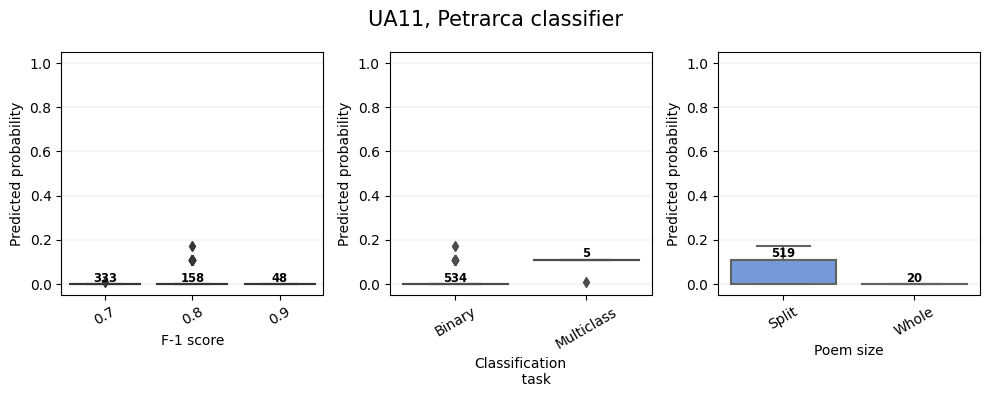

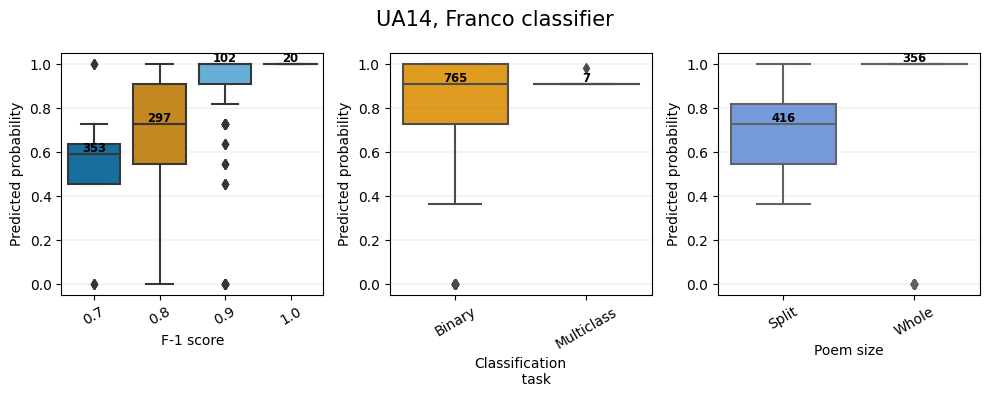

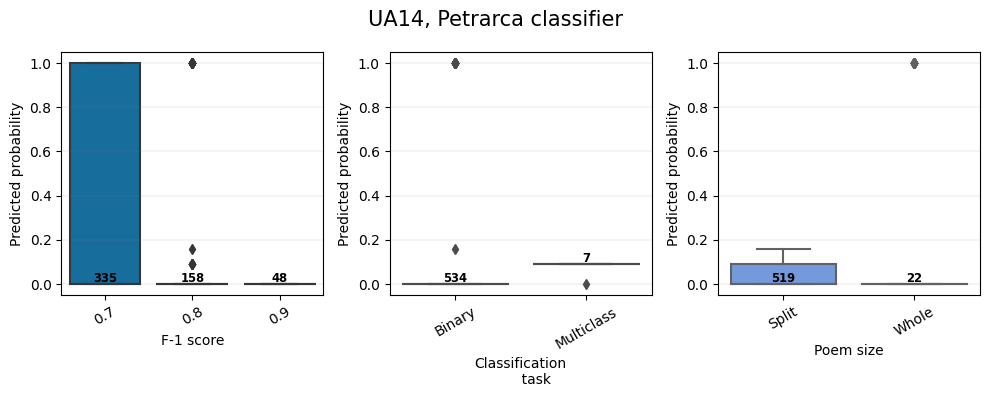

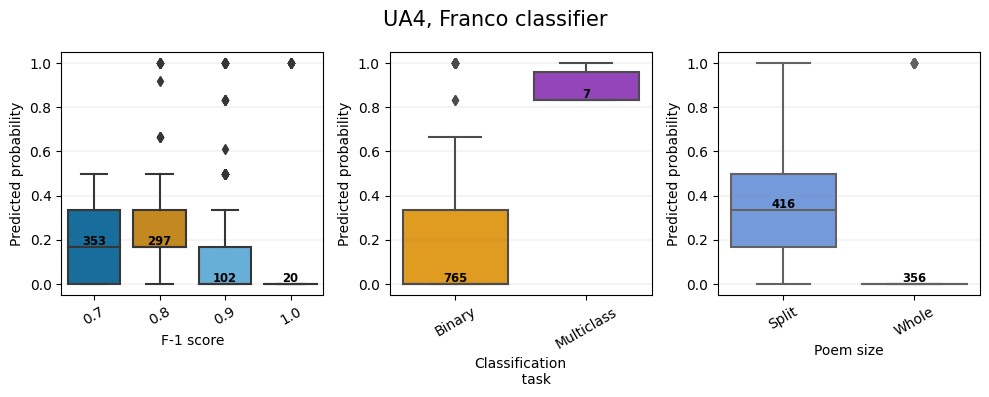

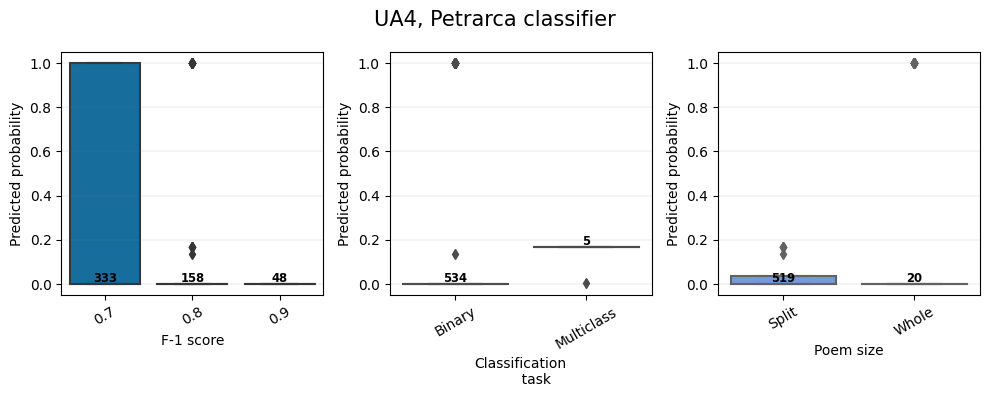

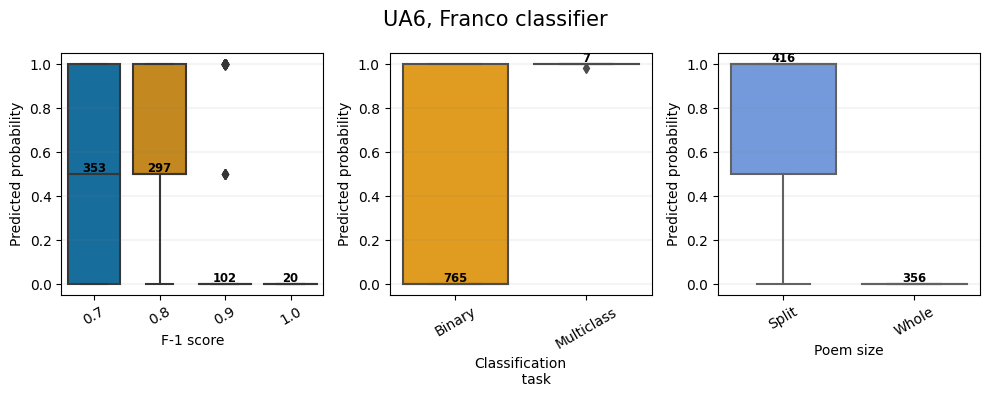

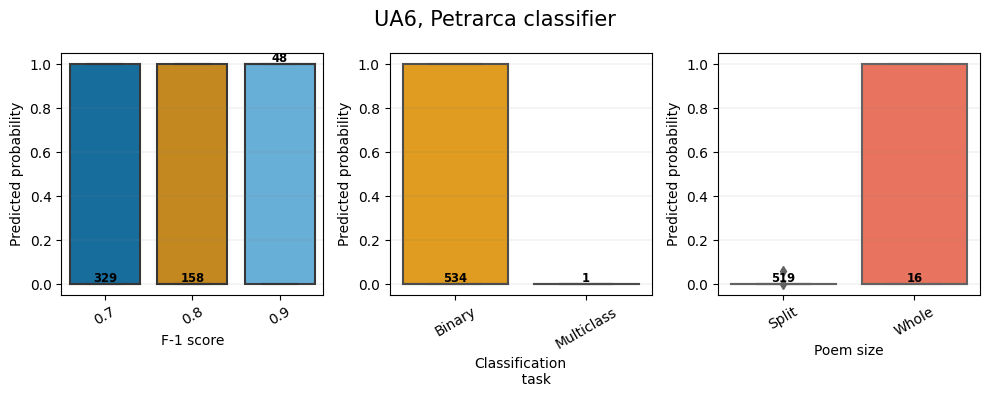

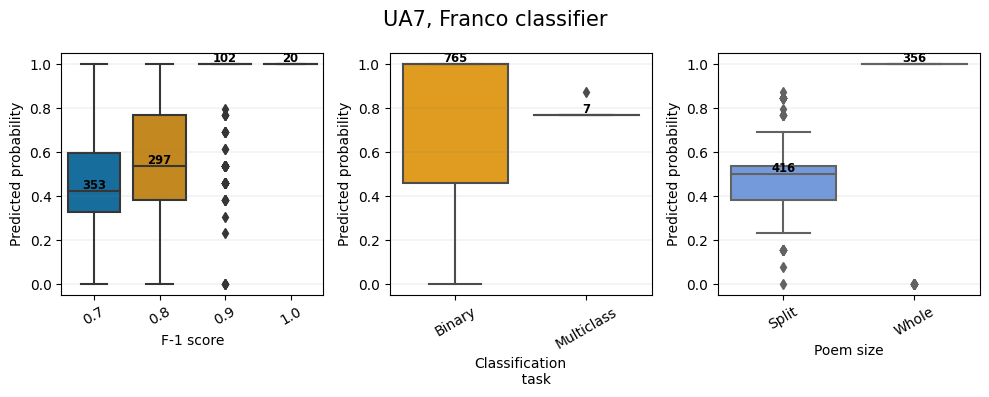

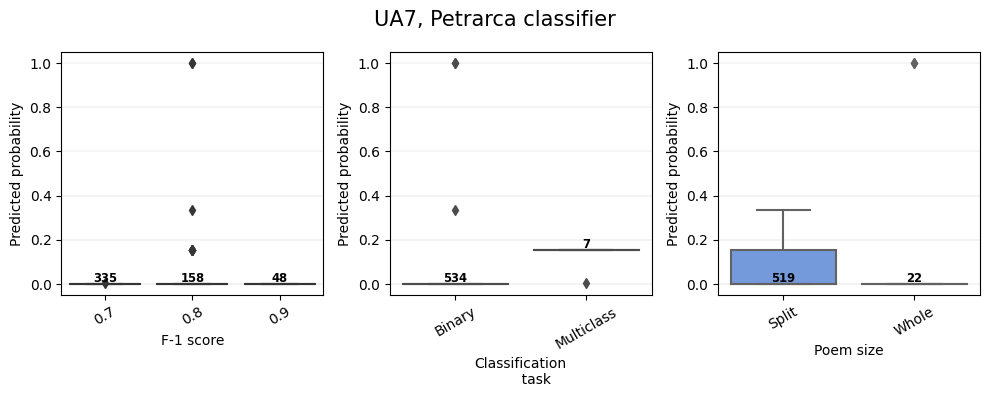

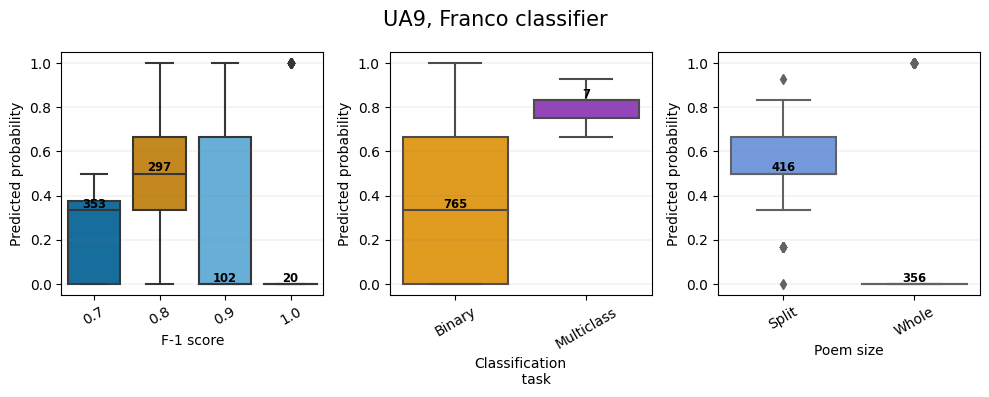

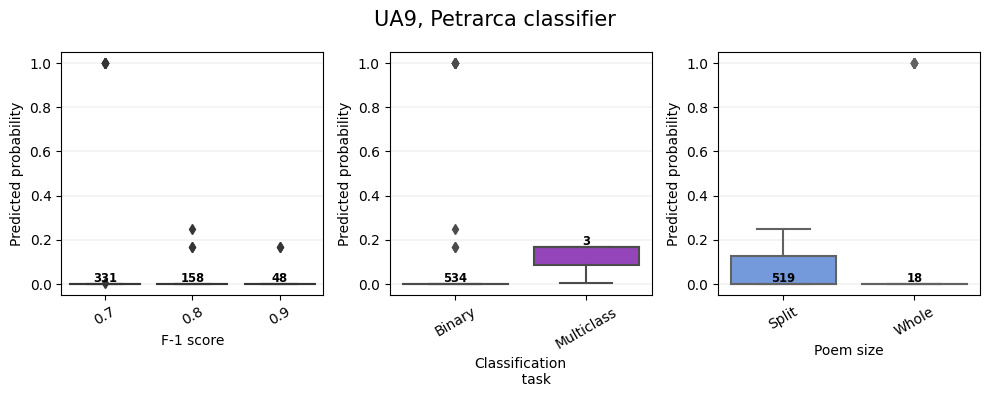

In [ ]:
make_boxplots(all_pred, x_map, box_dir)